# Temporal-Difference Methods

In this notebook, you will write your own implementations of many Temporal-Difference (TD) methods.

While we have provided some starter code, you are welcome to erase these hints and write your code from scratch.

---

### Part 0: Explore CliffWalkingEnv

We begin by importing the necessary packages.

In [5]:
import sys
import gym
import numpy as np
from collections import defaultdict, deque
import matplotlib.pyplot as plt
%matplotlib inline

import check_test
from plot_utils import plot_values

Use the code cell below to create an instance of the [CliffWalking](https://github.com/openai/gym/blob/master/gym/envs/toy_text/cliffwalking.py) environment.

In [6]:
env = gym.make('CliffWalking-v0')

The agent moves through a $4\times 12$ gridworld, with states numbered as follows:
```
[[ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11],
 [12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23],
 [24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35],
 [36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47]]
```
At the start of any episode, state `36` is the initial state.  State `47` is the only terminal state, and the cliff corresponds to states `37` through `46`.

The agent has 4 potential actions:
```
UP = 0
RIGHT = 1
DOWN = 2
LEFT = 3
```

Thus, $\mathcal{S}^+=\{0, 1, \ldots, 47\}$, and $\mathcal{A} =\{0, 1, 2, 3\}$.  Verify this by running the code cell below.

In [7]:
print(env.action_space)
print(env.observation_space)

Discrete(4)
Discrete(48)


In this mini-project, we will build towards finding the optimal policy for the CliffWalking environment.  The optimal state-value function is visualized below.  Please take the time now to make sure that you understand _why_ this is the optimal state-value function.

_**Note**: You can safely ignore the values of the cliff "states" as these are not true states from which the agent can make decisions.  For the cliff "states", the state-value function is not well-defined._

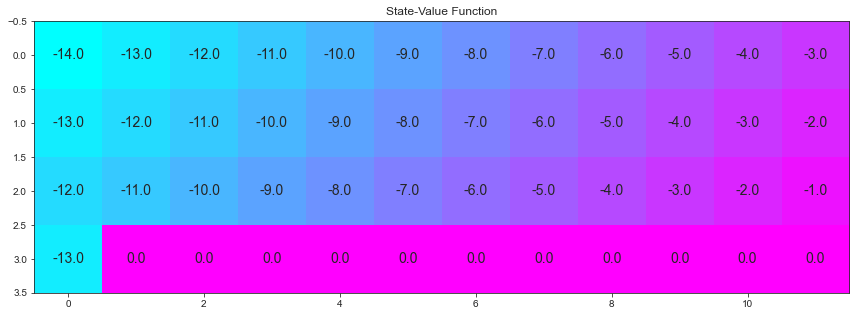

In [8]:
# define the optimal state-value function
V_opt = np.zeros((4,12))
V_opt[0:13][0] = -np.arange(3, 15)[::-1]
V_opt[0:13][1] = -np.arange(3, 15)[::-1] + 1
V_opt[0:13][2] = -np.arange(3, 15)[::-1] + 2
V_opt[3][0] = -13

plot_values(V_opt)

### Part 1: TD Control: Sarsa

In this section, you will write your own implementation of the Sarsa control algorithm.

Your algorithm has four arguments:
- `env`: This is an instance of an OpenAI Gym environment.
- `num_episodes`: This is the number of episodes that are generated through agent-environment interaction.
- `alpha`: This is the step-size parameter for the update step.
- `gamma`: This is the discount rate.  It must be a value between 0 and 1, inclusive (default value: `1`).

The algorithm returns as output:
- `Q`: This is a dictionary (of one-dimensional arrays) where `Q[s][a]` is the estimated action value corresponding to state `s` and action `a`.

Please complete the function in the code cell below.

(_Feel free to define additional functions to help you to organize your code._)

In [20]:
""" ok, change, moved sarsa loop back down into function, make it a little 
    more like the one they have."""
   

def epsilon_greedy_next_action(env, Q, state, epsilon, nA):
    return np.random.choice(np.arange(nA), p=get_probs(Q[state], epsilon, nA)) \
                                    if state in Q else env.action_space.sample()

# this is code from the course solution but now I get it, better python than I had
def get_probs(Q_s, epsilon, nA):
    """ obtains the action probabilities corresponding to epsilon-greedy policy """
    policy_s = np.ones(nA) * epsilon / nA
    best_a = np.argmax(Q_s)
    policy_s[best_a] = 1 - epsilon + (epsilon / nA)
    return policy_s

def sarsa_update(Q_current, Q_next, alpha, reward):
    return Q_current + alpha * (reward + Q_next - Q_current)

In [25]:
def sarsa(env, num_episodes, alpha, gamma=1.0):
    # initialize action-value function (empty dictionary of arrays)
    eps_decay = .99999
    eps_min = 0.05
    epsilon = 1.0
    Q = defaultdict(lambda: np.zeros(env.nA))
    # initialize performance monitor
    # loop over episodes
    for i_episode in range(1, num_episodes+1):
        # monitor progress
        if i_episode % 100 == 0:
            print("\rEpisode {}/{}".format(i_episode, num_episodes), end="")
            sys.stdout.flush()
        # still doing this just like in monte carlo GLIE
        epsilon = max(epsilon*eps_decay, eps_min)
        # still getting a whole episode at a time, but need to update q inside this episode
        """ generates an episode from following the epsilon-greedy policy """
        state = env.reset()
        # determine action from e-greedy policy
        action = epsilon_greedy_next_action(env, Q, state, epsilon, env.nA)
        while True:  
            # take action
            next_state, reward, done, info = env.step(action)
            next_action = epsilon_greedy_next_action(env, Q, next_state, epsilon, env.nA)
            # print(f"state: {state}, action: {action}, reward: {reward}, next_action: {next_action}, current Q at s,a: {Q[state][action]}")
            print(f"Q[{state}][{action}] value is: {Q[state][action]}")
            Q[state][action] = sarsa_update(Q[state][action], Q[next_state][next_action], alpha, reward)
            print(f"Q[{state}][{action}] value is: {Q[state][action]}")
            # print(f"new state: {next_state}, new Q value {Q[state][action]}")
            state = next_state
            if done:
                break
    return Q

Use the next code cell to visualize the **_estimated_** optimal policy and the corresponding state-value function.  

If the code cell returns **PASSED**, then you have implemented the function correctly!  Feel free to change the `num_episodes` and `alpha` parameters that are supplied to the function.  However, if you'd like to ensure the accuracy of the unit test, please do not change the value of `gamma` from the default.

Q[36][0] value is: 0.0
Q[36][0] value is: -0.01
Q[24][3] value is: 0.0
Q[24][3] value is: -0.01
Q[24][0] value is: 0.0
Q[24][0] value is: -0.01
Q[12][1] value is: 0.0
Q[12][1] value is: -0.01
Q[13][3] value is: 0.0
Q[13][3] value is: -0.01
Q[12][3] value is: 0.0
Q[12][3] value is: -0.01
Q[12][0] value is: 0.0
Q[12][0] value is: -0.01
Q[0][3] value is: 0.0
Q[0][3] value is: -0.01
Q[0][1] value is: 0.0
Q[0][1] value is: -0.01
Q[1][2] value is: 0.0
Q[1][2] value is: -0.0101
Q[13][3] value is: -0.01
Q[13][3] value is: -0.0199
Q[12][1] value is: -0.01
Q[12][1] value is: -0.0199
Q[13][2] value is: 0.0
Q[13][2] value is: -0.01
Q[25][0] value is: 0.0
Q[25][0] value is: -0.01
Q[13][2] value is: -0.01
Q[13][2] value is: -0.0199
Q[25][0] value is: -0.01
Q[25][0] value is: -0.0199
Q[13][0] value is: 0.0
Q[13][0] value is: -0.01
Q[1][2] value is: -0.0101
Q[1][2] value is: -0.020198
Q[13][3] value is: -0.0199
Q[13][3] value is: -0.029801
Q[12][3] value is: -0.01
Q[12][3] value is: -0.020099
Q[12][1]

Q[25][3] value is: -0.09585097714742788
Q[25][3] value is: -0.10649975900631156
Q[24][0] value is: -0.17837574685477675
Q[24][0] value is: -0.18817226127054512
Q[12][0] value is: -0.15972455186526135
Q[12][0] value is: -0.16942335075092738
Q[0][2] value is: -0.14143304781277646
Q[0][2] value is: -0.15150930784538327
Q[12][3] value is: -0.14905905107345813
Q[12][3] value is: -0.1587348413914828
Q[12][0] value is: -0.16942335075092738
Q[12][0] value is: -0.17924421032187193
Q[0][2] value is: -0.15150930784538327
Q[0][2] value is: -0.16158156318084427
Q[12][0] value is: -0.17924421032187193
Q[12][0] value is: -0.18874781262297186
Q[0][2] value is: -0.16158156318084427
Q[0][2] value is: -0.17113212837779507
Q[12][1] value is: -0.15802718843161495
Q[12][1] value is: -0.166939986057219
Q[13][0] value is: -0.049306950992019996
Q[13][0] value is: -0.05933077030534427
Q[1][1] value is: -0.03961087014761075
Q[1][1] value is: -0.04962670276751649
Q[2][2] value is: -0.01
Q[2][2] value is: -0.02050

Q[25][0] value is: -0.19225041125136305
Q[25][0] value is: -0.20412542239827094
Q[13][1] value is: -0.11653277888582646
Q[13][1] value is: -0.12641887831402038
Q[14][0] value is: -0.050708936535239356
Q[14][0] value is: -0.060822958346566966
Q[2][0] value is: -0.06971182470580624
Q[2][0] value is: -0.07980593222908627
Q[2][1] value is: -0.07912257703380932
Q[2][1] value is: -0.08894521780879555
Q[3][0] value is: -0.030303931690414627
Q[3][0] value is: -0.040298902373510484
Q[3][2] value is: -0.029801
Q[3][2] value is: -0.03970398
Q[15][0] value is: -0.020099
Q[15][0] value is: -0.030300999023735103
Q[3][2] value is: -0.03970398
Q[3][2] value is: -0.04960608061208991
Q[15][1] value is: -0.01
Q[15][1] value is: -0.020099
Q[16][2] value is: -0.0199
Q[16][2] value is: -0.049752088061342875
Q[28][1] value is: 0.0
Q[28][1] value is: -0.01
Q[29][3] value is: 0.0
Q[29][3] value is: -0.0101
Q[28][3] value is: 0.0
Q[28][3] value is: -0.01
Q[27][3] value is: 0.0
Q[27][3] value is: -0.01
Q[26][1] 

Q[24][3] value is: -0.5668393764736458
Q[24][1] value is: -1.3910886161959428
Q[24][1] value is: -1.3896756644132315
Q[25][1] value is: -0.265398162767539
Q[25][1] value is: -0.273482926040833
Q[26][1] value is: -0.07387449009693858
Q[26][1] value is: -0.0832377550959692
Q[27][3] value is: -0.020408971448335252
Q[27][3] value is: -0.031026898213330732
Q[26][3] value is: -0.22200290928366084
Q[26][3] value is: -0.23251770945123257
Q[25][2] value is: -21.322243883098764
Q[25][2] value is: -22.116779133900977
Q[36][1] value is: -50.225169154830716
Q[36][1] value is: -50.77066249868966
Q[36][2] value is: -4.987368610819492
Q[36][2] value is: -5.455201549698193
Q[36][2] value is: -5.455201549698193
Q[36][2] value is: -5.918356159188108
Q[36][3] value is: -4.774503540725371
Q[36][3] value is: -4.744516194951319
Q[36][3] value is: -4.744516194951319
Q[36][3] value is: -5.214777657988702
Q[36][2] value is: -5.918356159188108
Q[36][2] value is: -5.928356159188108
Q[36][0] value is: -0.775768963

Q[36][1] value is: -59.929437339754145
Q[36][1] value is: -60.34179862406762
Q[36][0] value is: -1.165565771101633
Q[36][0] value is: -1.2103754368881474
Q[24][3] value is: -0.8533346835331445
Q[24][3] value is: -0.8633346835331445
Q[24][3] value is: -0.8633346835331445
Q[24][3] value is: -0.8707766562806986
Q[24][2] value is: -4.646532349753086
Q[24][2] value is: -5.213485012496231
Q[36][1] value is: -60.34179862406762
Q[36][1] value is: -60.75048439219583
Q[36][2] value is: -8.189674343964906
Q[36][2] value is: -8.129881354894138
Q[36][0] value is: -1.2103754368881474
Q[36][0] value is: -1.2604065326442282
Q[24][1] value is: -1.8374915159973486
Q[24][1] value is: -1.8322148728015109
Q[25][3] value is: -0.3630291251593921
Q[25][3] value is: -0.3877209826358133
Q[24][3] value is: -0.8707766562806986
Q[24][3] value is: -0.8807766562806986
Q[24][3] value is: -0.8807766562806986
Q[24][3] value is: -0.9002910384459066
Q[24][2] value is: -5.213485012496231
Q[24][2] value is: -5.778855006293

Q[0][0] value is: -0.37393681853127436
Q[0][0] value is: -0.37393681853127436
Q[0][0] value is: -0.38312389752490567
Q[0][3] value is: -0.39476655349053663
Q[0][3] value is: -0.40374533513457533
Q[0][3] value is: -0.40374533513457533
Q[0][3] value is: -0.41374533513457534
Q[0][3] value is: -0.41374533513457534
Q[0][3] value is: -0.42343912075847867
Q[0][0] value is: -0.38312389752490567
Q[0][0] value is: -0.3931238975249057
Q[0][3] value is: -0.42343912075847867
Q[0][3] value is: -0.4334391207584787
Q[0][3] value is: -0.4334391207584787
Q[0][3] value is: -0.44303596852614296
Q[0][1] value is: -0.2926447178944055
Q[0][1] value is: -0.30318817765482026
Q[1][1] value is: -0.24344544775941845
Q[1][1] value is: -0.25331013867172975
Q[2][0] value is: -0.21009524355275982
Q[2][0] value is: -0.21991077958124894
Q[2][2] value is: -0.19164884640167015
Q[2][2] value is: -0.20146394759326888
Q[14][3] value is: -0.3139185598175609
Q[14][3] value is: -0.3380654103645642
Q[13][2] value is: -1.7286036

Q[16][1] value is: -0.09783643341949544
Q[17][1] value is: -0.03009701
Q[17][1] value is: -0.040095099004990004
Q[18][1] value is: -0.029905910499000002
Q[18][1] value is: -0.039909005041165
Q[19][0] value is: -0.020491049900000002
Q[19][0] value is: -0.030583149401
Q[7][0] value is: -0.030487149301
Q[7][0] value is: -0.04047928780799
Q[7][0] value is: -0.04047928780799
Q[7][0] value is: -0.05037749452894
Q[7][2] value is: -0.029701
Q[7][2] value is: -0.039709821494010006
Q[19][2] value is: -0.030215364715500133
Q[19][2] value is: -0.04001321106834513
Q[31][3] value is: 0.0
Q[31][3] value is: -0.0101
Q[30][2] value is: -1.6122744141788432
Q[30][2] value is: -2.6185639299715158
Q[36][0] value is: -2.2412259934460583
Q[36][0] value is: -2.237456533914172
Q[24][2] value is: -11.165861419838894
Q[24][2] value is: -11.197913140940033
Q[36][1] value is: -82.3831400751083
Q[36][1] value is: -82.58168323969636
Q[36][0] value is: -2.237456533914172
Q[36][0] value is: -2.2337247689776043
Q[24][0

Q[13][3] value is: -0.4525409713036926
Q[13][3] value is: -0.4719579103578673
Q[12][3] value is: -0.8418006147889787
Q[12][3] value is: -0.8490186725398706
Q[12][1] value is: -0.5636063898781662
Q[12][1] value is: -0.5715736409439981
Q[13][3] value is: -0.4719579103578673
Q[13][3] value is: -0.4847076662651268
Q[12][3] value is: -0.8490186725398706
Q[12][3] value is: -0.8579978208253101
Q[12][1] value is: -0.5715736409439981
Q[12][1] value is: -0.5807049811972094
Q[13][2] value is: -1.7224229834278582
Q[13][2] value is: -2.1210192088587574
Q[25][0] value is: -0.4313291171003404
Q[25][0] value is: -0.44186290259198824
Q[13][1] value is: -0.36033149646135276
Q[13][1] value is: -0.36918439736133024
Q[14][0] value is: -0.24562158645910226
Q[14][0] value is: -0.2559199353589328
Q[2][1] value is: -0.3121270051622241
Q[2][1] value is: -0.32081365920051724
Q[3][2] value is: -0.17698554964320795
Q[3][2] value is: -0.18650493942881127
Q[15][2] value is: -0.15066027264187695
Q[15][2] value is: -0

Q[36][1] value is: -100.25388150527404
Q[36][1] value is: -100.44851377141379
Q[36][1] value is: -100.44851377141379
Q[36][1] value is: -100.64119971489214
Q[36][3] value is: -19.717108119249446
Q[36][3] value is: -20.536349035205873
Q[36][2] value is: -15.304428413833483
Q[36][2] value is: -15.314428413833483
Q[36][1] value is: -100.64119971489214
Q[36][1] value is: -100.78793200188156
Q[36][2] value is: -15.314428413833483
Q[36][2] value is: -15.220185551704084
Q[36][3] value is: -20.536349035205873
Q[36][3] value is: -20.38988696686275
Q[36][2] value is: -15.220185551704084
Q[36][2] value is: -16.08586301620586
Q[36][3] value is: -20.38988696686275
Q[36][3] value is: -20.24488951920306
Q[36][1] value is: -100.78793200188156
Q[36][1] value is: -100.82895410387168
Q[36][3] value is: -20.24488951920306
Q[36][3] value is: -20.213299254173087
Q[36][0] value is: -4.890142200893594
Q[36][0] value is: -5.022947979985744
Q[24][0] value is: -1.138230020581146
Q[24][0] value is: -1.14357468071

Q[24][2] value is: -18.94924984660224
Q[24][2] value is: -18.987652217896652
Q[36][1] value is: -108.94702482905248
Q[36][1] value is: -109.07719059105567
Q[36][3] value is: -21.789486976043552
Q[36][3] value is: -22.672364012193672
Q[36][3] value is: -22.672364012193672
Q[36][3] value is: -23.54641227798229
Q[36][1] value is: -109.07719059105567
Q[36][1] value is: -109.22188280792493
Q[36][3] value is: -23.54641227798229
Q[36][3] value is: -23.37728858097429
Q[36][2] value is: -21.96360102937161
Q[36][2] value is: -21.987737904887638
Q[36][0] value is: -5.634042577182183
Q[36][0] value is: -5.619137517727378
Q[24][0] value is: -1.2304167406964102
Q[24][0] value is: -1.2550849552033205
Q[12][0] value is: -0.9421441931962742
Q[12][0] value is: -0.9503441903059847
Q[0][2] value is: -0.9646427960315532
Q[0][2] value is: -0.9727167657513182
Q[12][1] value is: -0.7720397680080422
Q[12][1] value is: -0.7785764474152636
Q[13][2] value is: -3.029623677512922
Q[13][2] value is: -3.0218040604558

Q[1][3] value is: -0.4558915801669069
Q[1][3] value is: -0.46796732622438825
Q[0][3] value is: -0.8061165372122766
Q[0][3] value is: -0.8161165372122766
Q[0][2] value is: -0.9909493157658572
Q[0][2] value is: -1.001024633647212
Q[12][2] value is: -3.1590738096225675
Q[12][2] value is: -3.358614432358468
Q[24][3] value is: -4.042020149668236
Q[24][3] value is: -4.025433945387161
Q[24][3] value is: -4.025433945387161
Q[24][3] value is: -4.216310966765416
Q[24][1] value is: -7.660338277626772
Q[24][1] value is: -7.612985411281126
Q[25][0] value is: -0.6913512958622339
Q[25][0] value is: -0.6991126725752327
Q[13][3] value is: -0.7276752584394441
Q[13][3] value is: -0.7406993715213798
Q[12][3] value is: -1.030086566633012
Q[12][3] value is: -1.0633718452902665
Q[12][2] value is: -3.358614432358468
Q[12][2] value is: -3.4111581421476944
Q[24][0] value is: -1.383399721560758
Q[24][0] value is: -1.389550535384164
Q[12][1] value is: -0.8151210960667125
Q[12][1] value is: -0.8471710882697298
Q[1

Q[24][2] value is: -26.184092060776837
Q[24][2] value is: -26.30137687398329
Q[36][1] value is: -129.29975469009167
Q[36][1] value is: -129.34110937564785
Q[36][1] value is: -129.34110937564785
Q[36][1] value is: -130.34110937564785
Q[36][1] value is: -130.34110937564785
Q[36][1] value is: -130.37205051434844
Q[36][1] value is: -130.37205051434844
Q[36][1] value is: -130.40268224166203
Q[36][1] value is: -130.40268224166203
Q[36][1] value is: -131.40268224166203
Q[36][3] value is: -36.91257338142222
Q[36][3] value is: -36.62974377536804
Q[36][0] value is: -7.62961277600415
Q[36][0] value is: -7.826330416983941
Q[24][3] value is: -4.862281060566548
Q[24][3] value is: -4.838463394232827
Q[24][3] value is: -4.838463394232827
Q[24][3] value is: -5.063092529030332
Q[24][1] value is: -9.29261611491012
Q[24][1] value is: -9.231753927428379
Q[25][0] value is: -0.7375530664467544
Q[25][0] value is: -0.745917496961952
Q[13][3] value is: -0.8876232792479504
Q[13][3] value is: -0.8982197490945203


Q[36][2] value is: -34.19808730921053
Q[36][2] value is: -33.9435427435556
Q[36][0] value is: -7.743630743717571
Q[36][0] value is: -7.692879915610745
Q[24][0] value is: -1.6685479330350035
Q[24][0] value is: -1.6724130634311978
Q[12][1] value is: -1.0550609726544236
Q[12][1] value is: -1.0609729309601728
Q[13][0] value is: -0.5977660731210336
Q[13][0] value is: -0.608799338544875
Q[1][1] value is: -0.5970889418719906
Q[1][1] value is: -0.6061092154418916
Q[2][3] value is: -0.49643870161522147
Q[2][3] value is: -0.5075354067534882
Q[1][1] value is: -0.6061092154418916
Q[1][1] value is: -0.6151234773550075
Q[2][2] value is: -0.4618058952356025
Q[2][2] value is: -0.4809147572789979
Q[14][2] value is: -1.3726920995751453
Q[14][2] value is: -1.3723632806996506
Q[26][2] value is: -26.349467013398275
Q[26][2] value is: -27.526157987862803
Q[36][1] value is: -132.68810746841862
Q[36][1] value is: -132.43815519289055
Q[36][1] value is: -132.43815519289055
Q[36][1] value is: -133.43815519289055

Q[36][0] value is: -7.797081139146763
Q[36][0] value is: -7.784012317699778
Q[24][2] value is: -31.379938886855218
Q[24][2] value is: -31.153979621163664
Q[36][3] value is: -46.126135101234624
Q[36][3] value is: -46.13613510123462
Q[36][0] value is: -7.784012317699778
Q[36][0] value is: -8.027711990734417
Q[24][0] value is: -1.84164708973524
Q[24][0] value is: -1.8895188812358878
Q[12][2] value is: -5.628826239800032
Q[12][2] value is: -5.8940777736136685
Q[24][3] value is: -5.490198994448259
Q[24][3] value is: -5.500198994448259
Q[24][3] value is: -5.500198994448259
Q[24][3] value is: -5.510198994448259
Q[24][2] value is: -31.153979621163664
Q[24][2] value is: -31.216233916291095
Q[36][1] value is: -135.94049145115548
Q[36][1] value is: -135.944880627983
Q[36][3] value is: -46.13613510123462
Q[36][3] value is: -47.044222556502106
Q[36][3] value is: -47.044222556502106
Q[36][3] value is: -46.66405745084443
Q[36][0] value is: -8.027711990734417
Q[36][0] value is: -7.976330059639432
Q[24

Q[12][1] value is: -1.1928871731175805
Q[12][1] value is: -1.2620689388260915
Q[13][0] value is: -0.6884640550107606
Q[13][0] value is: -0.7009563181178657
Q[1][2] value is: -0.9376903657212723
Q[1][2] value is: -0.9452740552003791
Q[13][3] value is: -1.409476452308139
Q[13][3] value is: -1.4673841478531546
Q[12][0] value is: -1.330450692330946
Q[12][0] value is: -1.3356475424129786
Q[0][2] value is: -1.6522280285852553
Q[0][2] value is: -1.6583264376876636
Q[12][1] value is: -1.2620689388260915
Q[12][1] value is: -1.2664578126190091
Q[13][3] value is: -1.4673841478531546
Q[13][3] value is: -1.5247127664427202
Q[12][3] value is: -1.5669213127317452
Q[12][3] value is: -1.6232545596725247
Q[12][1] value is: -1.2664578126190091
Q[12][1] value is: -1.2790403621572461
Q[13][0] value is: -0.7009563181178657
Q[13][0] value is: -0.710788184073112
Q[1][3] value is: -0.7240859193160565
Q[1][3] value is: -0.7353464171282378
Q[0][2] value is: -1.6583264376876636
Q[0][2] value is: -1.66797571890751

Q[0][2] value is: -1.733944107450207
Q[0][2] value is: -1.7897488783850477
Q[12][3] value is: -1.9792950313674786
Q[12][3] value is: -1.983799075880312
Q[12][0] value is: -1.4296994826508156
Q[12][0] value is: -1.4370360396829716
Q[0][2] value is: -1.7897488783850477
Q[0][2] value is: -1.7962217499980269
Q[12][1] value is: -1.4265984146459358
Q[12][1] value is: -1.4301005952832284
Q[13][2] value is: -8.235116159928724
Q[13][2] value is: -8.213220257956685
Q[25][0] value is: -1.1090544595803413
Q[25][0] value is: -1.115600087663938
Q[13][1] value is: -0.7768164783752024
Q[13][1] value is: -0.7842114668993981
Q[14][2] value is: -1.428445812841418
Q[14][2] value is: -1.7397307050956416
Q[26][2] value is: -31.55693503826379
Q[26][2] value is: -32.78039782402284
Q[36][1] value is: -145.71751400278967
Q[36][1] value is: -145.37023981906236
Q[36][3] value is: -53.903213614168756
Q[36][3] value is: -54.82788387621769
Q[36][3] value is: -54.82788387621769
Q[36][3] value is: -55.74330743564614
Q

Q[24][2] value is: -36.7497688452324
Q[24][2] value is: -36.94369780913104
Q[36][0] value is: -12.863818524989153
Q[36][0] value is: -12.893555480996927
Q[24][0] value is: -2.2474602292751173
Q[24][0] value is: -2.3063261553743715
Q[12][1] value is: -1.6274317118915262
Q[12][1] value is: -1.6294483180654755
Q[13][2] value is: -8.731766255540611
Q[13][2] value is: -8.707878934086107
Q[25][0] value is: -1.3061433564563996
Q[25][0] value is: -1.3901607122326967
Q[13][1] value is: -0.8323226239570007
Q[13][1] value is: -0.839476267822938
Q[14][0] value is: -0.5476870105507301
Q[14][0] value is: -0.5578413691497027
Q[2][2] value is: -0.6040132308134395
Q[2][2] value is: -0.6135515121968022
Q[14][0] value is: -0.5578413691497027
Q[14][0] value is: -0.5692413357960201
Q[2][1] value is: -0.5631228704479928
Q[2][1] value is: -0.5710957675148829
Q[3][2] value is: -0.3201655235960045
Q[3][2] value is: -0.32894227087738964
Q[15][3] value is: -0.3444702187653068
Q[15][3] value is: -0.35509606149585

Q[0][3] value is: -1.2532897800622245
Q[0][3] value is: -1.2711555040608093
Q[0][2] value is: -2.0398621799207057
Q[0][2] value is: -2.0488567129118738
Q[12][1] value is: -1.9393154790375289
Q[12][1] value is: -2.0148788537310867
Q[13][1] value is: -0.8942218579998137
Q[13][1] value is: -0.906379180037959
Q[14][2] value is: -1.7790327883498027
Q[14][2] value is: -1.8000629789629057
Q[26][0] value is: -0.5142386778795357
Q[26][0] value is: -0.5370969208903694
Q[14][2] value is: -1.8000629789629057
Q[14][2] value is: -2.1401280585389753
Q[26][2] value is: -34.80657093656986
Q[26][2] value is: -35.968391565019154
Q[36][1] value is: -153.6317782920062
Q[36][1] value is: -153.2346211097939
Q[36][2] value is: -50.98863378149913
Q[36][2] value is: -50.99863378149913
Q[36][2] value is: -50.99863378149913
Q[36][2] value is: -50.63780804439189
Q[36][0] value is: -13.916060070775071
Q[36][0] value is: -13.869802344662302
Q[24][1] value is: -15.704704520620835
Q[24][1] value is: -15.61355787819343

Q[25][0] value is: -1.525038478082571
Q[25][0] value is: -1.5294600411838368
Q[13][3] value is: -2.2594716903747476
Q[13][3] value is: -2.3295645933318716
Q[12][2] value is: -8.268761986087144
Q[12][2] value is: -8.602970508189932
Q[24][0] value is: -2.6783115314308805
Q[24][0] value is: -2.6845529802224837
Q[12][3] value is: -2.302456410591179
Q[12][3] value is: -2.312456410591179
Q[12][3] value is: -2.312456410591179
Q[12][3] value is: -2.3152154631413637
Q[12][1] value is: -2.3070031777081184
Q[12][1] value is: -2.317228791864356
Q[13][0] value is: -0.9671947882091455
Q[13][0] value is: -0.9763914313225097
Q[1][0] value is: -0.905565867679825
Q[1][0] value is: -0.9202431625136205
Q[1][2] value is: -1.3732953510593642
Q[1][2] value is: -1.3928580434820892
Q[13][3] value is: -2.3295645933318716
Q[13][3] value is: -2.3394412353171963
Q[12][1] value is: -2.317228791864356
Q[12][1] value is: -2.3140693971292206
Q[13][0] value is: -0.9763914313225097
Q[13][0] value is: -0.9858299486344209

Q[36][0] value is: -16.176071856023512
Q[36][0] value is: -16.20528359371078
Q[24][0] value is: -2.8327959969883554
Q[24][0] value is: -2.9012318374171704
Q[12][2] value is: -8.676380039869855
Q[12][2] value is: -8.701691992796428
Q[24][1] value is: -18.09724562475064
Q[24][1] value is: -17.974312443756794
Q[25][2] value is: -93.00808764420852
Q[25][2] value is: -93.24005960370354
Q[36][3] value is: -58.85471975004779
Q[36][3] value is: -58.86471975004779
Q[36][3] value is: -58.86471975004779
Q[36][3] value is: -58.44812538848442
Q[36][3] value is: -58.44812538848442
Q[36][3] value is: -58.035696970536684
Q[36][2] value is: -58.46720903431456
Q[36][2] value is: -58.477209034314555
Q[36][0] value is: -16.20528359371078
Q[36][0] value is: -16.47771960943864
Q[24][3] value is: -10.20757533252719
Q[24][3] value is: -10.21757533252719
Q[24][1] value is: -17.974312443756794
Q[24][1] value is: -17.822091210412115
Q[25][1] value is: -4.803927525365927
Q[25][1] value is: -4.772978056158452
Q[26

Q[0][0] value is: -1.5396632718857548
Q[0][0] value is: -1.5460124407482583
Q[0][2] value is: -2.474289987634997
Q[0][2] value is: -2.483721184641347
Q[12][1] value is: -2.417409688270027
Q[12][1] value is: -2.4145661175907316
Q[13][3] value is: -2.445951753840515
Q[13][3] value is: -2.5251191921811094
Q[12][2] value is: -9.362695587899964
Q[12][2] value is: -9.729321079395932
Q[24][0] value is: -3.0463196121733933
Q[24][0] value is: -3.050131032794718
Q[12][2] value is: -9.729321079395932
Q[12][2] value is: -9.67252917892992
Q[24][0] value is: -3.050131032794718
Q[24][0] value is: -3.046459906142771
Q[12][0] value is: -1.6830183676000052
Q[12][0] value is: -1.6916483083314877
Q[0][2] value is: -2.483721184641347
Q[0][2] value is: -2.493158589537992
Q[12][0] value is: -1.6916483083314877
Q[12][0] value is: -1.7001919496556555
Q[0][0] value is: -1.5460124407482583
Q[0][0] value is: -1.5560124407482583
Q[0][3] value is: -1.3916264764130866
Q[0][3] value is: -1.4032703360564382
Q[0][1] va

Q[12][3] value is: -2.890577649209065
Q[12][2] value is: -10.155832535222833
Q[12][2] value is: -10.518331829521529
Q[24][0] value is: -3.1638293276866074
Q[24][0] value is: -3.1605574374652563
Q[12][1] value is: -2.549645351166461
Q[12][1] value is: -2.677399721090855
Q[13][2] value is: -14.325082343605816
Q[13][2] value is: -14.21186900377322
Q[25][3] value is: -8.20572379882651
Q[25][3] value is: -8.257309004474001
Q[24][3] value is: -12.364244363575677
Q[24][3] value is: -12.704659539590844
Q[24][2] value is: -45.40576196509245
Q[24][2] value is: -46.62163235641348
Q[36][2] value is: -61.952444770241456
Q[36][2] value is: -61.962444770241454
Q[36][3] value is: -62.16800694407121
Q[36][3] value is: -62.175951322332914
Q[36][0] value is: -18.294145854516614
Q[36][0] value is: -18.248250991367357
Q[24][2] value is: -46.62163235641348
Q[24][2] value is: -46.787175546072675
Q[36][2] value is: -61.962444770241454
Q[36][2] value is: -61.97244477024145
Q[36][0] value is: -18.24825099136735

Q[24][2] value is: -49.321138584903764
Q[24][2] value is: -50.48506421805572
Q[36][1] value is: -164.71370190009927
Q[36][1] value is: -164.7360082594798
Q[36][1] value is: -164.7360082594798
Q[36][1] value is: -164.28284267636138
Q[36][1] value is: -164.28284267636138
Q[36][1] value is: -164.3094576279793
Q[36][2] value is: -65.84157131805844
Q[36][2] value is: -65.85157131805845
Q[36][2] value is: -65.85157131805845
Q[36][2] value is: -65.86157131805845
Q[36][3] value is: -66.94433783815329
Q[36][3] value is: -66.94351017295234
Q[36][1] value is: -164.3094576279793
Q[36][1] value is: -165.3094576279793
Q[36][3] value is: -66.94351017295234
Q[36][3] value is: -66.95351017295235
Q[36][0] value is: -19.419449947637748
Q[36][0] value is: -19.270410582187157
Q[24][1] value is: -18.950914333743345
Q[24][1] value is: -18.79559362944227
Q[25][2] value is: -103.51295651317854
Q[25][2] value is: -103.67053105386863
Q[36][0] value is: -19.270410582187157
Q[36][0] value is: -19.592557118545844
Q

Q[36][1] value is: -170.70064023691637
Q[36][1] value is: -170.70064023691637
Q[36][1] value is: -170.73564109653356
Q[36][1] value is: -170.73564109653356
Q[36][1] value is: -170.25437508874202
Q[36][2] value is: -70.66109889036304
Q[36][2] value is: -70.70649516344577
Q[36][0] value is: -22.609040317379534
Q[36][0] value is: -22.595804194747217
Q[24][0] value is: -4.042791152768863
Q[24][0] value is: -4.045401762400197
Q[12][3] value is: -3.303852115902275
Q[12][3] value is: -3.3138521159022747
Q[12][2] value is: -12.685173484600528
Q[12][2] value is: -12.771176030296
Q[24][0] value is: -4.045401762400197
Q[24][0] value is: -4.034910287221738
Q[12][0] value is: -1.9962542445543079
Q[12][0] value is: -2.0006640492066707
Q[0][1] value is: -1.4372347097905849
Q[0][1] value is: -1.445726679286652
Q[1][1] value is: -1.1795895214269638
Q[1][1] value is: -1.185993352121802
Q[2][1] value is: -0.8199725909107827
Q[2][1] value is: -0.8276984148325426
Q[3][3] value is: -0.7088916893929891
Q[3][

Q[12][2] value is: -14.23140542161453
Q[12][2] value is: -14.143705300843903
Q[24][3] value is: -15.189962595561852
Q[24][3] value is: -15.255872664224215
Q[24][0] value is: -4.4613933445517615
Q[24][0] value is: -4.462521833923422
Q[12][1] value is: -4.2855680767494935
Q[12][1] value is: -4.271028199254716
Q[13][3] value is: -3.2940957123926156
Q[13][3] value is: -3.4125918082771283
Q[12][0] value is: -2.088524292917723
Q[12][0] value is: -2.1163285972848183
Q[0][3] value is: -2.0008223975095385
Q[0][3] value is: -2.011906471174286
Q[0][1] value is: -1.5048551247382058
Q[0][1] value is: -1.5143202518574683
Q[1][3] value is: -1.451367836664463
Q[1][3] value is: -1.4679464559376614
Q[0][1] value is: -1.5143202518574683
Q[0][1] value is: -1.5220413659328667
Q[1][0] value is: -1.2864316593973024
Q[1][0] value is: -1.3108808013461473
Q[1][3] value is: -1.4679464559376614
Q[1][3] value is: -1.5019565386745573
Q[0][1] value is: -1.5220413659328667
Q[0][1] value is: -1.5299297602869995
Q[1][3

Q[18][0] value is: -0.11266269337094416
Q[6][1] value is: -0.11100299057064573
Q[6][1] value is: -0.12104894993122743
Q[7][1] value is: -0.09901687371644421
Q[7][1] value is: -0.10901855902741353
Q[8][0] value is: -0.09918540481337575
Q[8][0] value is: -0.10909190872725484
Q[8][2] value is: -0.06074368949014806
Q[8][2] value is: -0.07103913924899533
Q[20][3] value is: -0.029901989999999996
Q[20][3] value is: -0.041666909659325964
Q[19][3] value is: -0.021125603739175863
Q[19][3] value is: -0.03288358807888512
Q[18][0] value is: -0.11266269337094416
Q[18][0] value is: -0.12349011136650354
Q[6][0] value is: -0.19540449292688125
Q[6][0] value is: -0.20540449292688126
Q[6][0] value is: -0.20540449292688126
Q[6][0] value is: -0.21456093749692473
Q[6][3] value is: -0.22785784196724232
Q[6][3] value is: -0.23797432496212054
Q[5][2] value is: -0.24617817325624367
Q[5][2] value is: -0.2576907789475926
Q[17][2] value is: -0.39743874239114124
Q[17][2] value is: -0.5379441820140964
Q[29][0] value 

Q[13][3] value is: -3.6765818292477697
Q[13][3] value is: -3.8106510161376255
Q[12][2] value is: -16.083500518233347
Q[12][2] value is: -16.17708408319527
Q[24][0] value is: -5.393331639966974
Q[24][0] value is: -5.372023459255576
Q[12][1] value is: -4.651565867595124
Q[12][1] value is: -4.840847693892977
Q[13][1] value is: -1.9714854659051502
Q[13][1] value is: -1.972329894866029
Q[14][2] value is: -7.9189334642390365
Q[14][2] value is: -8.536564743850246
Q[26][1] value is: -2.635158462816374
Q[26][1] value is: -3.0236685906245744
Q[27][0] value is: -0.3238131581881995
Q[27][0] value is: -0.33424717888079186
Q[15][3] value is: -0.9092338823207138
Q[15][3] value is: -0.9170512419978117
Q[14][3] value is: -3.064344859169695
Q[14][3] value is: -3.0818079207393745
Q[13][2] value is: -22.57974849738037
Q[13][2] value is: -23.502058650547664
Q[25][1] value is: -9.445976645869042
Q[25][1] value is: -10.04833749366395
Q[26][2] value is: -68.68206142535996
Q[26][2] value is: -69.24194166074487

Q[25][3] value is: -15.778018353837327
Q[24][2] value is: -70.65413699077057
Q[24][2] value is: -70.78295366669288
Q[36][3] value is: -82.94851739360546
Q[36][3] value is: -82.95439026549941
Q[36][3] value is: -82.95439026549941
Q[36][3] value is: -82.96439026549942
Q[36][2] value is: -82.53580458300178
Q[36][2] value is: -82.55009043982676
Q[36][0] value is: -24.36460935577371
Q[36][0] value is: -24.184382416405846
Q[24][2] value is: -70.78295366669288
Q[24][2] value is: -70.32696795419001
Q[36][1] value is: -188.06885347483626
Q[36][1] value is: -188.01366584448616
Q[36][1] value is: -188.01366584448616
Q[36][1] value is: -187.37537301020535
Q[36][0] value is: -24.184382416405846
Q[36][0] value is: -24.655808271783688
Q[24][2] value is: -70.32696795419001
Q[24][2] value is: -71.50745200475016
Q[36][3] value is: -82.96439026549942
Q[36][3] value is: -82.9702472672427
Q[36][3] value is: -82.9702472672427
Q[36][3] value is: -82.3971028772881
Q[36][1] value is: -187.37537301020535
Q[36][

Q[2][3] value is: -1.3575889968852535
Q[2][3] value is: -1.3679125600173836
Q[1][0] value is: -1.6139701617771511
Q[1][0] value is: -1.6239701617771511
Q[1][3] value is: -1.9499756716536907
Q[1][3] value is: -1.9658112643836771
Q[0][2] value is: -4.569286079523601
Q[0][2] value is: -4.577547143950303
Q[12][2] value is: -18.744398088895462
Q[12][2] value is: -18.75758667587731
Q[24][1] value is: -27.241698693042565
Q[24][1] value is: -27.13844240902747
Q[25][0] value is: -4.471274215312106
Q[25][0] value is: -4.677628742023888
Q[13][0] value is: -1.6295210728200364
Q[13][0] value is: -1.642883974735673
Q[1][2] value is: -3.346316157887046
Q[1][2] value is: -3.3641909674759725
Q[13][1] value is: -2.214910844814657
Q[13][1] value is: -2.214089739851055
Q[14][3] value is: -4.147355224586518
Q[14][3] value is: -4.356948941205556
Q[13][1] value is: -2.214089739851055
Q[13][1] value is: -2.3113585588444394
Q[14][2] value is: -10.940971639189474
Q[14][2] value is: -10.853455381861256
Q[26][1] 

Q[1][3] value is: -1.9803124765541058
Q[1][3] value is: -2.017710815971222
Q[0][1] value is: -1.9770652419187065
Q[0][1] value is: -1.9841409591186205
Q[1][0] value is: -1.6846369619101202
Q[1][0] value is: -1.7117947684461794
Q[1][1] value is: -1.3951139491664926
Q[1][1] value is: -1.4002309018440422
Q[2][3] value is: -1.3939520846914186
Q[2][3] value is: -1.404014872862945
Q[1][3] value is: -2.017710815971222
Q[1][3] value is: -2.0547351719941664
Q[0][3] value is: -2.458874620794935
Q[0][3] value is: -2.4914873387696423
Q[0][1] value is: -1.9841409591186205
Q[0][1] value is: -1.991417497211896
Q[1][0] value is: -1.7117947684461794
Q[1][0] value is: -1.7252241724816593
Q[1][3] value is: -2.0547351719941664
Q[1][3] value is: -2.0913892844568815
Q[0][3] value is: -2.4914873387696423
Q[0][3] value is: -2.496486640354065
Q[0][1] value is: -1.991417497211896
Q[0][1] value is: -2.0155074983949373
Q[1][0] value is: -1.7252241724816593
Q[1][0] value is: -1.7388858236014115
Q[1][1] value is: -

Q[17][2] value is: -0.5603336000046026
Q[29][3] value is: -0.7608512822834796
Q[29][3] value is: -0.7661938949393339
Q[28][1] value is: -0.5940873285197604
Q[28][1] value is: -0.76753022608799
Q[29][2] value is: -16.938377085342722
Q[29][2] value is: -18.08486342049613
Q[36][3] value is: -91.68781558071566
Q[36][3] value is: -91.7586980244402
Q[36][1] value is: -196.1502968048928
Q[36][1] value is: -197.1502968048928
Q[36][0] value is: -31.5870106006834
Q[36][0] value is: -31.515728828729852
Q[24][0] value is: -6.9828290116491845
Q[24][0] value is: -6.950090564472918
Q[12][1] value is: -6.329811367281913
Q[12][1] value is: -6.300722906198021
Q[13][0] value is: -1.7278349472008345
Q[13][0] value is: -1.7609774230991886
Q[1][3] value is: -2.1670391828283893
Q[1][3] value is: -2.181860365041694
Q[0][3] value is: -2.6491574041588577
Q[0][3] value is: -2.6595339699359446
Q[0][0] value is: -2.6868139818675645
Q[0][0] value is: -2.6965411817482483
Q[0][1] value is: -2.101416091929138
Q[0][1] 

Q[36][3] value is: -95.29578261638177
Q[36][3] value is: -94.68772718405442
Q[36][1] value is: -195.21785989512793
Q[36][1] value is: -196.21785989512793
Q[36][2] value is: -96.19612894595696
Q[36][2] value is: -97.20634625544866
Q[36][3] value is: -94.68772718405442
Q[36][3] value is: -94.69772718405443
Q[36][3] value is: -94.69772718405443
Q[36][3] value is: -94.70772718405443
Q[36][3] value is: -94.70772718405443
Q[36][3] value is: -94.74271337476837
Q[36][0] value is: -33.490239383647285
Q[36][0] value is: -33.41481897551321
Q[24][0] value is: -7.19621755563634
Q[24][0] value is: -7.164089620036186
Q[12][1] value is: -6.514538835816345
Q[12][1] value is: -6.484852787525444
Q[13][2] value is: -27.029681251090498
Q[13][2] value is: -28.07062933324471
Q[25][2] value is: -130.12448946651173
Q[25][2] value is: -130.15739276160176
Q[36][2] value is: -97.20634625544866
Q[36][2] value is: -97.21634625544867
Q[36][1] value is: -196.21785989512793
Q[36][1] value is: -195.58982948593177
Q[36]

Q[14][3] value is: -4.729508337403618
Q[14][3] value is: -4.717998268817481
Q[13][3] value is: -5.712846350764812
Q[13][3] value is: -5.733048154726231
Q[12][2] value is: -25.833786116708524
Q[12][2] value is: -26.474942738294686
Q[24][2] value is: -88.94944827532461
Q[24][2] value is: -89.02246236234731
Q[36][1] value is: -198.06978672614548
Q[36][1] value is: -198.15930685067204
Q[36][2] value is: -107.02179917880247
Q[36][2] value is: -107.94317425552116
Q[36][1] value is: -198.15930685067204
Q[36][1] value is: -198.25714552472053
Q[36][1] value is: -198.25714552472053
Q[36][1] value is: -197.600691008329
Q[36][1] value is: -197.600691008329
Q[36][1] value is: -196.95080103710137
Q[36][0] value is: -32.6116938855659
Q[36][0] value is: -33.185801570333716
Q[24][3] value is: -25.54681622549029
Q[24][3] value is: -25.66242624770371
Q[24][2] value is: -89.02246236234731
Q[24][2] value is: -89.09474630849978
Q[36][2] value is: -107.94317425552116
Q[36][2] value is: -107.20560052866928
Q[

Q[2][0] value is: -1.3295925668441182
Q[2][0] value is: -1.3442739790264577
Q[2][0] value is: -1.3442739790264577
Q[2][0] value is: -1.3588085770869738
Q[2][3] value is: -1.7977337850780646
Q[2][3] value is: -1.8155432734746215
Q[1][3] value is: -2.578682624733752
Q[1][3] value is: -2.5877853266759265
Q[0][2] value is: -6.358800618985018
Q[0][2] value is: -6.37455712840566
Q[12][1] value is: -6.934451561049191
Q[12][1] value is: -6.8947691001252895
Q[13][3] value is: -5.97554259119053
Q[13][3] value is: -5.991316993455782
Q[12][0] value is: -3.26111082283403
Q[12][0] value is: -3.2686172816527224
Q[0][2] value is: -6.37455712840566
Q[0][2] value is: -6.389759248122856
Q[12][2] value is: -28.208759087217075
Q[12][2] value is: -28.32437878575809
Q[24][2] value is: -92.00155521134766
Q[24][2] value is: -91.4478885559316
Q[36][1] value is: -196.79442433571634
Q[36][1] value is: -196.9115385052602
Q[36][0] value is: -35.63488966974118
Q[36][0] value is: -35.67624806245695
Q[24][2] value is:

Q[0][2] value is: -6.654558931051659
Q[12][3] value is: -6.797135597767013
Q[12][3] value is: -6.8071355977670125
Q[12][0] value is: -3.2765756724652
Q[12][0] value is: -3.285106064767132
Q[0][3] value is: -3.12961490265836
Q[0][3] value is: -3.13961490265836
Q[0][1] value is: -2.5504104060768658
Q[0][1] value is: -2.5613337052655685
Q[1][0] value is: -2.1874474133036483
Q[1][0] value is: -2.2020003424200834
Q[1][0] value is: -2.2020003424200834
Q[1][0] value is: -2.212000342420083
Q[1][3] value is: -2.6427403249471504
Q[1][3] value is: -2.6928585110081955
Q[0][0] value is: -3.165761233763254
Q[0][0] value is: -3.169716958478277
Q[0][1] value is: -2.5613337052655685
Q[0][1] value is: -2.562219040200273
Q[1][0] value is: -2.212000342420083
Q[1][0] value is: -2.2268089241059643
Q[1][1] value is: -1.6498671987360185
Q[1][1] value is: -1.6680897039842117
Q[2][0] value is: -1.3656215431812306
Q[2][0] value is: -1.3807362083265162
Q[2][1] value is: -1.073509346790529
Q[2][1] value is: -1.081

Q[24][1] value is: -40.332384806903576
Q[24][1] value is: -41.42356284985504
Q[25][2] value is: -148.45018910204953
Q[25][2] value is: -148.34094289288063
Q[36][2] value is: -109.32260757224189
Q[36][2] value is: -109.3326075722419
Q[36][0] value is: -37.52556818515863
Q[36][0] value is: -37.5745481318056
Q[24][1] value is: -41.42356284985504
Q[24][1] value is: -42.50273665028529
Q[25][3] value is: -21.60637102442291
Q[25][3] value is: -22.367864004160317
Q[24][0] value is: -9.722506614128168
Q[24][0] value is: -9.70588053469818
Q[12][0] value is: -3.3076331789969045
Q[12][0] value is: -3.3170197454584387
Q[0][3] value is: -3.246289825150316
Q[0][3] value is: -3.256289825150316
Q[0][3] value is: -3.256289825150316
Q[0][3] value is: -3.2665265419080636
Q[0][2] value is: -6.899710813929002
Q[0][2] value is: -6.873883903244296
Q[12][0] value is: -3.3170197454584387
Q[12][0] value is: -3.320200115763046
Q[0][1] value is: -2.6350567759191694
Q[0][1] value is: -2.6420617675052154
Q[1][1] val

Q[24][2] value is: -97.71001219049889
Q[24][2] value is: -97.8358094482158
Q[36][0] value is: -39.77222485490017
Q[36][0] value is: -39.47587408758728
Q[24][0] value is: -9.137148123610494
Q[24][0] value is: -9.12918564131457
Q[12][3] value is: -7.340899894018153
Q[12][3] value is: -7.347563790096139
Q[12][0] value is: -3.480076380230422
Q[12][0] value is: -3.4890610368801624
Q[0][1] value is: -2.699027000621011
Q[0][1] value is: -2.7053922899600384
Q[1][3] value is: -2.9204101227925174
Q[1][3] value is: -2.9703025758397636
Q[0][2] value is: -6.909655427517145
Q[0][2] value is: -6.920631768260141
Q[12][2] value is: -32.42775317068564
Q[12][2] value is: -32.20476749539193
Q[24][0] value is: -9.12918564131457
Q[24][0] value is: -9.369941459855344
Q[12][1] value is: -7.007289501816707
Q[12][1] value is: -7.012056694662216
Q[13][3] value is: -6.484008786367533
Q[13][3] value is: -6.502644336404819
Q[12][1] value is: -7.012056694662216
Q[12][1] value is: -6.9840988726392395
Q[13][2] value i

Q[36][0] value is: -39.9590486450964
Q[36][0] value is: -40.59140627456133
Q[24][1] value is: -40.85997926252515
Q[24][1] value is: -42.01273100507792
Q[25][3] value is: -22.486811033969527
Q[25][3] value is: -22.36905271833421
Q[24][0] value is: -9.710979470437797
Q[24][0] value is: -9.69475791243548
Q[12][0] value is: -3.5503602326123183
Q[12][0] value is: -3.5587420507382395
Q[0][1] value is: -2.7180413928188356
Q[0][1] value is: -2.718636384969376
Q[1][2] value is: -6.026144718830335
Q[1][2] value is: -6.0095464904398535
Q[13][1] value is: -3.3663218797821837
Q[13][1] value is: -3.3577410643296774
Q[14][3] value is: -5.246797179857407
Q[14][3] value is: -5.23790661870213
Q[13][2] value is: -35.09919235000341
Q[13][2] value is: -34.81994325290425
Q[25][1] value is: -14.77195155842462
Q[25][1] value is: -14.68281947542599
Q[26][1] value is: -4.85874325856164
Q[26][1] value is: -4.825918902289606
Q[27][3] value is: -3.68149555774114
Q[27][3] value is: -3.7029397911866244
Q[26][2] valu

Q[13][1] value is: -4.02693322881954
Q[13][1] value is: -4.055372883447201
Q[14][1] value is: -1.1002355039979184
Q[14][1] value is: -1.1068547512460039
Q[15][1] value is: -0.604247905277916
Q[15][1] value is: -0.6119692484360552
Q[16][2] value is: -2.19292793315576
Q[16][2] value is: -2.5745397668779924
Q[28][0] value is: -0.4146469067073304
Q[28][0] value is: -0.446245835309037
Q[16][3] value is: -0.4223258637394493
Q[16][3] value is: -0.457589301367634
Q[15][0] value is: -0.7621602288064575
Q[15][0] value is: -0.771781519804411
Q[3][2] value is: -0.9808158930205865
Q[3][2] value is: -1.0017118667566276
Q[15][0] value is: -0.771781519804411
Q[15][0] value is: -0.781306597892385
Q[3][2] value is: -1.0017118667566276
Q[3][2] value is: -1.007814440573422
Q[15][3] value is: -2.0704132666247044
Q[15][3] value is: -2.075385194576952
Q[14][1] value is: -1.1068547512460039
Q[14][1] value is: -1.1135992697124677
Q[15][2] value is: -2.948669626557917
Q[15][2] value is: -2.935185937994071
Q[27]

Q[14][0] value is: -1.616848429456367
Q[14][0] value is: -1.63376788496779
Q[2][0] value is: -1.4804425804468242
Q[2][0] value is: -1.4904425804468242
Q[2][2] value is: -3.1067874015361743
Q[2][2] value is: -3.0972587002593164
Q[14][3] value is: -6.275629515637952
Q[14][3] value is: -6.611938234297491
Q[13][0] value is: -2.412243123488898
Q[13][0] value is: -2.4297030922347744
Q[1][1] value is: -1.8913480761794954
Q[1][1] value is: -1.8942370840429537
Q[2][0] value is: -1.4904425804468242
Q[2][0] value is: -1.5086260944483427
Q[2][0] value is: -1.5086260944483427
Q[2][0] value is: -1.5153423221291125
Q[2][3] value is: -2.3087939805986655
Q[2][3] value is: -2.3146484116331085
Q[1][2] value is: -6.673556147822385
Q[1][2] value is: -6.6411176172665085
Q[13][3] value is: -7.606058259324578
Q[13][3] value is: -7.619754344930333
Q[12][2] value is: -37.10939294047398
Q[12][2] value is: -36.85525799214451
Q[24][3] value is: -36.89196545144232
Q[24][3] value is: -36.64000477800316
Q[24][3] valu

Q[36][2] value is: -125.04227719759375
Q[36][1] value is: -212.43268245575553
Q[36][1] value is: -212.5587784031739
Q[36][2] value is: -125.04227719759375
Q[36][2] value is: -125.05227719759375
Q[36][2] value is: -125.05227719759375
Q[36][2] value is: -124.27968529230286
Q[36][1] value is: -212.5587784031739
Q[36][1] value is: -213.5587784031739
Q[36][0] value is: -46.79308666850462
Q[36][0] value is: -46.71539402644508
Q[24][1] value is: -38.68719320175621
Q[24][1] value is: -38.4539467102675
Q[25][0] value is: -6.973304900228522
Q[25][0] value is: -6.963355848615625
Q[13][3] value is: -7.633647446595218
Q[13][3] value is: -7.606407513351241
Q[12][2] value is: -36.20720148578893
Q[12][2] value is: -35.970373756056475
Q[24][3] value is: -38.02382246255066
Q[24][3] value is: -38.03812370502783
Q[24][2] value is: -107.20340618310995
Q[24][2] value is: -107.38416897420187
Q[36][1] value is: -213.5587784031739
Q[36][1] value is: -214.5587784031739
Q[36][2] value is: -124.27968529230286
Q[3

Q[15][1] value is: -0.6869098284838656
Q[15][1] value is: -0.6962349363483926
Q[16][0] value is: -0.4113381287881578
Q[16][0] value is: -0.4235719700165649
Q[4][0] value is: -0.45403341717013157
Q[4][0] value is: -0.46454417860128216
Q[4][3] value is: -0.6984081120839902
Q[4][3] value is: -0.7115087518931267
Q[3][1] value is: -0.8271126621979961
Q[3][1] value is: -0.833892631178868
Q[4][2] value is: -0.6347222516288691
Q[4][2] value is: -0.6642352895278861
Q[16][2] value is: -2.586026041530575
Q[16][2] value is: -2.579991347361228
Q[28][0] value is: -0.4771604430386175
Q[28][0] value is: -0.5081887520818436
Q[16][3] value is: -0.6194206149365657
Q[16][3] value is: -0.6734473906979828
Q[15][0] value is: -0.8916574262138719
Q[15][0] value is: -0.905918487715564
Q[3][0] value is: -1.0084720929976387
Q[3][0] value is: -1.0184720929976387
Q[3][2] value is: -1.1617172722716163
Q[3][2] value is: -1.181439566122902
Q[15][3] value is: -2.133946657400185
Q[15][3] value is: -2.18800612679589
Q[14

Q[26][3] value is: -20.317250411724856
Q[25][3] value is: -25.176406190087135
Q[25][3] value is: -25.33852417904828
Q[24][2] value is: -110.70929130920842
Q[24][2] value is: -111.7725235500579
Q[36][1] value is: -216.03251539415623
Q[36][1] value is: -217.03251539415623
Q[36][2] value is: -121.04645320679398
Q[36][2] value is: -121.05645320679399
Q[36][1] value is: -217.03251539415623
Q[36][1] value is: -218.03251539415623
Q[36][2] value is: -121.05645320679399
Q[36][2] value is: -122.03621382866761
Q[36][1] value is: -218.03251539415623
Q[36][1] value is: -218.14730556037023
Q[36][0] value is: -47.59020729148
Q[36][0] value is: -48.24203045406578
Q[24][2] value is: -111.7725235500579
Q[24][2] value is: -112.84627137016102
Q[36][1] value is: -218.14730556037023
Q[36][1] value is: -219.14730556037023
Q[36][1] value is: -219.14730556037023
Q[36][1] value is: -218.4382528093072
Q[36][0] value is: -48.24203045406578
Q[36][0] value is: -48.89807286322673
Q[24][3] value is: -40.3882050862016

Q[1][3] value is: -3.650712060844124
Q[1][3] value is: -3.7087158717100426
Q[0][3] value is: -3.8801404812930773
Q[0][3] value is: -3.8842665560771286
Q[0][0] value is: -4.001058987675612
Q[0][0] value is: -4.011058987675612
Q[0][1] value is: -3.2927479596982234
Q[0][1] value is: -3.290925060489353
Q[1][3] value is: -3.7087158717100426
Q[1][3] value is: -3.7204713785537136
Q[0][2] value is: -8.451093147435978
Q[0][2] value is: -8.419901666651231
Q[12][3] value is: -10.466550895578798
Q[12][3] value is: -10.415204837312624
Q[12][0] value is: -4.331945068961262
Q[12][0] value is: -4.382824634938162
Q[0][2] value is: -8.419901666651231
Q[0][2] value is: -8.440803426492106
Q[12][2] value is: -39.53413172648301
Q[12][2] value is: -39.5564814813294
Q[24][3] value is: -42.84501348380664
Q[24][3] value is: -42.54850355473958
Q[24][0] value is: -12.194020577100648
Q[24][0] value is: -12.477645186142936
Q[12][0] value is: -4.382824634938162
Q[12][0] value is: -4.433404422853702
Q[0][1] value is:

Q[0][1] value is: -3.5599106407268435
Q[0][1] value is: -3.572793950655218
Q[1][1] value is: -2.1748824847431605
Q[1][1] value is: -2.198682052877457
Q[2][0] value is: -1.763682544992673
Q[2][0] value is: -1.7834443093870302
Q[2][2] value is: -3.55483929817278
Q[2][2] value is: -3.547494062928565
Q[14][3] value is: -7.4306179710173925
Q[14][3] value is: -7.395695015164265
Q[13][2] value is: -37.88766495619891
Q[13][2] value is: -39.221656996764295
Q[25][3] value is: -30.359735157931322
Q[25][3] value is: -30.473288616118772
Q[24][0] value is: -13.449778987219206
Q[24][0] value is: -13.370777577125354
Q[12][1] value is: -9.6828212178942
Q[12][1] value is: -9.65410345992429
Q[13][1] value is: -5.8110454209032785
Q[13][1] value is: -5.9928852574792995
Q[14][3] value is: -7.395695015164265
Q[14][3] value is: -7.361121288869669
Q[13][3] value is: -9.151035691729728
Q[13][3] value is: -9.115021714590771
Q[12][1] value is: -9.65410345992429
Q[12][1] value is: -9.62749127789984
Q[13][0] value 

Q[3][2] value is: -1.3834339799227453
Q[3][2] value is: -1.4091549883663363
Q[15][2] value is: -9.02251541920422
Q[15][2] value is: -9.907707606106484
Q[27][3] value is: -9.895830352873299
Q[27][3] value is: -9.835391564426999
Q[26][1] value is: -8.34901344713244
Q[26][1] value is: -8.3088803197139
Q[27][0] value is: -0.9390908200702645
Q[27][0] value is: -0.9692552601123804
Q[15][2] value is: -9.907707606106484
Q[15][2] value is: -9.916984445689689
Q[27][1] value is: -3.3357007052784535
Q[27][1] value is: -3.3603662821114058
Q[28][0] value is: -0.5174507380202177
Q[28][0] value is: -0.5320006487672762
Q[16][1] value is: -0.6003287822516149
Q[16][1] value is: -0.6202086913936773
Q[17][1] value is: -0.3947293163128591
Q[17][1] value is: -0.4027937965361328
Q[18][0] value is: -0.2011773386402245
Q[18][0] value is: -0.21220473135768397
Q[6][3] value is: -0.33299947805730284
Q[6][3] value is: -0.3437894737310705
Q[5][0] value is: -0.41199904543406957
Q[5][0] value is: -0.4219990454340696
Q

Q[13][0] value is: -3.349353667705867
Q[13][0] value is: -3.366757867407272
Q[1][0] value is: -3.1589971023143244
Q[1][0] value is: -3.2252348588205404
Q[1][0] value is: -3.2252348588205404
Q[1][0] value is: -3.2268634894252886
Q[1][3] value is: -4.089773637846365
Q[1][3] value is: -4.101129763984959
Q[0][3] value is: -4.22538625170575
Q[0][3] value is: -4.2950181687261315
Q[0][1] value is: -3.7808910266424443
Q[0][1] value is: -3.7940934140158693
Q[1][2] value is: -8.782772752935928
Q[1][2] value is: -8.806486645710924
Q[13][3] value is: -10.154162030435574
Q[13][3] value is: -10.186739184426491
Q[12][1] value is: -9.95678938992043
Q[12][1] value is: -9.930645618037124
Q[13][1] value is: -6.342412201589749
Q[13][1] value is: -6.543483250431728
Q[14][3] value is: -7.628107185489083
Q[14][3] value is: -7.9794208876828385
Q[13][1] value is: -6.543483250431728
Q[13][1] value is: -6.742543588785288
Q[14][0] value is: -1.9462140784802031
Q[14][0] value is: -1.9560351929319242
Q[2][1] value 

Q[24][1] value is: -44.09334354375722
Q[24][1] value is: -43.76393451403852
Q[25][1] value is: -22.586624652953706
Q[25][1] value is: -22.4042129053548
Q[26][3] value is: -23.11908093731752
Q[26][3] value is: -23.121932256997894
Q[25][1] value is: -22.4042129053548
Q[25][1] value is: -23.504243234911577
Q[26][2] value is: -131.40724586103232
Q[26][2] value is: -131.61666416267195
Q[36][3] value is: -144.5614697543568
Q[36][3] value is: -145.48294387029793
Q[36][1] value is: -235.70888134846885
Q[36][1] value is: -235.80662197368713
Q[36][3] value is: -145.48294387029793
Q[36][3] value is: -146.39618065133183
Q[36][0] value is: -52.34907602499635
Q[36][0] value is: -52.98539189741814
Q[24][1] value is: -43.76393451403852
Q[24][1] value is: -43.672869815936316
Q[25][1] value is: -23.504243234911577
Q[25][1] value is: -23.51042012513244
Q[26][2] value is: -131.61666416267195
Q[26][2] value is: -132.57272640580968
Q[36][0] value is: -52.98539189741814
Q[36][0] value is: -53.61534461111571


Q[1][2] value is: -9.422654632471927
Q[1][2] value is: -9.375602959233186
Q[13][2] value is: -42.05209333347275
Q[13][2] value is: -41.90812486932149
Q[25][1] value is: -26.655246918346826
Q[25][1] value is: -27.75065588048534
Q[26][2] value is: -135.19614313219833
Q[26][2] value is: -136.15996996168698
Q[36][3] value is: -146.59830374911687
Q[36][3] value is: -145.68256538499847
Q[36][1] value is: -234.78444109677318
Q[36][1] value is: -235.78444109677318
Q[36][0] value is: -54.02446733727598
Q[36][0] value is: -53.65336195242555
Q[24][3] value is: -48.29604956425286
Q[24][3] value is: -49.00610245307491
Q[24][2] value is: -118.30133844645776
Q[24][2] value is: -118.44411332280383
Q[36][2] value is: -131.57882608106382
Q[36][2] value is: -132.6308822312209
Q[36][1] value is: -235.78444109677318
Q[36][1] value is: -236.78444109677318
Q[36][3] value is: -145.68256538499847
Q[36][3] value is: -144.77227335067275
Q[36][3] value is: -144.77227335067275
Q[36][3] value is: -144.7822733506727

Q[2][2] value is: -4.897676717575787
Q[14][0] value is: -2.3004372257423773
Q[14][0] value is: -2.3364096206607115
Q[2][1] value is: -1.5803307559811222
Q[2][1] value is: -1.586877053970255
Q[3][1] value is: -0.9819555825913103
Q[3][1] value is: -0.9906093006972112
Q[4][0] value is: -0.5913513726549733
Q[4][0] value is: -0.6007538269935765
Q[4][0] value is: -0.6007538269935765
Q[4][0] value is: -0.6134258194825316
Q[4][3] value is: -0.847327393181394
Q[4][3] value is: -0.8657141200628633
Q[3][1] value is: -0.9906093006972112
Q[3][1] value is: -0.9968374658850644
Q[4][1] value is: -0.5315968065152958
Q[4][1] value is: -0.5405983044778434
Q[5][1] value is: -0.42800146328448635
Q[5][1] value is: -0.4370265843582409
Q[6][0] value is: -0.3305135706599419
Q[6][0] value is: -0.3401568952711441
Q[6][0] value is: -0.3401568952711441
Q[6][0] value is: -0.35015689527114413
Q[6][1] value is: -0.17140459700813482
Q[6][1] value is: -0.18127215004768438
Q[7][1] value is: -0.15815990096309002
Q[7][1] 

Q[13][0] value is: -3.9484343785292952
Q[13][0] value is: -3.957967968019556
Q[1][3] value is: -5.0302493802156745
Q[1][3] value is: -5.042180912344862
Q[0][3] value is: -4.832755576415392
Q[0][3] value is: -4.842755576415392
Q[0][0] value is: -5.223402593134393
Q[0][0] value is: -5.233402593134393
Q[0][3] value is: -4.842755576415392
Q[0][3] value is: -4.852755576415392
Q[0][2] value is: -13.654695744387755
Q[0][2] value is: -13.988003637067932
Q[12][2] value is: -45.98548501240535
Q[12][2] value is: -46.06070434544435
Q[24][3] value is: -52.50741831630578
Q[24][3] value is: -52.47050065177341
Q[24][3] value is: -52.47050065177341
Q[24][3] value is: -53.203352661460535
Q[24][3] value is: -53.203352661460535
Q[24][3] value is: -52.84867066314992
Q[24][1] value is: -47.815651863069014
Q[24][1] value is: -49.197190634763125
Q[25][0] value is: -10.868855593305232
Q[25][0] value is: -11.194477927122897
Q[13][1] value is: -7.21437048709535
Q[13][1] value is: -7.453005173594687
Q[14][0] valu

Q[13][3] value is: -12.764482002699058
Q[13][3] value is: -12.754690728199275
Q[12][1] value is: -10.785354552720761
Q[12][1] value is: -10.766115262536932
Q[13][1] value is: -7.861425534337759
Q[13][1] value is: -7.820639220947537
Q[14][0] value is: -2.45463164302275
Q[14][0] value is: -2.4566889346721243
Q[2][2] value is: -5.572429981925324
Q[2][2] value is: -5.554533624059226
Q[14][3] value is: -8.389572824195493
Q[14][3] value is: -8.393883488163015
Q[13][2] value is: -43.483800904813556
Q[13][2] value is: -43.420137120930676
Q[25][0] value is: -11.117715364211092
Q[25][0] value is: -11.144085117850974
Q[13][3] value is: -12.754690728199275
Q[13][3] value is: -12.744804973542651
Q[12][2] value is: -49.7211243248187
Q[12][2] value is: -49.765667908120484
Q[24][3] value is: -53.175482654997026
Q[24][3] value is: -53.13377641573512
Q[24][1] value is: -48.00485872880655
Q[24][1] value is: -47.89598436668374
Q[25][1] value is: -28.120201934086182
Q[25][1] value is: -27.88579337375949
Q[

Q[13][1] value is: -8.2902964241429
Q[14][2] value is: -31.778808362009073
Q[14][2] value is: -31.730388577848874
Q[26][1] value is: -11.494570303395143
Q[26][1] value is: -12.485952509735352
Q[27][1] value is: -4.270193377562526
Q[27][1] value is: -4.2430236237532934
Q[28][2] value is: -65.60450035805249
Q[28][2] value is: -67.41439777868797
Q[36][2] value is: -137.96149096011266
Q[36][2] value is: -137.97149096011265
Q[36][3] value is: -146.59424242160034
Q[36][3] value is: -146.60424242160033
Q[36][2] value is: -137.97149096011265
Q[36][2] value is: -137.98149096011264
Q[36][1] value is: -240.3183709091672
Q[36][1] value is: -239.47142745071224
Q[36][2] value is: -137.98149096011264
Q[36][2] value is: -137.16791630114824
Q[36][2] value is: -137.16791630114824
Q[36][2] value is: -136.3624773887735
Q[36][2] value is: -136.3624773887735
Q[36][2] value is: -136.47489503910177
Q[36][0] value is: -55.62402506367329
Q[36][0] value is: -55.24638413909219
Q[24][3] value is: -53.0200702405861

Q[36][2] value is: -137.55693727453112
Q[36][3] value is: -148.49056272457554
Q[36][3] value is: -148.50056272457553
Q[36][2] value is: -137.55693727453112
Q[36][2] value is: -137.67637352903157
Q[36][2] value is: -137.67637352903157
Q[36][2] value is: -137.68637352903156
Q[36][3] value is: -148.50056272457553
Q[36][3] value is: -147.58667931139433
Q[36][2] value is: -137.68637352903156
Q[36][2] value is: -137.69637352903155
Q[36][2] value is: -137.69637352903155
Q[36][2] value is: -136.8905320078058
Q[36][3] value is: -147.58667931139433
Q[36][3] value is: -146.68193473234496
Q[36][3] value is: -146.68193473234496
Q[36][3] value is: -146.59402070509955
Q[36][2] value is: -136.8905320078058
Q[36][2] value is: -136.99756689477874
Q[36][3] value is: -146.59402070509955
Q[36][3] value is: -146.50805616699634
Q[36][2] value is: -136.99756689477874
Q[36][2] value is: -136.19871343989553
Q[36][0] value is: -56.112221406456875
Q[36][0] value is: -55.73070212306924
Q[24][0] value is: -16.96029

Q[12][1] value is: -12.540011368143512
Q[13][0] value is: -4.138943955228224
Q[13][0] value is: -4.151897676242154
Q[1][3] value is: -5.827328181913189
Q[1][3] value is: -5.834989587736863
Q[0][0] value is: -6.403953853634154
Q[0][0] value is: -6.398534771975169
Q[0][0] value is: -6.398534771975169
Q[0][0] value is: -6.400484111898223
Q[0][3] value is: -5.59346876428059
Q[0][3] value is: -5.707101821010863
Q[0][1] value is: -4.862045687735591
Q[0][1] value is: -4.853024549881215
Q[1][1] value is: -2.9599319022979653
Q[1][1] value is: -3.0018069618282177
Q[2][0] value is: -2.569283691888646
Q[2][0] value is: -2.590297862864965
Q[2][1] value is: -1.717860950467151
Q[2][1] value is: -1.721609383633703
Q[3][2] value is: -2.2240594776714904
Q[3][2] value is: -2.2239118935768296
Q[15][2] value is: -15.514526098325067
Q[15][2] value is: -15.418051686376575
Q[27][1] value is: -4.867084903475798
Q[27][1] value is: -4.834594782904419
Q[28][3] value is: -4.93050147807326
Q[28][3] value is: -4.906

Q[12][2] value is: -53.88185839028335
Q[24][1] value is: -58.39467670038667
Q[24][1] value is: -57.94363487768342
Q[25][0] value is: -12.29049443006189
Q[25][0] value is: -12.266940553278154
Q[13][2] value is: -50.68657663263241
Q[13][2] value is: -50.31238027183887
Q[25][3] value is: -43.48189386259686
Q[25][3] value is: -43.636511272747725
Q[24][3] value is: -56.255287111484925
Q[24][3] value is: -57.012869744157584
Q[24][3] value is: -57.012869744157584
Q[24][3] value is: -57.76287655050351
Q[24][3] value is: -57.76287655050351
Q[24][3] value is: -57.77468413377531
Q[24][3] value is: -57.77468413377531
Q[24][3] value is: -57.78637364121439
Q[24][1] value is: -57.94363487768342
Q[24][1] value is: -59.278357515756745
Q[25][2] value is: -190.41589868501597
Q[25][2] value is: -191.94358686005822
Q[36][3] value is: -146.83772010666246
Q[36][3] value is: -146.84772010666245
Q[36][1] value is: -243.1847161892396
Q[36][1] value is: -244.1847161892396
Q[36][0] value is: -59.053936513144514
Q

Q[0][2] value is: -17.09222633639729
Q[12][3] value is: -17.59832945623831
Q[12][3] value is: -17.608329456238312
Q[12][3] value is: -17.608329456238312
Q[12][3] value is: -17.618329456238314
Q[12][0] value is: -6.934247672858496
Q[12][0] value is: -6.941575141711259
Q[0][1] value is: -5.569777643334671
Q[0][1] value is: -5.660042248721586
Q[1][2] value is: -13.59623818202623
Q[1][2] value is: -13.995194990484691
Q[13][0] value is: -4.410561444673335
Q[13][0] value is: -4.516407780131448
Q[1][1] value is: -3.261741480272524
Q[1][1] value is: -3.317246275602475
Q[2][1] value is: -1.8206079296982032
Q[2][1] value is: -1.8258649746393916
Q[3][1] value is: -1.1085134322464003
Q[3][1] value is: -1.114885656765226
Q[4][2] value is: -1.1723357862586359
Q[4][2] value is: -1.1790534689346652
Q[16][2] value is: -4.916010779098714
Q[16][2] value is: -4.95909716762357
Q[28][2] value is: -72.69484742177976
Q[28][2] value is: -74.35057284787858
Q[36][2] value is: -138.26739003166244
Q[36][2] value i

Q[36][0] value is: -65.06937942947832
Q[24][1] value is: -58.789736905599256
Q[24][1] value is: -60.170589273764264
Q[25][0] value is: -13.239737520811637
Q[25][0] value is: -13.217770064870335
Q[13][3] value is: -15.992821027519684
Q[13][3] value is: -15.986289770676915
Q[12][2] value is: -56.597036479317985
Q[12][2] value is: -56.622844548897845
Q[24][1] value is: -60.170589273764264
Q[24][1] value is: -60.0415581579182
Q[25][2] value is: -195.8749737221
Q[25][2] value is: -195.5669177791738
Q[36][2] value is: -140.16012071658798
Q[36][2] value is: -140.17012071658797
Q[36][1] value is: -246.73076817344756
Q[36][1] value is: -245.91415428600786
Q[36][1] value is: -245.91415428600786
Q[36][1] value is: -246.91415428600786
Q[36][0] value is: -65.06937942947832
Q[36][0] value is: -65.02910121676271
Q[24][1] value is: -60.0415581579182
Q[24][1] value is: -59.81620149983663
Q[25][0] value is: -13.217770064870335
Q[25][0] value is: -13.196022283488444
Q[13][2] value is: -53.09532721304791


Q[4][2] value is: -1.3062209767236297
Q[16][1] value is: -0.8997356426655769
Q[16][1] value is: -0.9054810264673934
Q[17][2] value is: -3.906434072495262
Q[17][2] value is: -3.880975397316069
Q[29][1] value is: -1.0162218515648314
Q[29][1] value is: -1.0212756064871413
Q[30][1] value is: -0.43184818278267184
Q[30][1] value is: -0.6170704075601416
Q[31][3] value is: -0.5069636039112126
Q[31][3] value is: -0.5134714222293704
Q[30][2] value is: -33.58776258497098
Q[30][2] value is: -35.697628489805155
Q[36][1] value is: -249.29753857820285
Q[36][1] value is: -248.51437089914788
Q[36][2] value is: -144.5743530683884
Q[36][2] value is: -144.5886019241142
Q[36][1] value is: -248.51437089914788
Q[36][1] value is: -248.47511320939753
Q[36][3] value is: -144.9992386409671
Q[36][3] value is: -144.26905396128447
Q[36][2] value is: -144.5886019241142
Q[36][2] value is: -144.5954064444859
Q[36][3] value is: -144.26905396128447
Q[36][3] value is: -145.3211145537656
Q[36][0] value is: -70.98077067270

Q[1][3] value is: -7.502599262021247
Q[1][3] value is: -7.515225240550684
Q[0][3] value is: -7.47349832796562
Q[0][3] value is: -7.486415315835614
Q[0][0] value is: -7.765197114964982
Q[0][0] value is: -7.772409296973688
Q[0][0] value is: -7.772409296973688
Q[0][0] value is: -7.769149956600521
Q[0][2] value is: -18.531314184451713
Q[0][2] value is: -18.948569296807193
Q[12][3] value is: -18.80503316838244
Q[12][3] value is: -18.815033168382442
Q[12][0] value is: -7.701265715958658
Q[12][0] value is: -7.698717811395642
Q[0][1] value is: -6.446475259656987
Q[0][1] value is: -6.550976168906677
Q[1][0] value is: -5.611162062188036
Q[1][0] value is: -5.621162062188036
Q[1][0] value is: -5.621162062188036
Q[1][0] value is: -5.733916103412416
Q[1][1] value is: -3.6285303920462595
Q[1][1] value is: -3.644479770603263
Q[2][2] value is: -8.954983782364483
Q[2][2] value is: -8.9162653416709
Q[14][1] value is: -4.083139713006262
Q[14][1] value is: -4.067188219210738
Q[15][0] value is: -1.307433756

Q[20][0] value is: -0.1810460220856473
Q[8][2] value is: -0.1620565933850143
Q[8][2] value is: -0.17183462427020746
Q[20][0] value is: -0.1810460220856473
Q[20][0] value is: -0.1915482882964196
Q[8][1] value is: -0.23127264316287657
Q[8][1] value is: -0.24071893592473853
Q[9][0] value is: -0.13214483123182716
Q[9][0] value is: -0.1425824021129996
Q[9][2] value is: -0.17590191934907343
Q[9][2] value is: -0.18503564184403765
Q[21][1] value is: -0.16543869668725913
Q[21][1] value is: -0.17468101366011843
Q[22][0] value is: -0.07165164024052781
Q[22][0] value is: -0.08241657876478084
Q[10][2] value is: -0.08915525387834615
Q[10][2] value is: -0.09908118165277305
Q[22][1] value is: -0.1365354011165561
Q[22][1] value is: -0.14595943341126225
Q[23][2] value is: -0.07893863058717047
Q[23][2] value is: -0.0885679351040058
Q[35][2] value is: -0.029701
Q[35][2] value is: -0.03940399
Q[36][0] value is: -72.13202585681796
Q[36][0] value is: -72.82103573484983
Q[24][3] value is: -63.371829660861835


Q[1][0] value is: -6.16571223619352
Q[1][0] value is: -6.151916428212032
Q[1][3] value is: -8.200209056024331
Q[1][3] value is: -8.195603838326821
Q[0][2] value is: -20.00180725870936
Q[0][2] value is: -20.44484260373736
Q[12][3] value is: -22.215806862255903
Q[12][3] value is: -22.63670221124844
Q[12][1] value is: -18.753930976049084
Q[12][1] value is: -19.15973985244821
Q[13][0] value is: -5.415983916665203
Q[13][0] value is: -5.540559353816887
Q[1][0] value is: -6.151916428212032
Q[1][0] value is: -6.161916428212032
Q[1][1] value is: -3.7861314380447197
Q[1][1] value is: -3.8541162594913465
Q[2][1] value is: -1.9998114531609017
Q[2][1] value is: -2.0210604212957954
Q[3][2] value is: -3.1247082666502894
Q[3][2] value is: -3.1709115217489905
Q[15][1] value is: -1.5339963630691327
Q[15][1] value is: -1.5858050647692186
Q[16][0] value is: -0.7839196444359215
Q[16][0] value is: -0.7947063201407931
Q[4][0] value is: -0.8625872149230834
Q[4][0] value is: -0.8750944045640839
Q[4][3] value i

Q[10][1] value is: -0.12084371209664171
Q[11][2] value is: -0.10140367596487582
Q[11][2] value is: -0.11147882433574768
Q[23][0] value is: -0.11811321209264558
Q[23][0] value is: -0.1280468682150766
Q[11][0] value is: -0.09258439619032305
Q[11][0] value is: -0.1027733404717773
Q[11][1] value is: -0.13042485618364585
Q[11][1] value is: -0.14043533999683233
Q[11][3] value is: -0.13147323750229262
Q[11][3] value is: -0.14114931694379743
Q[10][0] value is: -0.1576548495557009
Q[10][0] value is: -0.1676548495557009
Q[10][1] value is: -0.12084371209664171
Q[10][1] value is: -0.13066300838039308
Q[11][3] value is: -0.14114931694379743
Q[11][3] value is: -0.15125332101597036
Q[10][0] value is: -0.1676548495557009
Q[10][0] value is: -0.1769691128766716
Q[10][0] value is: -0.1769691128766716
Q[10][0] value is: -0.18671491898951578
Q[10][1] value is: -0.13066300838039308
Q[10][1] value is: -0.14076073169655748
Q[11][1] value is: -0.14043533999683233
Q[11][1] value is: -0.1505435198070237
Q[11][1]

Q[24][3] value is: -72.284736103538
Q[24][1] value is: -69.45242993415738
Q[24][1] value is: -69.21234354459591
Q[25][3] value is: -53.253789284684245
Q[25][3] value is: -54.180973412818865
Q[24][3] value is: -72.284736103538
Q[24][3] value is: -73.02161076348408
Q[24][1] value is: -69.21234354459591
Q[24][1] value is: -68.66213198640006
Q[25][1] value is: -44.443790978010746
Q[25][1] value is: -44.07569571999679
Q[26][0] value is: -6.634265176614566
Q[26][0] value is: -6.623369274170391
Q[14][0] value is: -3.5762814852174287
Q[14][0] value is: -3.5713597718626495
Q[2][1] value is: -2.084110149739498
Q[2][1] value is: -2.0857532522366067
Q[3][2] value is: -3.3633519555799167
Q[3][2] value is: -3.526792180523637
Q[15][2] value is: -18.707374449951935
Q[15][2] value is: -19.731978616977955
Q[27][1] value is: -5.436779729407638
Q[27][1] value is: -5.40132983964826
Q[28][0] value is: -0.8917907534698127
Q[28][0] value is: -0.964869672044266
Q[16][0] value is: -0.8556549382011192
Q[16][0] v

Q[26][3] value is: -36.777844992914794
Q[25][2] value is: -218.56427859522378
Q[25][2] value is: -218.96548596064667
Q[36][3] value is: -158.6850151375136
Q[36][3] value is: -159.6696015712281
Q[36][3] value is: -159.6696015712281
Q[36][3] value is: -159.71528718416798
Q[36][0] value is: -73.49479391153167
Q[36][0] value is: -73.51971623988013
Q[24][3] value is: -74.98702674637698
Q[24][3] value is: -74.99702674637699
Q[24][3] value is: -74.99702674637699
Q[24][3] value is: -75.007026746377
Q[24][1] value is: -73.7284946509166
Q[24][1] value is: -73.54417908613142
Q[25][1] value is: -46.54684347381322
Q[25][1] value is: -46.16091467713403
Q[26][2] value is: -182.32658500050388
Q[26][2] value is: -183.135700779151
Q[36][1] value is: -256.14365850896314
Q[36][1] value is: -256.21460355252566
Q[36][3] value is: -159.71528718416798
Q[36][3] value is: -160.69028034785154
Q[36][1] value is: -256.21460355252566
Q[36][1] value is: -256.2593603204789
Q[36][1] value is: -256.2593603204789
Q[36][

Q[24][1] value is: -78.7420440030264
Q[25][2] value is: -221.97008300225627
Q[25][2] value is: -221.49398947336772
Q[36][0] value is: -74.36073011339943
Q[36][0] value is: -74.4145432522957
Q[24][2] value is: -151.7499187459432
Q[24][2] value is: -151.89316056381168
Q[36][2] value is: -165.07410053278988
Q[36][2] value is: -164.17750495998493
Q[36][3] value is: -157.66200498881832
Q[36][3] value is: -157.67200498881832
Q[36][3] value is: -157.67200498881832
Q[36][3] value is: -157.6820049888183
Q[36][1] value is: -259.99497066180464
Q[36][1] value is: -260.99497066180464
Q[36][1] value is: -260.99497066180464
Q[36][1] value is: -261.99497066180464
Q[36][0] value is: -74.4145432522957
Q[36][0] value is: -73.95602368170299
Q[24][1] value is: -78.7420440030264
Q[24][1] value is: -78.51918404263293
Q[25][1] value is: -46.30579630666354
Q[25][1] value is: -45.92859492143588
Q[26][1] value is: -15.79905965975396
Q[26][1] value is: -15.704751974399377
Q[27][1] value is: -5.368291124295735
Q[2

Q[25][0] value is: -16.91449295819679
Q[13][1] value is: -11.89667819752955
Q[13][1] value is: -12.201910341105604
Q[14][3] value is: -14.372084625069828
Q[14][3] value is: -14.360382882230185
Q[13][0] value is: -6.365086175957721
Q[13][0] value is: -6.494420171411057
Q[1][3] value is: -8.984408185795862
Q[1][3] value is: -8.993613709003888
Q[0][2] value is: -24.853114684064202
Q[0][2] value is: -24.851573830432145
Q[12][1] value is: -21.32275120726047
Q[12][1] value is: -21.184467896901975
Q[13][1] value is: -12.201910341105604
Q[13][1] value is: -12.23349506651685
Q[14][0] value is: -3.8145955442816843
Q[14][0] value is: -3.8229736971773973
Q[2][1] value is: -2.1520423924651695
Q[2][1] value is: -2.176148235961
Q[3][3] value is: -2.78618563681311
Q[3][3] value is: -2.7900852628045887
Q[2][0] value is: -3.652410833852986
Q[2][0] value is: -3.7285110565571076
Q[2][2] value is: -10.26243310426513
Q[2][2] value is: -10.217587450359252
Q[14][2] value is: -41.41989255513496
Q[14][2] value 

Q[3][1] value is: -1.3022677533375016
Q[3][1] value is: -1.3090550835517085
Q[4][3] value is: -1.280506443760371
Q[4][3] value is: -1.3067506041564287
Q[3][0] value is: -1.5670336637259437
Q[3][0] value is: -1.5904125519223455
Q[3][1] value is: -1.3090550835517085
Q[3][1] value is: -1.3149971961391085
Q[4][0] value is: -0.9810007747582002
Q[4][0] value is: -0.9942582730521825
Q[4][3] value is: -1.3067506041564287
Q[4][3] value is: -1.319587223634088
Q[3][1] value is: -1.3149971961391085
Q[3][1] value is: -1.3217898069082392
Q[4][1] value is: -0.9032663422916999
Q[4][1] value is: -0.9122093965559814
Q[5][2] value is: -0.8559587007759649
Q[5][2] value is: -0.8641642575548797
Q[17][0] value is: -0.5919365636995293
Q[17][0] value is: -0.6046588406380828
Q[5][3] value is: -0.7548406554076394
Q[5][3] value is: -0.7720549198386847
Q[4][2] value is: -1.4762670985121575
Q[4][2] value is: -1.4991968852963786
Q[16][1] value is: -1.0566541163574177
Q[16][1] value is: -1.068382797268824
Q[17][0] va

Q[24][2] value is: -159.696140748974
Q[36][0] value is: -83.180259786308
Q[36][0] value is: -82.63903890997148
Q[24][1] value is: -81.65190719441945
Q[24][1] value is: -83.11239535474519
Q[25][1] value is: -52.139141404292566
Q[25][1] value is: -51.996985287673596
Q[26][3] value is: -36.92352974239582
Q[26][3] value is: -37.0842642978486
Q[25][1] value is: -51.996985287673596
Q[25][1] value is: -53.3633410953879
Q[26][1] value is: -16.448256096988594
Q[26][1] value is: -16.316369253636108
Q[27][1] value is: -5.274616407629235
Q[27][1] value is: -5.243005743559993
Q[28][0] value is: -1.1135500007050239
Q[28][0] value is: -1.123098328670662
Q[16][3] value is: -3.048203640959285
Q[16][3] value is: -3.0465911624121778
Q[15][2] value is: -18.49558948870687
Q[15][2] value is: -18.60379425646905
Q[27][0] value is: -2.2595717617397937
Q[27][0] value is: -2.433013986687086
Q[15][3] value is: -7.789237561991651
Q[15][3] value is: -7.771731749918753
Q[14][3] value is: -14.965371080577127
Q[14][3]

Q[29][2] value is: -55.55679519093246
Q[29][2] value is: -58.66824866721289
Q[36][2] value is: -167.4386961601074
Q[36][2] value is: -168.4413306266961
Q[36][0] value is: -82.8812794810493
Q[36][0] value is: -82.36105661802561
Q[24][1] value is: -81.98415677699028
Q[24][1] value is: -81.72601029866672
Q[25][1] value is: -55.169508944635666
Q[25][1] value is: -54.790364396214926
Q[26][0] value is: -8.453121632877776
Q[26][0] value is: -8.431936023368367
Q[14][3] value is: -16.519715905531946
Q[14][3] value is: -16.436234994452345
Q[13][2] value is: -74.3021559107164
Q[13][2] value is: -75.8753029588497
Q[25][0] value is: -19.215213456036906
Q[25][0] value is: -19.261766566583123
Q[13][2] value is: -75.8753029588497
Q[13][2] value is: -75.7129493621919
Q[25][3] value is: -58.639943293069585
Q[25][3] value is: -58.937212151709396
Q[24][1] value is: -81.72601029866672
Q[24][1] value is: -81.4666538396422
Q[25][3] value is: -58.937212151709396
Q[25][3] value is: -58.65642996197911
Q[24][3] 

Q[3][3] value is: -3.25570702865843
Q[3][3] value is: -3.2967918300211267
Q[2][0] value is: -4.095446792511432
Q[2][0] value is: -4.1281341962355995
Q[2][3] value is: -6.36418716492812
Q[2][3] value is: -6.361066589450147
Q[1][2] value is: -20.735797464889366
Q[1][2] value is: -20.6122029192492
Q[13][0] value is: -7.376342900872865
Q[13][0] value is: -7.518701501056629
Q[1][2] value is: -20.6122029192492
Q[1][2] value is: -20.546628462665595
Q[13][2] value is: -74.1068653393941
Q[13][2] value is: -75.7010661844816
Q[25][2] value is: -232.52694984814434
Q[25][2] value is: -232.02755466860577
Q[36][2] value is: -165.8688533818595
Q[36][2] value is: -165.0460391669838
Q[36][3] value is: -161.53193025149875
Q[36][3] value is: -161.54193025149874
Q[36][0] value is: -82.58743189428792
Q[36][0] value is: -82.07564468469266
Q[24][2] value is: -159.1921833971143
Q[24][2] value is: -160.25250910725634
Q[36][3] value is: -161.54193025149874
Q[36][3] value is: -160.75726739583067
Q[36][2] value is

Q[20][2] value is: -0.2201621495569289
Q[32][1] value is: -0.3807144842714121
Q[32][1] value is: -0.38790490132452554
Q[33][0] value is: -0.07079222867801624
Q[33][0] value is: -0.08110299754614976
Q[21][2] value is: -0.09950161838081815
Q[21][2] value is: -0.2062606873539962
Q[33][1] value is: -0.0997561895827572
Q[33][1] value is: -0.10936186297602826
Q[34][3] value is: -0.2600294863378271
Q[34][3] value is: -0.365183276631435
Q[33][0] value is: -0.08110299754614976
Q[33][0] value is: -0.09131065872560194
Q[21][0] value is: -0.10186911549136815
Q[21][0] value is: -0.1129811684917449
Q[9][3] value is: -0.21797060099066481
Q[9][3] value is: -0.22820395128751056
Q[8][1] value is: -0.29547290876694776
Q[8][1] value is: -0.3045501374564889
Q[9][3] value is: -0.22820395128751056
Q[9][3] value is: -0.23833496808138785
Q[8][0] value is: -0.2273740481153226
Q[8][0] value is: -0.23814580900873428
Q[8][2] value is: -0.24015076371021
Q[8][2] value is: -0.2500656902844367
Q[20][0] value is: -0.23

Q[24][2] value is: -158.32636084642408
Q[24][2] value is: -157.55645678311612
Q[36][1] value is: -263.52315477609505
Q[36][1] value is: -263.4877882719329
Q[36][2] value is: -166.40835139040095
Q[36][2] value is: -165.55762742165322
Q[36][1] value is: -263.4877882719329
Q[36][1] value is: -262.65626993436985
Q[36][1] value is: -262.65626993436985
Q[36][1] value is: -261.83306678018243
Q[36][2] value is: -165.55762742165322
Q[36][2] value is: -165.51191619103548
Q[36][3] value is: -159.98650435987938
Q[36][3] value is: -159.99650435987937
Q[36][2] value is: -165.51191619103548
Q[36][2] value is: -164.6701565742814
Q[36][0] value is: -80.33595451562681
Q[36][0] value is: -80.45243347023059
Q[24][2] value is: -157.55645678311612
Q[24][2] value is: -157.59085725888374
Q[36][0] value is: -80.45243347023059
Q[36][0] value is: -79.9601188362165
Q[24][2] value is: -157.59085725888374
Q[24][2] value is: -158.64327935409673
Q[36][2] value is: -164.6701565742814
Q[36][2] value is: -163.8330561969

Q[36][0] value is: -85.469762091796
Q[36][0] value is: -85.52928105555328
Q[24][1] value is: -88.34121981238401
Q[24][1] value is: -88.03003300309811
Q[25][1] value is: -56.222538883793675
Q[25][1] value is: -55.89976235489419
Q[26][0] value is: -10.391104844230707
Q[26][0] value is: -10.352978897975575
Q[14][2] value is: -41.198855056344115
Q[14][2] value is: -40.90039629476043
Q[26][2] value is: -193.74666900107988
Q[26][2] value is: -193.6644951216246
Q[36][2] value is: -161.03113004421763
Q[36][2] value is: -160.9975400431512
Q[36][2] value is: -160.9975400431512
Q[36][2] value is: -160.96428594209542
Q[36][3] value is: -156.672129937573
Q[36][3] value is: -155.9707014487528
Q[36][2] value is: -160.96428594209542
Q[36][2] value is: -160.9742859420954
Q[36][2] value is: -160.9742859420954
Q[36][2] value is: -160.22983589323
Q[36][0] value is: -85.52928105555328
Q[36][0] value is: -85.58820482967299
Q[24][0] value is: -31.449064846549607
Q[24][0] value is: -31.93257510945911
Q[12][0]

Q[28][1] value is: -5.311969400342811
Q[28][1] value is: -5.283723167873206
Q[29][2] value is: -65.64204052830681
Q[29][2] value is: -68.69477523568794
Q[36][3] value is: -162.47434733851028
Q[36][3] value is: -161.75253935377424
Q[36][2] value is: -167.0092988545579
Q[36][2] value is: -167.0192988545579
Q[36][1] value is: -270.91551126642
Q[36][1] value is: -270.8765491423014
Q[36][2] value is: -167.0192988545579
Q[36][2] value is: -168.06787135743534
Q[36][3] value is: -161.75253935377424
Q[36][3] value is: -161.82569267381086
Q[36][2] value is: -168.06787135743534
Q[36][2] value is: -168.07787135743533
Q[36][2] value is: -168.07787135743533
Q[36][2] value is: -167.30002813251005
Q[36][1] value is: -270.8765491423014
Q[36][1] value is: -270.7860405776165
Q[36][2] value is: -167.30002813251005
Q[36][2] value is: -166.529963339834
Q[36][2] value is: -166.529963339834
Q[36][2] value is: -165.76759919508473
Q[36][2] value is: -165.76759919508473
Q[36][2] value is: -165.01285869178295
Q[3

Q[36][1] value is: -266.26353998144
Q[36][1] value is: -266.26353998144
Q[36][1] value is: -265.46415891041016
Q[36][1] value is: -265.46415891041016
Q[36][1] value is: -266.46415891041016
Q[36][2] value is: -165.5375281313188
Q[36][2] value is: -166.5567944391097
Q[36][3] value is: -157.98956887576415
Q[36][3] value is: -157.28292751579107
Q[36][2] value is: -166.5567944391097
Q[36][2] value is: -166.56679443910969
Q[36][2] value is: -166.56679443910969
Q[36][2] value is: -167.57576808382268
Q[36][3] value is: -157.28292751579107
Q[36][3] value is: -157.3958559214714
Q[36][0] value is: -86.32543287845779
Q[36][0] value is: -86.39121589923214
Q[24][1] value is: -94.68836389957572
Q[24][1] value is: -94.41387504398175
Q[25][2] value is: -241.45072644812453
Q[25][2] value is: -241.7119768644815
Q[36][3] value is: -157.3958559214714
Q[36][3] value is: -157.40585592147139
Q[36][1] value is: -266.46415891041016
Q[36][1] value is: -266.3735758805208
Q[36][1] value is: -266.3735758805208
Q[36

Q[3][3] value is: -3.785299008370108
Q[3][3] value is: -3.838392269824259
Q[2][2] value is: -12.9210694760573
Q[2][2] value is: -12.9847236276778
Q[14][3] value is: -18.286484638107392
Q[14][3] value is: -18.213382014683038
Q[13][2] value is: -78.61734113337124
Q[13][2] value is: -80.28976002672782
Q[25][3] value is: -67.08769274039807
Q[25][3] value is: -68.03631025224492
Q[24][3] value is: -88.54509148892448
Q[24][3] value is: -88.55509148892449
Q[24][0] value is: -33.28197339049572
Q[24][0] value is: -33.09791140498387
Q[12][0] value is: -13.87577483931046
Q[12][0] value is: -13.876376301994437
Q[0][2] value is: -30.46521748524877
Q[0][2] value is: -30.454623329941132
Q[12][0] value is: -13.876376301994437
Q[12][0] value is: -13.849390783722685
Q[0][1] value is: -10.177824474819115
Q[0][1] value is: -10.195442254785293
Q[1][1] value is: -5.368802962342652
Q[1][1] value is: -5.406061184257078
Q[2][0] value is: -4.633334744149996
Q[2][0] value is: -4.623193539657396
Q[2][3] value is: 

Q[13][0] value is: -10.192006369658761
Q[13][0] value is: -10.362226676218395
Q[1][0] value is: -11.182383324184167
Q[1][0] value is: -11.342699861198545
Q[1][3] value is: -11.8721037305585
Q[1][3] value is: -11.898449751764321
Q[0][0] value is: -12.08457530683266
Q[0][0] value is: -12.09457530683266
Q[0][0] value is: -12.09457530683266
Q[0][0] value is: -12.316219842688925
Q[0][3] value is: -13.506705851140646
Q[0][3] value is: -13.516705851140646
Q[0][3] value is: -13.516705851140646
Q[0][3] value is: -13.526705851140646
Q[0][1] value is: -10.39835423272913
Q[0][1] value is: -10.36112653491431
Q[1][2] value is: -26.21403702562203
Q[1][2] value is: -26.76999144078768
Q[13][3] value is: -30.4874073263073
Q[13][3] value is: -30.511976586849176
Q[12][3] value is: -31.944333380494992
Q[12][3] value is: -31.954333380494994
Q[12][1] value is: -29.45954148961212
Q[12][1] value is: -29.983040860137873
Q[13][2] value is: -80.80947854218715
Q[13][2] value is: -80.24889265200063
Q[25][1] value i

Q[24][1] value is: -88.87026508447163
Q[25][2] value is: -247.96554935368758
Q[25][2] value is: -248.091627120365
Q[36][0] value is: -92.49889429792546
Q[36][0] value is: -93.24271722437477
Q[24][3] value is: -89.97405689262024
Q[24][3] value is: -89.98405689262025
Q[24][3] value is: -89.98405689262025
Q[24][3] value is: -90.75302819312262
Q[24][2] value is: -165.8811869428572
Q[24][2] value is: -167.06928635002035
Q[36][1] value is: -283.6911276591732
Q[36][1] value is: -284.6911276591732
Q[36][1] value is: -284.6911276591732
Q[36][1] value is: -285.6911276591732
Q[36][1] value is: -285.6911276591732
Q[36][1] value is: -285.4399496427958
Q[36][1] value is: -285.4399496427958
Q[36][1] value is: -284.5179773186116
Q[36][0] value is: -93.24271722437477
Q[36][0] value is: -93.22782033406224
Q[24][3] value is: -90.75302819312262
Q[24][3] value is: -90.74420056203611
Q[24][1] value is: -88.87026508447163
Q[24][1] value is: -90.47247870483056
Q[25][3] value is: -71.05816894235467
Q[25][3] va

Q[36][2] value is: -175.0563275927596
Q[36][2] value is: -175.0663275927596
Q[36][0] value is: -94.87961828031914
Q[36][0] value is: -94.8531137436359
Q[24][2] value is: -169.53437235699977
Q[24][2] value is: -169.4128638228377
Q[36][1] value is: -278.63193231844144
Q[36][1] value is: -277.79414413269336
Q[36][2] value is: -175.0663275927596
Q[36][2] value is: -174.88949950623993
Q[36][1] value is: -277.79414413269336
Q[36][1] value is: -278.79414413269336
Q[36][1] value is: -278.79414413269336
Q[36][1] value is: -278.7550976864288
Q[36][0] value is: -94.8531137436359
Q[36][0] value is: -94.27716319692827
Q[24][3] value is: -91.22916461199598
Q[24][3] value is: -92.0210016041044
Q[24][0] value is: -36.258059072872115
Q[24][0] value is: -36.2238770469753
Q[12][2] value is: -91.21005906085115
Q[12][2] value is: -91.22816848628368
Q[24][1] value is: -91.98134349153105
Q[24][1] value is: -91.33603053771358
Q[25][0] value is: -26.450048109784895
Q[25][0] value is: -27.048666728508433
Q[13][

Q[14][3] value is: -20.818707903727127
Q[13][1] value is: -16.761649346331897
Q[13][1] value is: -16.657471325860147
Q[14][2] value is: -50.468295868851015
Q[14][2] value is: -50.464758793335506
Q[26][0] value is: -11.50003816636611
Q[26][0] value is: -11.468430784889414
Q[14][0] value is: -5.343847299156815
Q[14][0] value is: -5.3527355784541975
Q[2][1] value is: -2.891736274300263
Q[2][1] value is: -2.9236827205021587
Q[3][3] value is: -4.412688928208992
Q[3][3] value is: -4.470030313060247
Q[2][2] value is: -15.387131142741133
Q[2][2] value is: -15.296787187098264
Q[14][2] value is: -50.464758793335506
Q[14][2] value is: -50.084795513251045
Q[26][3] value is: -49.114588317300196
Q[26][3] value is: -49.390527363952145
Q[25][0] value is: -28.638583226691892
Q[25][0] value is: -28.686894626495555
Q[13][3] value is: -32.46972320705799
Q[13][3] value is: -32.29912711547666
Q[12][3] value is: -34.134886857186466
Q[12][3] value is: -34.144886857186464
Q[12][1] value is: -32.93334564382853


Q[36][1] value is: -273.2173748367164
Q[36][1] value is: -272.4406292943416
Q[36][3] value is: -159.67400123877812
Q[36][3] value is: -159.6840012387781
Q[36][3] value is: -159.6840012387781
Q[36][3] value is: -159.6940012387781
Q[36][0] value is: -95.54282059923524
Q[36][0] value is: -95.52041479786494
Q[24][1] value is: -92.30224046220596
Q[24][1] value is: -91.99952070415868
Q[25][0] value is: -31.060506680272685
Q[25][0] value is: -31.593619687341896
Q[13][2] value is: -83.37180738719368
Q[13][2] value is: -83.15839195989653
Q[25][3] value is: -77.72253369681634
Q[25][3] value is: -77.35388415779292
Q[24][2] value is: -171.08733900351217
Q[24][2] value is: -170.3416697614557
Q[36][1] value is: -272.4406292943416
Q[36][1] value is: -271.6714271493768
Q[36][3] value is: -159.6940012387781
Q[36][3] value is: -159.83262575143945
Q[36][2] value is: -172.55645250491395
Q[36][2] value is: -173.5576022513586
Q[36][2] value is: -173.5576022513586
Q[36][2] value is: -172.78723037682366
Q[36]

Q[36][3] value is: -171.45643176892636
Q[36][3] value is: -171.48978468369552
Q[36][0] value is: -99.30643291568772
Q[36][0] value is: -100.06547880779702
Q[24][0] value is: -39.68101513420636
Q[24][0] value is: -39.442551290117585
Q[12][2] value is: -93.09669690740203
Q[12][2] value is: -92.57015545122918
Q[24][2] value is: -174.21102212661694
Q[24][2] value is: -174.21682913780919
Q[36][3] value is: -171.48978468369552
Q[36][3] value is: -172.44569929851815
Q[36][1] value is: -266.0812461659596
Q[36][1] value is: -265.421088492378
Q[36][3] value is: -172.44569929851815
Q[36][3] value is: -172.4691595379914
Q[36][3] value is: -172.4691595379914
Q[36][3] value is: -173.40867882753525
Q[36][1] value is: -265.421088492378
Q[36][1] value is: -266.421088492378
Q[36][0] value is: -100.06547880779702
Q[36][0] value is: -99.99758235007091
Q[24][2] value is: -174.21682913780919
Q[24][2] value is: -175.14887173135486
Q[36][0] value is: -99.99758235007091
Q[36][0] value is: -99.40203203947138
Q[

Q[24][1] value is: -96.06374643295885
Q[24][1] value is: -95.43840951581318
Q[25][3] value is: -78.18197902281037
Q[25][3] value is: -79.18085631444511
Q[24][1] value is: -95.43840951581318
Q[24][1] value is: -95.09684822016744
Q[25][3] value is: -79.18085631444511
Q[25][3] value is: -78.79205040109767
Q[24][3] value is: -95.37119843129203
Q[24][3] value is: -96.19818352884195
Q[24][0] value is: -39.30026497970097
Q[24][0] value is: -39.28347114468579
Q[12][3] value is: -36.620881478183016
Q[12][3] value is: -36.630881478183014
Q[12][1] value is: -35.43926426843241
Q[12][1] value is: -35.43268967097729
Q[13][0] value is: -11.821734020003836
Q[13][0] value is: -12.025111062309472
Q[1][0] value is: -11.65209376790859
Q[1][0] value is: -11.674765974594541
Q[1][1] value is: -6.133774981174708
Q[1][1] value is: -6.175315068450719
Q[2][3] value is: -9.287783708775763
Q[2][3] value is: -9.266659022372512
Q[1][2] value is: -31.159438250567447
Q[1][2] value is: -30.97809497868487
Q[13][2] value

Q[36][0] value is: -100.69505891141111
Q[36][0] value is: -100.66156125750437
Q[24][0] value is: -39.786427374153355
Q[24][0] value is: -39.76690192995414
Q[12][2] value is: -94.2728789755236
Q[12][2] value is: -93.73781920506791
Q[24][3] value is: -96.34529352073798
Q[24][3] value is: -97.17841712596461
Q[24][2] value is: -178.6576540434009
Q[24][2] value is: -178.69238339468995
Q[36][3] value is: -175.40971187452072
Q[36][3] value is: -175.4769206474986
Q[36][0] value is: -100.66156125750437
Q[36][0] value is: -100.6012747149945
Q[24][1] value is: -93.63290700651744
Q[24][1] value is: -93.32424188593862
Q[25][2] value is: -258.7254448863453
Q[25][2] value is: -258.1442031846318
Q[36][0] value is: -100.6012747149945
Q[36][0] value is: -100.5770461391042
Q[24][2] value is: -178.69238339468995
Q[24][2] value is: -178.7267654524661
Q[36][3] value is: -175.4769206474986
Q[36][3] value is: -175.54345733274667
Q[36][1] value is: -273.9019666217975
Q[36][1] value is: -273.9742528473026
Q[36]

Q[12][1] value is: -36.810197241805795
Q[12][1] value is: -37.308543681803094
Q[13][0] value is: -12.109154265042227
Q[13][0] value is: -12.318157700344374
Q[1][3] value is: -12.94676218758924
Q[1][3] value is: -12.986087981899399
Q[0][2] value is: -38.28084762153964
Q[0][2] value is: -38.07178878241403
Q[12][3] value is: -38.346313568298726
Q[12][3] value is: -38.34593586943377
Q[12][2] value is: -92.02801446128177
Q[12][2] value is: -92.09067742233407
Q[24][3] value is: -98.23134278218043
Q[24][3] value is: -98.23197246002374
Q[24][0] value is: -39.433990560081206
Q[24][0] value is: -39.970557428703735
Q[12][1] value is: -37.308543681803094
Q[12][1] value is: -37.11670175486534
Q[13][0] value is: -12.318157700344374
Q[13][0] value is: -12.27289138362825
Q[1][0] value is: -12.293256642993198
Q[1][0] value is: -12.31018495638226
Q[1][1] value is: -6.791526028731984
Q[1][1] value is: -6.829660103373322
Q[2][1] value is: -3.266899010606386
Q[2][1] value is: -3.261468101248903
Q[3][2] val

Q[14][0] value is: -6.177506008499977
Q[2][0] value is: -5.8014268663089155
Q[2][0] value is: -5.811426866308915
Q[2][3] value is: -9.649157555566962
Q[2][3] value is: -9.694109819615285
Q[1][1] value is: -6.867855077895259
Q[1][1] value is: -6.867290795779395
Q[2][0] value is: -5.811426866308915
Q[2][0] value is: -5.860253695841979
Q[2][0] value is: -5.860253695841979
Q[2][0] value is: -5.844516788409072
Q[2][1] value is: -3.286562952551283
Q[2][1] value is: -3.2810606597488436
Q[3][3] value is: -5.151683633383617
Q[3][3] value is: -5.1429774036472695
Q[2][1] value is: -3.2810606597488436
Q[2][1] value is: -3.3231812944527506
Q[3][0] value is: -2.6731970305217647
Q[3][0] value is: -2.67382839693962
Q[3][3] value is: -5.1429774036472695
Q[3][3] value is: -5.159992797494888
Q[2][3] value is: -9.694109819615285
Q[2][3] value is: -9.742774165936103
Q[1][2] value is: -32.26508970961195
Q[1][2] value is: -32.07777552081113
Q[13][2] value is: -85.32582029493594
Q[13][2] value is: -85.1075103

Q[36][0] value is: -98.59481046913757
Q[36][0] value is: -98.61897430979974
Q[24][1] value is: -100.37236978167603
Q[24][1] value is: -100.23790370664793
Q[25][0] value is: -33.350900651397424
Q[25][0] value is: -33.383760382212
Q[13][0] value is: -12.565724020834276
Q[13][0] value is: -12.521934298402094
Q[1][1] value is: -7.186751777616093
Q[1][1] value is: -7.158448311106646
Q[2][3] value is: -9.924449647892413
Q[2][3] value is: -10.158150454666174
Q[1][1] value is: -7.158448311106646
Q[1][1] value is: -7.283117995216446
Q[2][0] value is: -6.4032821536110704
Q[2][0] value is: -6.535503499295826
Q[2][1] value is: -3.3564051266714094
Q[2][1] value is: -3.40064620261112
Q[3][1] value is: -1.7409667265367759
Q[3][1] value is: -1.7484690991464273
Q[4][2] value is: -2.6547074131107955
Q[4][2] value is: -2.6520747619003773
Q[16][2] value is: -12.681235525473147
Q[16][2] value is: -12.61699020317325
Q[28][2] value is: -99.31874351314201
Q[28][2] value is: -101.19080630206693
Q[36][1] value 

Q[2][0] value is: -6.913667542203014
Q[2][0] value is: -7.03829459747338
Q[2][0] value is: -7.03829459747338
Q[2][0] value is: -7.081326593183138
Q[2][0] value is: -7.081326593183138
Q[2][0] value is: -7.054862217401485
Q[2][0] value is: -7.054862217401485
Q[2][0] value is: -7.064862217401485
Q[2][3] value is: -10.341494168449216
Q[2][3] value is: -10.57501018965778
Q[1][0] value is: -14.439069289958852
Q[1][0] value is: -14.631609559952318
Q[1][0] value is: -14.631609559952318
Q[1][0] value is: -14.82222442724585
Q[1][0] value is: -14.82222442724585
Q[1][0] value is: -14.825452899001581
Q[1][0] value is: -14.825452899001581
Q[1][0] value is: -14.763384106710655
Q[1][0] value is: -14.763384106710655
Q[1][0] value is: -14.701936002342638
Q[1][2] value is: -32.69309628930552
Q[1][2] value is: -32.50223249852821
Q[13][1] value is: -19.309709917665003
Q[13][1] value is: -19.190322054514052
Q[14][0] value is: -6.370923602569931
Q[14][0] value is: -6.35156325669441
Q[2][2] value is: -18.3763

Q[36][3] value is: -190.2634147681398
Q[36][1] value is: -277.5300013853921
Q[36][1] value is: -277.6573355192196
Q[36][2] value is: -188.82684061093605
Q[36][2] value is: -187.96615233550986
Q[36][3] value is: -190.2634147681398
Q[36][3] value is: -191.1473539756506
Q[36][1] value is: -277.6573355192196
Q[36][1] value is: -276.8983422947106
Q[36][0] value is: -101.75801306831639
Q[36][0] value is: -101.79272766951854
Q[24][1] value is: -96.58955905114854
Q[24][1] value is: -96.50673122768025
Q[25][2] value is: -267.7696265257055
Q[25][2] value is: -267.97159178380355
Q[36][1] value is: -276.8983422947106
Q[36][1] value is: -277.8983422947106
Q[36][0] value is: -101.79272766951854
Q[36][0] value is: -102.64653081998111
Q[24][0] value is: -41.848928068778
Q[24][0] value is: -42.38926529138792
Q[12][0] value is: -17.453817901390156
Q[12][0] value is: -17.444321348726273
Q[0][0] value is: -15.504162635002006
Q[0][0] value is: -15.76937647080983
Q[0][0] value is: -15.76937647080983
Q[0][0]

Q[25][1] value is: -70.09123200429806
Q[25][1] value is: -69.73119535580453
Q[26][3] value is: -69.45631744026166
Q[26][3] value is: -71.4586628353712
Q[25][2] value is: -268.6908569512153
Q[25][2] value is: -268.923523161353
Q[36][0] value is: -107.11002605792926
Q[36][0] value is: -106.48986672065278
Q[24][0] value is: -44.094092330281065
Q[24][0] value is: -43.84247459614988
Q[12][3] value is: -40.51605755510165
Q[12][3] value is: -40.30022016872226
Q[12][0] value is: -17.93231891716248
Q[12][0] value is: -17.94399810560251
Q[0][3] value is: -18.100237761165683
Q[0][3] value is: -18.110237761165685
Q[0][0] value is: -15.789933435385107
Q[0][0] value is: -16.06099775422408
Q[0][3] value is: -18.110237761165685
Q[0][3] value is: -18.120237761165686
Q[0][0] value is: -16.06099775422408
Q[0][0] value is: -16.07099775422408
Q[0][2] value is: -41.89636531928228
Q[0][2] value is: -41.85786937960815
Q[12][3] value is: -40.30022016872226
Q[12][3] value is: -40.277685680553724
Q[12][1] value 

Q[12][1] value is: -36.94288243400954
Q[13][0] value is: -13.308150566489356
Q[13][0] value is: -13.337010664945764
Q[1][0] value is: -16.396289647039954
Q[1][0] value is: -16.585574486953778
Q[1][2] value is: -34.324773638422236
Q[1][2] value is: -34.88705468554603
Q[13][1] value is: -20.181302658404213
Q[13][1] value is: -20.515349971746463
Q[14][0] value is: -6.804275198072278
Q[14][0] value is: -6.930596490986051
Q[2][0] value is: -7.284309827746658
Q[2][0] value is: -7.257599597828605
Q[2][2] value is: -18.436404489449604
Q[2][2] value is: -18.529843077240226
Q[14][3] value is: -26.780263268512005
Q[14][3] value is: -26.90654161000994
Q[13][2] value is: -89.55287835080169
Q[13][2] value is: -89.00992687801076
Q[25][0] value is: -34.257731071708704
Q[25][0] value is: -34.05852386764108
Q[13][2] value is: -89.00992687801076
Q[13][2] value is: -88.47041284790706
Q[25][3] value is: -94.51585278233266
Q[25][3] value is: -95.46938509226175
Q[24][3] value is: -106.43150471605874
Q[24][3]

Q[12][3] value is: -42.12844973906544
Q[12][3] value is: -42.666326775248024
Q[12][1] value is: -37.108835311311104
Q[12][1] value is: -36.95899152506268
Q[13][0] value is: -13.780751428209994
Q[13][0] value is: -13.818458917725385
Q[1][1] value is: -7.92560377459273
Q[1][1] value is: -7.89314556976456
Q[2][3] value is: -12.911865389894782
Q[2][3] value is: -12.958261739793326
Q[1][3] value is: -15.744896838444769
Q[1][3] value is: -16.015376112727736
Q[0][3] value is: -18.326520784604742
Q[0][3] value is: -18.336520784604744
Q[0][0] value is: -16.37023565068046
Q[0][0] value is: -16.38023565068046
Q[0][3] value is: -18.336520784604744
Q[0][3] value is: -18.3269579332655
Q[0][2] value is: -41.79282426674141
Q[0][2] value is: -41.754485939324624
Q[12][0] value is: -18.361623997580143
Q[12][0] value is: -18.334798955246242
Q[0][3] value is: -18.3269579332655
Q[0][3] value is: -18.571233213326092
Q[0][3] value is: -18.571233213326092
Q[0][3] value is: -18.559323237699637
Q[0][2] value is:

Q[36][1] value is: -286.6321735870918
Q[36][1] value is: -286.6321735870918
Q[36][1] value is: -286.7386605695581
Q[36][3] value is: -197.28087183372102
Q[36][3] value is: -197.290871833721
Q[36][0] value is: -109.55149315866798
Q[36][0] value is: -110.40272183755455
Q[24][1] value is: -105.49722400183786
Q[24][1] value is: -104.7962734527662
Q[25][3] value is: -96.74397654909227
Q[25][3] value is: -96.24008592902675
Q[24][1] value is: -104.7962734527662
Q[24][1] value is: -104.7207115775288
Q[25][1] value is: -75.58938283502299
Q[25][1] value is: -74.96741913016386
Q[26][0] value is: -12.39301234911074
Q[26][0] value is: -12.351462582547338
Q[14][1] value is: -9.018421266429357
Q[14][1] value is: -9.352660116529718
Q[15][1] value is: -3.9494447520782368
Q[15][1] value is: -3.9342643594807596
Q[16][0] value is: -1.4314054923305195
Q[16][0] value is: -1.4496194058855771
Q[4][2] value is: -3.145420959339712
Q[4][2] value is: -3.138462943805171
Q[16][3] value is: -5.857917062581048
Q[16][

Q[2][3] value is: -14.311584718476658
Q[1][3] value is: -16.372453754350158
Q[1][3] value is: -16.367029861970238
Q[0][0] value is: -16.67397733916465
Q[0][0] value is: -16.940446495650864
Q[0][3] value is: -19.23498393412828
Q[0][3] value is: -19.475843024664858
Q[0][2] value is: -42.32089298778601
Q[0][2] value is: -42.28863259363166
Q[12][0] value is: -19.379482672768304
Q[12][0] value is: -19.618574171976938
Q[0][3] value is: -19.475843024664858
Q[0][3] value is: -19.43938523958179
Q[0][0] value is: -16.940446495650864
Q[0][0] value is: -16.929342675857935
Q[0][1] value is: -14.830064516358084
Q[0][1] value is: -15.062016391925468
Q[1][0] value is: -16.646289162747447
Q[1][0] value is: -16.653496569739676
Q[1][3] value is: -16.367029861970238
Q[1][3] value is: -16.36397972726979
Q[0][1] value is: -15.062016391925468
Q[0][1] value is: -15.003649251804324
Q[1][1] value is: -8.225302379811158
Q[1][1] value is: -8.228183466424417
Q[2][3] value is: -14.311584718476658
Q[2][3] value is: 

Q[1][0] value is: -16.879069371340524
Q[1][0] value is: -17.09238644492536
Q[1][3] value is: -16.665844879687878
Q[1][3] value is: -16.938260162764394
Q[0][0] value is: -16.971330770578895
Q[0][0] value is: -16.981330770578897
Q[0][1] value is: -15.331440036938046
Q[0][1] value is: -15.272699073465322
Q[1][2] value is: -37.21077672982412
Q[1][2] value is: -37.07004775016433
Q[13][1] value is: -22.13787876384527
Q[13][1] value is: -22.00298085946456
Q[14][2] value is: -59.21961356876892
Q[14][2] value is: -59.4138449583334
Q[26][1] value is: -38.29834115357011
Q[26][1] value is: -38.05794799059544
Q[27][0] value is: -6.324507316771004
Q[27][0] value is: -6.679589316128902
Q[15][3] value is: -14.975944352652032
Q[15][3] value is: -15.430323358708845
Q[14][3] value is: -27.47897258714873
Q[14][3] value is: -28.22424448037853
Q[13][1] value is: -22.00298085946456
Q[13][1] value is: -21.894526436058786
Q[14][0] value is: -7.648088325774345
Q[14][0] value is: -7.657643990901987
Q[2][1] value

Q[1][3] value is: -17.74306884711237
Q[1][3] value is: -17.733240423609804
Q[0][3] value is: -22.004098988091375
Q[0][3] value is: -21.973408993699614
Q[0][0] value is: -17.935099548915336
Q[0][0] value is: -17.92335081839474
Q[0][1] value is: -15.760226496855818
Q[0][1] value is: -15.79094449590087
Q[1][3] value is: -17.733240423609804
Q[1][3] value is: -18.00390061862859
Q[0][2] value is: -43.79925992548855
Q[0][2] value is: -43.811529456433995
Q[12][2] value is: -98.2805003374661
Q[12][2] value is: -99.25721104792439
Q[24][1] value is: -112.55223799849176
Q[24][1] value is: -111.7975216598566
Q[25][0] value is: -36.08060413497552
Q[25][0] value is: -35.88766916176163
Q[13][0] value is: -15.787106813585764
Q[13][0] value is: -16.020870208049317
Q[1][3] value is: -18.00390061862859
Q[1][3] value is: -18.271976907006646
Q[0][0] value is: -17.92335081839474
Q[0][0] value is: -17.9120267551698
Q[0][1] value is: -15.79094449590087
Q[0][1] value is: -15.821355314955472
Q[1][2] value is: -3

Q[6][0] value is: -0.6733007967733728
Q[6][0] value is: -0.6833007967733729
Q[6][0] value is: -0.6833007967733729
Q[6][0] value is: -0.6924370908068223
Q[6][1] value is: -0.5969302001183125
Q[6][1] value is: -0.6051412907716629
Q[7][2] value is: -0.4180392654533472
Q[7][2] value is: -0.42893916919730307
Q[19][3] value is: -0.5080296398489332
Q[19][3] value is: -0.5257287374902276
Q[18][2] value is: -2.524804022926855
Q[18][2] value is: -2.517305523961379
Q[30][3] value is: -0.7749541263792428
Q[30][3] value is: -0.8213163947492857
Q[29][3] value is: -6.690440041311054
Q[29][3] value is: -7.768001805128557
Q[28][1] value is: -8.740658806439438
Q[28][1] value is: -8.740932236426328
Q[29][1] value is: -4.411180963383538
Q[29][1] value is: -4.399555010195537
Q[30][2] value is: -66.25342759773918
Q[30][2] value is: -68.56353758809935
Q[36][2] value is: -197.26442663375636
Q[36][2] value is: -197.27442663375635
Q[36][3] value is: -200.5467852291676
Q[36][3] value is: -201.49650729765065
Q[36

Q[14][3] value is: -30.80148523228353
Q[14][3] value is: -30.95610685912956
Q[13][2] value is: -107.42669959961529
Q[13][2] value is: -107.39153157321691
Q[25][2] value is: -274.1004537155562
Q[25][2] value is: -274.34236067997216
Q[36][0] value is: -116.41671844264665
Q[36][0] value is: -115.75724747565798
Q[24][2] value is: -195.6109355049987
Q[24][2] value is: -196.63038728448132
Q[36][2] value is: -198.2911501571473
Q[36][2] value is: -197.47581113033243
Q[36][3] value is: -202.79150610364528
Q[36][3] value is: -202.74834915391216
Q[36][0] value is: -115.75724747565798
Q[36][0] value is: -116.57597887374621
Q[24][3] value is: -112.55521457627002
Q[24][3] value is: -113.40596630335213
Q[24][0] value is: -49.469621743778895
Q[24][0] value is: -49.203589262532255
Q[12][3] value is: -46.13617733059118
Q[12][3] value is: -46.14617733059118
Q[12][3] value is: -46.14617733059118
Q[12][3] value is: -46.704255947772765
Q[12][3] value is: -46.704255947772765
Q[12][3] value is: -46.6494404596

Q[25][1] value is: -76.28898148550452
Q[26][3] value is: -90.74853881148744
Q[26][3] value is: -90.8917799131781
Q[25][0] value is: -35.222751644286404
Q[25][0] value is: -35.12173091720648
Q[13][0] value is: -16.715711881065747
Q[13][0] value is: -16.751214614243104
Q[1][2] value is: -38.80938736855709
Q[1][2] value is: -38.67250028423445
Q[13][3] value is: -45.26364791688666
Q[13][3] value is: -45.84633178561199
Q[12][0] value is: -22.279674172287923
Q[12][0] value is: -22.294704063903318
Q[0][2] value is: -44.78220064313553
Q[0][2] value is: -45.36969898459837
Q[12][1] value is: -40.80727960681264
Q[12][1] value is: -40.57671895688695
Q[13][0] value is: -16.751214614243104
Q[13][0] value is: -16.980427470943017
Q[1][3] value is: -19.265985198801303
Q[1][3] value is: -19.262908712324048
Q[0][2] value is: -45.36969898459837
Q[0][2] value is: -45.148949035391425
Q[12][1] value is: -40.57671895688695
Q[12][1] value is: -41.27468450196969
Q[13][1] value is: -24.120678936293608
Q[13][1] v

Q[12][3] value is: -47.94411763322051
Q[12][1] value is: -42.294834397296526
Q[12][1] value is: -42.12217769671233
Q[13][3] value is: -45.86247865119801
Q[13][3] value is: -45.835075641653155
Q[12][1] value is: -42.12217769671233
Q[12][1] value is: -42.777537109530186
Q[13][2] value is: -106.6581189784982
Q[13][2] value is: -108.38548452772763
Q[25][1] value is: -75.18616999667884
Q[25][1] value is: -74.5821713295024
Q[26][1] value is: -40.85347039669404
Q[26][1] value is: -40.58429692051888
Q[27][0] value is: -7.34719595027801
Q[27][0] value is: -7.75728754332802
Q[15][3] value is: -16.2502996551693
Q[15][3] value is: -16.402489378631856
Q[14][0] value is: -8.307590042688025
Q[14][0] value is: -8.2762373249594
Q[2][1] value is: -4.172318269825598
Q[2][1] value is: -4.229561762213795
Q[3][3] value is: -6.941904571975147
Q[3][3] value is: -7.034422566361399
Q[2][0] value is: -8.256855379255274
Q[2][0] value is: -8.384946100102757
Q[2][2] value is: -20.065927464003625
Q[2][2] value is: -

Q[25][3] value is: -107.98432978771446
Q[25][3] value is: -107.41918761988863
Q[24][1] value is: -110.11929526287895
Q[24][1] value is: -109.7849112079868
Q[25][0] value is: -36.62701892730598
Q[25][0] value is: -36.51053967716464
Q[13][0] value is: -17.470942970077093
Q[13][0] value is: -17.69869661937476
Q[1][0] value is: -19.330809781500548
Q[1][0] value is: -19.250743976724944
Q[1][2] value is: -39.24630789984372
Q[1][2] value is: -39.103635759976996
Q[13][3] value is: -45.21942725562117
Q[13][3] value is: -45.010095563209035
Q[12][2] value is: -102.93156841466099
Q[12][2] value is: -102.41695386056568
Q[24][3] value is: -116.18797918972999
Q[24][3] value is: -117.06623736151951
Q[24][0] value is: -50.47011300513126
Q[24][0] value is: -50.20827445522403
Q[12][0] value is: -23.286258014407917
Q[12][0] value is: -23.29501360478809
Q[0][3] value is: -23.161817052425167
Q[0][3] value is: -23.17181705242517
Q[0][3] value is: -23.17181705242517
Q[0][3] value is: -23.13465198092044
Q[0][0

Q[24][1] value is: -111.16381986893191
Q[24][1] value is: -111.15688090346434
Q[25][2] value is: -281.4585260969984
Q[25][2] value is: -282.6431243247406
Q[36][3] value is: -208.66157452315016
Q[36][3] value is: -209.58414226663083
Q[36][2] value is: -204.4947824981231
Q[36][2] value is: -203.62838423882047
Q[36][1] value is: -299.9183488712178
Q[36][1] value is: -300.01500680517194
Q[36][1] value is: -300.01500680517194
Q[36][1] value is: -300.0511405795084
Q[36][1] value is: -300.0511405795084
Q[36][1] value is: -301.0511405795084
Q[36][3] value is: -209.58414226663083
Q[36][3] value is: -209.59414226663083
Q[36][0] value is: -116.85495656786063
Q[36][0] value is: -116.83699339742519
Q[24][1] value is: -111.15688090346434
Q[24][1] value is: -110.41909733399008
Q[25][3] value is: -109.46992332217565
Q[25][3] value is: -109.52581048419707
Q[24][3] value is: -114.05863952431713
Q[24][3] value is: -114.06863952431713
Q[24][1] value is: -110.41909733399008
Q[24][1] value is: -110.06804065

Q[5][0] value is: -1.277132263026961
Q[5][0] value is: -1.2847166877557963
Q[5][0] value is: -1.2847166877557963
Q[5][0] value is: -1.2947166877557963
Q[5][2] value is: -1.6616788726964984
Q[5][2] value is: -1.681207609428583
Q[17][2] value is: -9.912158525895425
Q[17][2] value is: -9.866324598447196
Q[29][2] value is: -112.68473799961666
Q[29][2] value is: -114.63338332212038
Q[36][3] value is: -207.54927024998898
Q[36][3] value is: -208.47070106304128
Q[36][0] value is: -116.16024042791571
Q[36][0] value is: -115.52599264972085
Q[24][1] value is: -107.61852282303684
Q[24][1] value is: -107.64670156788048
Q[25][0] value is: -36.569470786377146
Q[25][0] value is: -36.659534934002096
Q[13][3] value is: -44.57588554887233
Q[13][3] value is: -44.39257830881268
Q[12][1] value is: -43.61891985002439
Q[12][1] value is: -44.288236925122405
Q[13][3] value is: -44.39257830881268
Q[13][3] value is: -44.401534894975775
Q[12][1] value is: -44.288236925122405
Q[12][1] value is: -44.09842870483647
Q

Q[1][3] value is: -21.962094336328366
Q[0][0] value is: -22.18392878841976
Q[0][0] value is: -22.23005738592511
Q[0][2] value is: -50.66220655171137
Q[0][2] value is: -50.60656877324262
Q[12][3] value is: -50.41379113204196
Q[12][3] value is: -50.423791132041956
Q[12][3] value is: -50.423791132041956
Q[12][3] value is: -50.191104547418476
Q[12][0] value is: -26.155132669694208
Q[12][0] value is: -26.125881916856518
Q[0][2] value is: -50.60656877324262
Q[0][2] value is: -50.37176190467876
Q[12][3] value is: -50.191104547418476
Q[12][3] value is: -49.960452321112854
Q[12][0] value is: -26.125881916856518
Q[12][0] value is: -26.132590983077503
Q[0][2] value is: -50.37176190467876
Q[0][2] value is: -50.95075168000295
Q[12][2] value is: -107.2707394370978
Q[12][2] value is: -108.26419125131807
Q[24][3] value is: -117.18815428705187
Q[24][3] value is: -118.0824319527726
Q[24][2] value is: -205.6159208591243
Q[24][2] value is: -204.7182778043695
Q[36][1] value is: -301.45617201935084
Q[36][1]

Q[24][1] value is: -119.21935025329002
Q[24][1] value is: -118.7633266180482
Q[25][1] value is: -72.6169867291082
Q[25][1] value is: -74.37336540220947
Q[26][0] value is: -15.333179535889657
Q[26][0] value is: -15.872001409754363
Q[14][1] value is: -12.991750234609883
Q[14][1] value is: -13.046827884708664
Q[15][2] value is: -49.34843824885298
Q[15][2] value is: -49.31907248913393
Q[27][2] value is: -189.967945983364
Q[27][2] value is: -192.12582107284726
Q[36][2] value is: -207.63203368702128
Q[36][2] value is: -207.65665719052038
Q[36][2] value is: -207.65665719052038
Q[36][2] value is: -208.64764516793207
Q[36][1] value is: -305.7554549316901
Q[36][1] value is: -305.7888442227425
Q[36][2] value is: -208.64764516793207
Q[36][2] value is: -208.66211255662205
Q[36][0] value is: -114.6026436450616
Q[36][0] value is: -114.65966306818909
Q[24][0] value is: -53.144899660233904
Q[24][0] value is: -53.70027354241315
Q[12][2] value is: -107.6822878781585
Q[12][2] value is: -107.80851085895502

Q[29][0] value is: -0.8175892584340121
Q[29][0] value is: -0.9180766118341439
Q[17][1] value is: -1.1579817254732592
Q[17][1] value is: -1.1635447120418645
Q[18][0] value is: -0.7142803823337829
Q[18][0] value is: -0.7239427003806493
Q[6][3] value is: -0.9393426628577679
Q[6][3] value is: -0.9557117995375916
Q[5][3] value is: -1.5762563308401347
Q[5][3] value is: -1.6171402780293482
Q[4][2] value is: -4.664651049761476
Q[4][2] value is: -4.647872023672895
Q[16][1] value is: -2.425637041456276
Q[16][1] value is: -2.510043917026185
Q[17][1] value is: -1.1635447120418645
Q[17][1] value is: -1.208369995419905
Q[18][3] value is: -1.3257150439810075
Q[18][3] value is: -1.3345415934953964
Q[17][3] value is: -2.903794200237984
Q[17][3] value is: -2.909856697405866
Q[16][0] value is: -1.9867484409033804
Q[16][0] value is: -1.9922248024999019
Q[4][2] value is: -4.647872023672895
Q[4][2] value is: -4.846979758083054
Q[16][2] value is: -23.55864546468882
Q[16][2] value is: -23.51785722707952
Q[28]

Q[25][2] value is: -285.91281769122384
Q[25][2] value is: -286.1310655872161
Q[36][3] value is: -207.7376072904472
Q[36][3] value is: -207.81571781143285
Q[36][0] value is: -121.77437368665088
Q[36][0] value is: -121.77854880955492
Q[24][1] value is: -122.79098200089636
Q[24][1] value is: -122.41516299388061
Q[25][2] value is: -286.1310655872161
Q[25][2] value is: -286.34791210945826
Q[36][2] value is: -214.54865938901278
Q[36][2] value is: -215.53395482256258
Q[36][2] value is: -215.53395482256258
Q[36][2] value is: -214.60640076243251
Q[36][3] value is: -207.81571781143285
Q[36][3] value is: -206.96534612141406
Q[36][0] value is: -121.77854880955492
Q[36][0] value is: -122.60800519452083
Q[24][2] value is: -203.72418730614518
Q[24][2] value is: -204.81772746052366
Q[36][3] value is: -206.96534612141406
Q[36][3] value is: -206.97534612141405
Q[36][3] value is: -206.97534612141405
Q[36][3] value is: -206.98534612141404
Q[36][0] value is: -122.60800519452083
Q[36][0] value is: -123.4401

Q[36][0] value is: -120.52268554568121
Q[36][0] value is: -120.5370670619884
Q[24][0] value is: -54.097543808963806
Q[24][0] value is: -54.09552215397759
Q[12][1] value is: -44.77220338904303
Q[12][1] value is: -45.51200869123719
Q[13][1] value is: -26.48836481839438
Q[13][1] value is: -26.333615110634554
Q[14][2] value is: -69.75919308134
Q[14][2] value is: -70.01625667409131
Q[26][3] value is: -94.46555235647149
Q[26][3] value is: -94.3512153225083
Q[25][3] value is: -111.89893207906648
Q[25][3] value is: -111.99856251429969
Q[24][2] value is: -203.62466758948995
Q[24][2] value is: -203.63002644100877
Q[36][2] value is: -215.95691659596508
Q[36][2] value is: -215.83895295741917
Q[36][1] value is: -315.20430743758163
Q[36][1] value is: -315.08386989061955
Q[36][0] value is: -120.5370670619884
Q[36][0] value is: -121.3779966557786
Q[24][0] value is: -54.09552215397759
Q[24][0] value is: -54.01968701935019
Q[12][3] value is: -52.895378310341925
Q[12][3] value is: -52.658009090999684
Q[1

Q[1][2] value is: -41.31890773834478
Q[13][2] value is: -116.17689997974324
Q[13][2] value is: -115.85879174905335
Q[25][2] value is: -291.471218776984
Q[25][2] value is: -291.6219293009808
Q[36][3] value is: -206.542271176662
Q[36][3] value is: -205.71890939152942
Q[36][3] value is: -205.71890939152942
Q[36][3] value is: -204.90378122424815
Q[36][1] value is: -311.53938468437394
Q[36][1] value is: -311.4730286497727
Q[36][2] value is: -210.53342171945874
Q[36][2] value is: -210.48712531450664
Q[36][0] value is: -123.20609266340249
Q[36][0] value is: -124.05058094090987
Q[24][3] value is: -120.43558675534221
Q[24][3] value is: -121.3077800919302
Q[24][1] value is: -120.90654938991264
Q[24][1] value is: -120.84755125265791
Q[25][1] value is: -83.36607691075493
Q[25][1] value is: -85.02763351379394
Q[26][2] value is: -248.52173721465647
Q[26][2] value is: -249.14139109565497
Q[36][1] value is: -311.4730286497727
Q[36][1] value is: -311.40733617551746
Q[36][1] value is: -311.4073361755174

Q[25][0] value is: -39.5795049356307
Q[25][0] value is: -39.39462413033956
Q[13][1] value is: -26.947180389522856
Q[13][1] value is: -26.82856825083346
Q[14][1] value is: -14.085966520583026
Q[14][1] value is: -14.45393420206468
Q[15][2] value is: -49.88273466874844
Q[15][2] value is: -49.49686472467405
Q[27][1] value is: -12.777513506417774
Q[27][1] value is: -12.694975924348109
Q[28][0] value is: -3.5237552994511843
Q[28][0] value is: -3.519924821289745
Q[16][2] value is: -24.515449425431754
Q[16][2] value is: -24.416251997560504
Q[28][2] value is: -141.0050608149808
Q[28][2] value is: -142.66595824107665
Q[36][0] value is: -126.6805793541152
Q[36][0] value is: -126.65065581875416
Q[24][1] value is: -122.68822581801201
Q[24][1] value is: -122.32322025038319
Q[25][1] value is: -85.18766905512886
Q[25][1] value is: -84.87716083843439
Q[26][1] value is: -53.136847385681946
Q[26][1] value is: -53.09040884470559
Q[27][0] value is: -10.295740261309309
Q[27][0] value is: -10.380991903760831

Q[36][2] value is: -203.41524024874343
Q[36][2] value is: -203.42524024874342
Q[36][2] value is: -203.42524024874342
Q[36][2] value is: -204.57383136354227
Q[36][2] value is: -204.57383136354227
Q[36][2] value is: -205.71093656719313
Q[36][0] value is: -125.8232761335807
Q[36][0] value is: -125.14290795575478
Q[24][0] value is: -56.78645835098748
Q[24][0] value is: -57.36254126349891
Q[12][3] value is: -54.70317878346916
Q[12][3] value is: -55.30009449165578
Q[12][2] value is: -113.39474960213049
Q[12][2] value is: -113.56379895881811
Q[24][2] value is: -207.17711276673876
Q[24][2] value is: -207.1724510047433
Q[36][2] value is: -205.71093656719313
Q[36][2] value is: -205.82044907739981
Q[36][3] value is: -215.6621875878616
Q[36][3] value is: -214.76699479154055
Q[36][2] value is: -205.82044907739981
Q[36][2] value is: -206.9450881039121
Q[36][1] value is: -317.28435172862856
Q[36][1] value is: -316.3629372908998
Q[36][3] value is: -214.76699479154055
Q[36][3] value is: -214.6987757246

Q[14][1] value is: -15.726290755356457
Q[14][1] value is: -15.630266201555482
Q[15][1] value is: -5.1238353752589605
Q[15][1] value is: -5.321851047003296
Q[16][1] value is: -2.5873764375877952
Q[16][1] value is: -2.583698990325924
Q[17][0] value is: -1.0042330335146026
Q[17][0] value is: -1.0226076082352948
Q[5][0] value is: -1.3392065885099906
Q[5][0] value is: -1.3470422624070175
Q[5][0] value is: -1.3470422624070175
Q[5][0] value is: -1.3570422624070175
Q[5][1] value is: -1.1227739782126747
Q[5][1] value is: -1.132052168956151
Q[6][1] value is: -0.7145183218766863
Q[6][1] value is: -0.7228087759101919
Q[7][3] value is: -0.5417185736373576
Q[7][3] value is: -0.5568073184265872
Q[6][2] value is: -1.05059305256031
Q[6][2] value is: -1.0634976510960141
Q[18][0] value is: -0.7362603913722188
Q[18][0] value is: -0.7461258752175985
Q[6][2] value is: -1.0634976510960141
Q[6][2] value is: -1.0683828966548936
Q[18][0] value is: -0.7461258752175985
Q[18][0] value is: -0.7558927042245245
Q[6][

Q[12][2] value is: -114.80849152980302
Q[12][2] value is: -114.25391146535277
Q[24][3] value is: -123.21715211675766
Q[24][3] value is: -123.31504232335222
Q[24][3] value is: -123.31504232335222
Q[24][3] value is: -123.32504232335222
Q[24][2] value is: -206.43020095064736
Q[24][2] value is: -206.5519075113933
Q[36][3] value is: -217.6008570252406
Q[36][3] value is: -216.67501268965663
Q[36][0] value is: -124.0164234668426
Q[36][0] value is: -123.36976408302195
Q[24][3] value is: -123.32504232335222
Q[24][3] value is: -124.16731097523264
Q[24][2] value is: -206.5519075113933
Q[24][2] value is: -207.64466887327404
Q[36][0] value is: -123.36976408302195
Q[36][0] value is: -124.22251313092447
Q[24][0] value is: -58.35048508477746
Q[24][0] value is: -58.24036462437353
Q[12][0] value is: -29.405630180785636
Q[12][0] value is: -29.665762014218775
Q[0][3] value is: -30.759551114671766
Q[0][3] value is: -30.732095682693053
Q[0][2] value is: -54.418813524099676
Q[0][2] value is: -54.348009779302

Q[12][1] value is: -46.4747811120991
Q[13][3] value is: -49.831011372639246
Q[13][3] value is: -50.48281007323579
Q[12][1] value is: -46.4747811120991
Q[12][1] value is: -46.52486140171047
Q[13][2] value is: -117.89259960893075
Q[13][2] value is: -117.93492864156906
Q[25][2] value is: -299.7014241331533
Q[25][2] value is: -298.94229567202547
Q[36][2] value is: -218.78386980659894
Q[36][2] value is: -218.79386980659893
Q[36][0] value is: -123.78857802036852
Q[36][0] value is: -123.8829142853859
Q[24][2] value is: -209.39323836783362
Q[24][2] value is: -208.54813512700915
Q[36][2] value is: -218.79386980659893
Q[36][2] value is: -217.8547602513868
Q[36][3] value is: -219.5548292319517
Q[36][3] value is: -220.53132569014755
Q[36][0] value is: -123.8829142853859
Q[36][0] value is: -123.24994874192167
Q[24][3] value is: -123.82686307917594
Q[24][3] value is: -123.19445804777381
Q[24][3] value is: -123.19445804777381
Q[24][3] value is: -123.20445804777381
Q[24][2] value is: -208.548135127009

Q[12][3] value is: -56.16075465031575
Q[12][2] value is: -114.3595434722824
Q[12][2] value is: -113.82482479318402
Q[24][3] value is: -124.73327964900675
Q[24][3] value is: -124.74327964900675
Q[24][2] value is: -206.67935860932678
Q[24][2] value is: -207.75638181103258
Q[36][1] value is: -313.38167877990713
Q[36][1] value is: -312.53437529404454
Q[36][1] value is: -312.53437529404454
Q[36][1] value is: -312.6001681521218
Q[36][0] value is: -128.65133019364944
Q[36][0] value is: -127.97369364733738
Q[24][1] value is: -134.18960846248046
Q[24][1] value is: -135.84882865573033
Q[25][3] value is: -121.10037052885869
Q[25][3] value is: -121.25785511012741
Q[24][0] value is: -59.88767556244415
Q[24][0] value is: -59.600971566704345
Q[12][1] value is: -46.79197770106247
Q[12][1] value is: -46.6426437837321
Q[13][0] value is: -21.449167861961214
Q[13][0] value is: -21.72807405870888
Q[1][0] value is: -22.41366452227253
Q[1][0] value is: -22.42366452227253
Q[1][0] value is: -22.42366452227253


Q[24][3] value is: -125.6146017536021
Q[24][3] value is: -125.74202583527168
Q[24][3] value is: -125.74202583527168
Q[24][3] value is: -125.10685451806256
Q[24][1] value is: -137.3570099205597
Q[24][1] value is: -138.98636711636
Q[25][0] value is: -44.87292484149834
Q[25][0] value is: -44.66226275888567
Q[13][1] value is: -31.948412524870356
Q[13][1] value is: -32.044974905546766
Q[14][0] value is: -10.632505735310314
Q[14][0] value is: -10.593094136503865
Q[2][2] value is: -23.163617179306087
Q[2][2] value is: -23.662935509686466
Q[14][3] value is: -40.60465059251116
Q[14][3] value is: -40.52905383564152
Q[13][1] value is: -32.044974905546766
Q[13][1] value is: -31.840456097856336
Q[14][0] value is: -10.593094136503865
Q[14][0] value is: -10.607041030496807
Q[2][3] value is: -20.344384166180063
Q[2][3] value is: -20.272864141847688
Q[1][0] value is: -23.366266964004705
Q[1][0] value is: -23.640699519757867
Q[1][3] value is: -28.04030041396007
Q[1][3] value is: -28.09008436043675
Q[0][

Q[2][3] value is: -21.833564622916132
Q[1][3] value is: -28.7046109547304
Q[1][3] value is: -29.008312210504243
Q[0][1] value is: -24.2305643474998
Q[0][1] value is: -24.234665699222383
Q[1][0] value is: -23.640699519757867
Q[1][0] value is: -23.91578791725931
Q[1][3] value is: -29.008312210504243
Q[1][3] value is: -28.970575745391425
Q[0][0] value is: -29.3569456341573
Q[0][0] value is: -29.39830769665014
Q[0][0] value is: -29.39830769665014
Q[0][0] value is: -29.43925613851805
Q[0][2] value is: -58.07473653211506
Q[0][2] value is: -57.806803946300725
Q[12][3] value is: -56.77040048527366
Q[12][3] value is: -57.419723268106765
Q[12][3] value is: -57.419723268106765
Q[12][3] value is: -57.42972326810676
Q[12][0] value is: -30.28147795068135
Q[12][0] value is: -30.566731210637542
Q[0][1] value is: -24.234665699222383
Q[0][1] value is: -24.29202479968407
Q[1][1] value is: -12.690346413509145
Q[1][1] value is: -12.815504298857098
Q[2][1] value is: -5.803890739024329
Q[2][1] value is: -5.8

Q[0][0] value is: -30.107665710348858
Q[0][0] value is: -30.397389355389453
Q[0][3] value is: -32.46919088226542
Q[0][3] value is: -32.458472866996665
Q[0][0] value is: -30.397389355389453
Q[0][0] value is: -30.428000190505525
Q[0][3] value is: -32.458472866996665
Q[0][3] value is: -32.38581797376843
Q[0][3] value is: -32.38581797376843
Q[0][3] value is: -32.65276009617483
Q[0][0] value is: -30.428000190505525
Q[0][0] value is: -30.438000190505527
Q[0][2] value is: -58.080030214408524
Q[0][2] value is: -57.82029555069388
Q[12][1] value is: -50.926293620857315
Q[12][1] value is: -50.66224245275132
Q[13][2] value is: -126.92754049690276
Q[13][2] value is: -126.13623278342439
Q[25][2] value is: -304.19944845028704
Q[25][2] value is: -304.3939760052669
Q[36][3] value is: -223.65220394827512
Q[36][3] value is: -223.6275912577076
Q[36][2] value is: -220.19093489152317
Q[36][2] value is: -219.3213796359112
Q[36][3] value is: -223.6275912577076
Q[36][3] value is: -224.6506220039612
Q[36][0] va

Q[5][2] value is: -1.9680476441284989
Q[5][2] value is: -1.97144754299464
Q[17][2] value is: -12.84338477876059
Q[17][2] value is: -12.766821280046406
Q[29][3] value is: -8.110553868183565
Q[29][3] value is: -8.079619979784733
Q[28][0] value is: -4.01716502830035
Q[28][0] value is: -4.01027753144979
Q[16][1] value is: -3.141878911740022
Q[16][1] value is: -3.131732807208336
Q[17][3] value is: -3.9765986632935064
Q[17][3] value is: -3.970116830093015
Q[16][1] value is: -3.131732807208336
Q[16][1] value is: -3.238083691936717
Q[17][1] value is: -1.3080375307426209
Q[17][1] value is: -1.3502585405987328
Q[18][2] value is: -4.5301385163538255
Q[18][2] value is: -4.499148636769658
Q[30][0] value is: -0.43115055793707513
Q[30][0] value is: -0.44523047938586235
Q[18][1] value is: -0.5796045249605658
Q[18][1] value is: -0.5904681091806201
Q[19][1] value is: -0.36857808574892836
Q[19][1] value is: -0.3783013608524586
Q[20][0] value is: -0.32583749243877297
Q[20][0] value is: -0.336950323632611


Q[36][1] value is: -320.2463097394722
Q[36][1] value is: -321.2463097394722
Q[36][3] value is: -228.94001029392956
Q[36][3] value is: -228.05169958233066
Q[36][3] value is: -228.05169958233066
Q[36][3] value is: -227.17227197784774
Q[36][1] value is: -321.2463097394722
Q[36][1] value is: -320.4249360334179
Q[36][2] value is: -226.88473748362188
Q[36][2] value is: -227.83013946911984
Q[36][1] value is: -320.4249360334179
Q[36][1] value is: -320.4924093928622
Q[36][1] value is: -320.4924093928622
Q[36][1] value is: -321.4924093928622
Q[36][3] value is: -227.17227197784774
Q[36][3] value is: -227.18885065276046
Q[36][2] value is: -227.83013946911984
Q[36][2] value is: -227.83372658095624
Q[36][3] value is: -227.18885065276046
Q[36][3] value is: -228.14188624016148
Q[36][0] value is: -139.108939134039
Q[36][0] value is: -139.86042702922134
Q[24][2] value is: -213.25772865227276
Q[24][2] value is: -213.41657022815164
Q[36][0] value is: -139.86042702922134
Q[36][0] value is: -139.76495841110

Q[16][1] value is: -3.3449139115548934
Q[16][1] value is: -3.3634754513375302
Q[17][2] value is: -14.744976263807617
Q[17][2] value is: -15.873706827876532
Q[29][0] value is: -1.2525802100203736
Q[29][0] value is: -1.2635569933261572
Q[17][0] value is: -1.1589988642391251
Q[17][0] value is: -1.1774747800999035
Q[5][2] value is: -2.0065904503169665
Q[5][2] value is: -2.038535224711983
Q[17][1] value is: -1.3502585405987328
Q[17][1] value is: -1.3526606362845517
Q[18][3] value is: -1.4756741557969468
Q[18][3] value is: -1.6296544825177426
Q[17][0] value is: -1.1774747800999035
Q[17][0] value is: -1.1877036144221638
Q[5][2] value is: -2.038535224711983
Q[5][2] value is: -2.186886940743628
Q[17][3] value is: -4.2010678898185825
Q[17][3] value is: -4.273005597840262
Q[16][0] value is: -2.3325531302205276
Q[16][0] value is: -2.342143398024799
Q[4][1] value is: -1.7567697177713977
Q[4][1] value is: -1.761205602716943
Q[5][3] value is: -2.0698587244164037
Q[5][3] value is: -2.0820759362787165


Q[12][1] value is: -52.29353668462771
Q[12][1] value is: -52.034176725374934
Q[13][0] value is: -25.35754075935035
Q[13][0] value is: -25.42155485733552
Q[1][0] value is: -26.647837698852538
Q[1][0] value is: -26.92362673248692
Q[1][1] value is: -13.924066664907219
Q[1][1] value is: -13.915180152011727
Q[2][2] value is: -25.568247669687267
Q[2][2] value is: -25.433957637610042
Q[14][0] value is: -11.139244461964878
Q[14][0] value is: -11.266276262126947
Q[2][0] value is: -12.035415375357974
Q[2][0] value is: -12.179400797980495
Q[2][0] value is: -12.179400797980495
Q[2][0] value is: -12.131768347000772
Q[2][2] value is: -25.433957637610042
Q[2][2] value is: -25.302280823855213
Q[14][0] value is: -11.266276262126947
Q[14][0] value is: -11.392037744287395
Q[2][3] value is: -22.842424478171715
Q[2][3] value is: -22.931589738968672
Q[1][2] value is: -53.22674106229078
Q[1][2] value is: -53.04242187065668
Q[13][0] value is: -25.42155485733552
Q[13][0] value is: -25.484928814340837
Q[1][3] v

Q[0][1] value is: -26.697691528786798
Q[0][1] value is: -26.9709972619468
Q[1][2] value is: -53.02826484478683
Q[1][2] value is: -52.76977810694188
Q[13][1] value is: -34.13352830286987
Q[13][1] value is: -33.969415617370885
Q[14][2] value is: -84.22669876526332
Q[14][2] value is: -83.61430212200105
Q[26][1] value is: -55.09489832324203
Q[26][1] value is: -55.22576323611021
Q[27][1] value is: -14.702934521019523
Q[27][1] value is: -14.609097248509093
Q[28][3] value is: -22.183479576802206
Q[28][3] value is: -22.09812258508607
Q[27][0] value is: -12.647780405188668
Q[27][0] value is: -12.781653533278883
Q[15][1] value is: -5.800510221085145
Q[15][1] value is: -5.7763053464518865
Q[16][1] value is: -3.5097521976872024
Q[16][1] value is: -3.654566176573378
Q[17][3] value is: -4.333042467960788
Q[17][3] value is: -4.411489154664644
Q[16][2] value is: -25.749465903997653
Q[16][2] value is: -27.12525934329457
Q[28][3] value is: -22.09812258508607
Q[28][3] value is: -24.061844415793807
Q[27][

Q[1][1] value is: -14.706876002566746
Q[1][1] value is: -14.698302770072052
Q[2][2] value is: -26.30155236928227
Q[2][2] value is: -26.218625608312514
Q[14][2] value is: -82.73688291020107
Q[14][2] value is: -82.13895794802082
Q[26][2] value is: -265.3991744863126
Q[26][2] value is: -265.97303380524835
Q[36][1] value is: -332.512553579423
Q[36][1] value is: -331.5148984645264
Q[36][2] value is: -236.73220896819802
Q[36][2] value is: -236.60273794231497
Q[36][1] value is: -331.5148984645264
Q[36][1] value is: -331.42760054368006
Q[36][1] value is: -331.42760054368006
Q[36][1] value is: -330.44079495914093
Q[36][1] value is: -330.44079495914093
Q[36][1] value is: -330.3642380733484
Q[36][3] value is: -222.78510637989197
Q[36][3] value is: -222.79510637989196
Q[36][0] value is: -132.7470420897668
Q[36][0] value is: -132.76500798131877
Q[24][2] value is: -220.73613149237704
Q[24][2] value is: -220.90479755687642
Q[36][1] value is: -330.3642380733484
Q[36][1] value is: -330.28854675641384
Q

Q[36][3] value is: -222.18607753901617
Q[36][3] value is: -223.28534671520717
Q[36][3] value is: -223.28534671520717
Q[36][3] value is: -223.41371075944457
Q[36][0] value is: -136.5839825187812
Q[36][0] value is: -136.5978397676617
Q[24][0] value is: -66.99609559988583
Q[24][0] value is: -66.98003303062497
Q[12][2] value is: -130.12790011529393
Q[12][2] value is: -130.20631818820928
Q[24][1] value is: -138.98828093164704
Q[24][1] value is: -140.7053131362785
Q[25][2] value is: -309.69150139479444
Q[25][2] value is: -309.82872348844097
Q[36][1] value is: -331.1129951581157
Q[36][1] value is: -331.036002314129
Q[36][3] value is: -223.41371075944457
Q[36][3] value is: -224.4999336749914
Q[36][0] value is: -136.5978397676617
Q[36][0] value is: -136.64891450134786
Q[24][2] value is: -217.54868291426286
Q[24][2] value is: -218.6935561082615
Q[36][3] value is: -224.4999336749914
Q[36][3] value is: -225.5752943613828
Q[36][1] value is: -331.036002314129
Q[36][1] value is: -330.0921314360012
Q[

Q[36][0] value is: -135.01531081399258
Q[36][0] value is: -135.04487733262465
Q[24][2] value is: -220.34208831204077
Q[24][2] value is: -220.48907737600285
Q[36][3] value is: -226.05918800866405
Q[36][3] value is: -227.04159626610405
Q[36][2] value is: -234.0409947082484
Q[36][2] value is: -234.0509947082484
Q[36][2] value is: -234.0509947082484
Q[36][2] value is: -234.0609947082484
Q[36][3] value is: -227.04159626610405
Q[36][3] value is: -228.01418044096965
Q[36][3] value is: -228.01418044096965
Q[36][3] value is: -228.08464858364243
Q[36][0] value is: -135.04487733262465
Q[36][0] value is: -135.90931933305842
Q[24][2] value is: -220.48907737600285
Q[24][2] value is: -220.6347965493253
Q[36][1] value is: -323.3000137526649
Q[36][1] value is: -323.4076235622207
Q[36][3] value is: -228.08464858364243
Q[36][3] value is: -228.1544120448885
Q[36][2] value is: -234.0609947082484
Q[36][2] value is: -233.0894779544965
Q[36][3] value is: -228.1544120448885
Q[36][3] value is: -228.213762703984

Q[24][0] value is: -68.40635281372174
Q[24][0] value is: -69.07568380658209
Q[12][1] value is: -60.66222143911232
Q[12][1] value is: -60.33960897607814
Q[13][3] value is: -61.55078537599909
Q[13][3] value is: -61.54867361199988
Q[12][1] value is: -60.33960897607814
Q[12][1] value is: -60.020222637674294
Q[13][1] value is: -33.083990998177896
Q[13][1] value is: -32.934003858029406
Q[14][0] value is: -11.813460675912335
Q[14][0] value is: -11.844045521205883
Q[2][1] value is: -6.911187110525056
Q[2][1] value is: -6.886442332770795
Q[3][0] value is: -6.3645023847950695
Q[3][0] value is: -6.374502384795069
Q[3][0] value is: -6.374502384795069
Q[3][0] value is: -6.479162150576019
Q[3][0] value is: -6.479162150576019
Q[3][0] value is: -6.534249778115609
Q[3][1] value is: -3.436709335098922
Q[3][1] value is: -3.436680970961641
Q[4][3] value is: -4.841361034002813
Q[4][3] value is: -4.961352213291685
Q[3][3] value is: -10.987924904535026
Q[3][3] value is: -11.13788117033833
Q[2][2] value is: -

Q[17][0] value is: -1.3169834129263853
Q[17][0] value is: -1.3267143741280831
Q[5][3] value is: -2.2968889663013314
Q[5][3] value is: -2.3471340173104696
Q[4][0] value is: -2.4338729213707917
Q[4][0] value is: -2.4438729213707915
Q[4][3] value is: -4.961352213291685
Q[4][3] value is: -4.989228563848542
Q[3][1] value is: -3.4869219286840085
Q[3][1] value is: -3.4814163698342933
Q[4][0] value is: -2.4438729213707915
Q[4][0] value is: -2.4487978525942085
Q[4][1] value is: -1.9363660437124668
Q[4][1] value is: -1.939903178606304
Q[5][0] value is: -1.553201747826855
Q[5][0] value is: -1.5727873735462536
Q[5][0] value is: -1.5727873735462536
Q[5][0] value is: -1.5921771430084584
Q[5][2] value is: -2.511764319766732
Q[5][2] value is: -2.511601293538239
Q[17][0] value is: -1.3267143741280831
Q[17][0] value is: -1.346918570559907
Q[5][1] value is: -1.2900795330961732
Q[5][1] value is: -1.2970026940068342
Q[6][3] value is: -1.2549036345765792
Q[6][3] value is: -1.2758259384039181
Q[5][2] value i

Q[14][0] value is: -12.116447056552444
Q[2][1] value is: -7.3952810923167736
Q[2][1] value is: -7.451307675485301
Q[3][3] value is: -11.997939409169577
Q[3][3] value is: -12.205828233369987
Q[2][2] value is: -31.786821829210563
Q[2][2] value is: -31.652333799019388
Q[14][0] value is: -12.116447056552444
Q[14][0] value is: -12.142815140902842
Q[2][3] value is: -26.116098515854812
Q[2][3] value is: -26.213676597848245
Q[1][0] value is: -29.26420795223832
Q[1][0] value is: -29.27420795223832
Q[1][2] value is: -57.21945563850682
Q[1][2] value is: -56.99903799971982
Q[13][1] value is: -34.17769175980642
Q[13][1] value is: -34.01929503030929
Q[14][1] value is: -17.338018810093228
Q[14][1] value is: -17.728451538036218
Q[15][3] value is: -26.73663082761069
Q[15][3] value is: -26.656549034714946
Q[14][1] value is: -17.728451538036218
Q[14][1] value is: -18.11497993869978
Q[15][0] value is: -5.724476576847602
Q[15][0] value is: -5.799290093412826
Q[3][2] value is: -16.190932393552888
Q[3][2] va

Q[3][0] value is: -7.0250706327282995
Q[3][1] value is: -3.583180809703228
Q[3][1] value is: -3.5839488434782414
Q[4][3] value is: -5.1474738631927766
Q[4][3] value is: -5.229822151071247
Q[3][0] value is: -7.0250706327282995
Q[3][0] value is: -7.088642952911414
Q[3][1] value is: -3.5839488434782414
Q[3][1] value is: -3.624378605207325
Q[4][1] value is: -1.9611880575259493
Q[4][1] value is: -1.9674979483807744
Q[5][3] value is: -2.3471340173104696
Q[5][3] value is: -2.3999319273012305
Q[4][3] value is: -5.229822151071247
Q[4][3] value is: -5.349719176944754
Q[3][2] value is: -16.219524738422027
Q[3][2] value is: -16.128493823406586
Q[15][1] value is: -6.1164332368780405
Q[15][1] value is: -6.106797353087314
Q[16][1] value is: -4.152844857805436
Q[16][1] value is: -4.136445392665998
Q[17][1] value is: -1.512898343861533
Q[17][1] value is: -1.561167202791243
Q[18][2] value is: -5.339784236832525
Q[18][2] value is: -6.284391416277412
Q[30][3] value is: -4.913393289636955
Q[30][3] value is

Q[4][0] value is: -2.7175911485370787
Q[4][3] value is: -5.430680320456234
Q[4][3] value is: -5.512930826833988
Q[3][3] value is: -12.655730958231665
Q[3][3] value is: -12.809479887407655
Q[2][1] value is: -7.745103416331007
Q[2][1] value is: -7.748638811696812
Q[3][1] value is: -3.69178152618089
Q[3][1] value is: -3.6846372619291796
Q[4][2] value is: -6.662136037321239
Q[4][2] value is: -6.926395225409517
Q[16][1] value is: -4.136445392665998
Q[16][1] value is: -4.1191494882257755
Q[17][2] value is: -16.585921028593766
Q[17][2] value is: -16.55949182249809
Q[29][2] value is: -132.77123582973448
Q[29][2] value is: -133.86941806062714
Q[36][2] value is: -228.60031003278826
Q[36][2] value is: -228.66798114315762
Q[36][3] value is: -234.36742106972358
Q[36][3] value is: -235.3151047103822
Q[36][0] value is: -142.58945891900098
Q[36][0] value is: -142.58630498156026
Q[24][2] value is: -220.94362738948757
Q[24][2] value is: -221.03087092702427
Q[36][1] value is: -328.1357851355871
Q[36][1] 

Q[30][1] value is: -2.2982242520657286
Q[30][1] value is: -2.804296546220221
Q[31][1] value is: -1.6381116843025474
Q[31][1] value is: -2.0946622164792865
Q[32][0] value is: -0.2097010005894709
Q[32][0] value is: -0.22150253441098527
Q[20][3] value is: -0.44225765882109724
Q[20][3] value is: -0.456004266700135
Q[19][3] value is: -0.8169184467248718
Q[19][3] value is: -0.8408572802416017
Q[18][2] value is: -7.201313405130311
Q[18][2] value is: -7.145349559689243
Q[30][1] value is: -2.804296546220221
Q[30][1] value is: -2.818367692558522
Q[31][2] value is: -51.90545366751498
Q[31][2] value is: -55.737220109683136
Q[36][1] value is: -335.08209788433027
Q[36][1] value is: -334.17811592917246
Q[36][1] value is: -334.17811592917246
Q[36][1] value is: -335.17811592917246
Q[36][1] value is: -335.17811592917246
Q[36][1] value is: -336.17811592917246
Q[36][2] value is: -235.1485043163707
Q[36][2] value is: -235.1605768920157
Q[36][3] value is: -235.3557618808717
Q[36][3] value is: -235.363810030

Q[36][1] value is: -333.77438014119934
Q[36][1] value is: -333.8477761307885
Q[36][2] value is: -241.11397910011442
Q[36][2] value is: -242.05131707042116
Q[36][0] value is: -144.39659038139573
Q[36][0] value is: -144.39342997369786
Q[24][3] value is: -143.08054961160892
Q[24][3] value is: -143.0905496116089
Q[24][2] value is: -221.0933640231224
Q[24][2] value is: -221.25513079641078
Q[36][3] value is: -236.27004135196142
Q[36][3] value is: -237.25581869974968
Q[36][2] value is: -242.05131707042116
Q[36][2] value is: -242.97928166102483
Q[36][2] value is: -242.97928166102483
Q[36][2] value is: -242.98928166102482
Q[36][2] value is: -242.98928166102482
Q[36][2] value is: -242.9992816610248
Q[36][1] value is: -333.8477761307885
Q[36][1] value is: -334.8477761307885
Q[36][1] value is: -334.8477761307885
Q[36][1] value is: -335.8477761307885
Q[36][2] value is: -242.9992816610248
Q[36][2] value is: -242.02322314415153
Q[36][0] value is: -144.39342997369786
Q[36][0] value is: -144.3588519868

Q[24][3] value is: -142.52285698970505
Q[24][3] value is: -141.838713714284
Q[24][3] value is: -141.838713714284
Q[24][3] value is: -141.848713714284
Q[24][1] value is: -137.21528922758696
Q[24][1] value is: -136.86870783427915
Q[25][1] value is: -101.55714989680662
Q[25][1] value is: -100.78345238349748
Q[26][2] value is: -281.9336794581446
Q[26][2] value is: -282.51370271215467
Q[36][0] value is: -140.5281967528491
Q[36][0] value is: -140.55140192246347
Q[24][2] value is: -224.02986015810282
Q[24][2] value is: -225.17824505204013
Q[36][3] value is: -239.93600485915186
Q[36][3] value is: -239.94600485915186
Q[36][3] value is: -239.94600485915186
Q[36][3] value is: -239.95600485915185
Q[36][1] value is: -337.8683495518334
Q[36][1] value is: -337.8922992472206
Q[36][0] value is: -140.55140192246347
Q[36][0] value is: -140.57437504038168
Q[24][2] value is: -225.17824505204013
Q[24][2] value is: -225.3390957924253
Q[36][1] value is: -337.8922992472206
Q[36][1] value is: -337.9129363033399

Q[36][1] value is: -339.2549247770163
Q[36][2] value is: -249.52754157668485
Q[36][2] value is: -248.47280423714568
Q[36][0] value is: -143.05380762276857
Q[36][0] value is: -143.91282860703626
Q[24][3] value is: -143.9528624380049
Q[24][3] value is: -144.80289287412023
Q[24][3] value is: -144.80289287412023
Q[24][3] value is: -144.81289287412022
Q[24][2] value is: -227.95590604953694
Q[24][2] value is: -227.12547527511194
Q[36][0] value is: -143.91282860703626
Q[36][0] value is: -143.91971125835758
Q[24][0] value is: -75.18464863892815
Q[24][0] value is: -75.13995924071658
Q[12][1] value is: -63.514857217488434
Q[12][1] value is: -64.31442470060811
Q[13][1] value is: -34.87192158114373
Q[13][1] value is: -35.06023134074812
Q[14][2] value is: -101.66426036833847
Q[14][2] value is: -103.50018718413553
Q[26][3] value is: -122.30303042924976
Q[26][3] value is: -122.48341339620933
Q[25][2] value is: -317.2306317703466
Q[25][2] value is: -317.4655496519925
Q[36][3] value is: -240.7224199349

Q[12][1] value is: -64.66079045858599
Q[12][1] value is: -65.44095188811839
Q[13][0] value is: -30.242867898197183
Q[13][0] value is: -30.570517776240642
Q[1][1] value is: -18.5377409048718
Q[1][1] value is: -18.44291380855035
Q[2][2] value is: -36.67554815581976
Q[2][2] value is: -36.4640428341816
Q[14][3] value is: -51.95942886858791
Q[14][3] value is: -51.80373544288847
Q[13][3] value is: -69.14340606640378
Q[13][3] value is: -69.16254324143515
Q[12][3] value is: -70.05712356953944
Q[12][3] value is: -69.76652838277178
Q[12][1] value is: -65.44095188811839
Q[12][1] value is: -65.10224754699962
Q[13][3] value is: -69.16254324143515
Q[13][3] value is: -68.88089385794852
Q[12][1] value is: -65.10224754699962
Q[12][1] value is: -65.87799440564788
Q[13][3] value is: -68.88089385794852
Q[13][3] value is: -68.89975020319676
Q[12][3] value is: -69.76652838277178
Q[12][3] value is: -69.73764304300055
Q[12][0] value is: -39.99760489277315
Q[12][0] value is: -39.976754907569486
Q[0][2] value i

Q[36][3] value is: -244.91112675665346
Q[36][3] value is: -244.91112675665346
Q[36][3] value is: -244.92112675665345
Q[36][2] value is: -245.283912631382
Q[36][2] value is: -244.3376393807144
Q[36][0] value is: -149.65658756462062
Q[36][0] value is: -149.6415055084891
Q[24][2] value is: -230.02346923279498
Q[24][2] value is: -230.17661093427418
Q[36][1] value is: -343.54349692141477
Q[36][1] value is: -344.54349692141477
Q[36][3] value is: -244.92112675665345
Q[36][3] value is: -244.92529188289407
Q[36][0] value is: -149.6415055084891
Q[36][0] value is: -150.45685656274696
Q[24][3] value is: -147.14838195146953
Q[24][3] value is: -147.98866424129758
Q[24][1] value is: -152.19436354372942
Q[24][1] value is: -152.09423356261297
Q[25][0] value is: -54.84543605614459
Q[25][0] value is: -55.73760378448122
Q[13][3] value is: -68.65171931457705
Q[13][3] value is: -68.63055131782482
Q[12][3] value is: -70.84756023213855
Q[12][3] value is: -71.59725503151364
Q[12][3] value is: -71.5972550315136

Q[24][0] value is: -74.36239979636122
Q[12][0] value is: -41.01393197875594
Q[12][0] value is: -41.00816250889722
Q[0][2] value is: -76.05426161436927
Q[0][2] value is: -76.7534232415579
Q[12][2] value is: -144.97042433323156
Q[12][2] value is: -144.27434408786286
Q[24][0] value is: -74.36239979636122
Q[24][0] value is: -75.07151923927623
Q[12][0] value is: -41.00816250889722
Q[12][0] value is: -40.918615033141585
Q[0][0] value is: -38.02723644878126
Q[0][0] value is: -38.05133393422229
Q[0][1] value is: -31.053414933333393
Q[0][1] value is: -31.40705470430452
Q[1][3] value is: -37.031390973019285
Q[1][3] value is: -37.05159040263131
Q[0][0] value is: -38.05133393422229
Q[0][0] value is: -38.06133393422229
Q[0][0] value is: -38.06133393422229
Q[0][0] value is: -38.45825482729565
Q[0][2] value is: -76.7534232415579
Q[0][2] value is: -77.43863245002095
Q[12][1] value is: -65.76196509132022
Q[12][1] value is: -65.47120205658257
Q[13][0] value is: -31.400350175515385
Q[13][0] value is: -31

Q[36][3] value is: -243.1162060827727
Q[36][3] value is: -242.22276334406246
Q[36][1] value is: -343.6767541980474
Q[36][1] value is: -343.6622142895075
Q[36][1] value is: -343.6622142895075
Q[36][1] value is: -344.6622142895075
Q[36][2] value is: -239.0021154097506
Q[36][2] value is: -239.01211540975058
Q[36][3] value is: -242.22276334406246
Q[36][3] value is: -241.33825503273934
Q[36][0] value is: -152.77193221174952
Q[36][0] value is: -152.79579042200177
Q[24][0] value is: -76.40385306538849
Q[24][0] value is: -76.06260445529949
Q[12][1] value is: -64.20613391595322
Q[12][1] value is: -64.29233941215065
Q[13][3] value is: -71.82668353569699
Q[13][3] value is: -71.53120662090491
Q[12][1] value is: -64.29233941215065
Q[12][1] value is: -64.02662380901423
Q[13][0] value is: -32.386867294448194
Q[13][0] value is: -32.26403030833529
Q[1][2] value is: -64.85598177003921
Q[1][2] value is: -64.54006225542217
Q[13][0] value is: -32.26403030833529
Q[13][0] value is: -32.596790627806165
Q[1][0

Q[13][2] value is: -151.7042730481339
Q[13][2] value is: -153.46217967834232
Q[25][3] value is: -141.85241902309218
Q[25][3] value is: -141.99962907463404
Q[24][0] value is: -77.29041665693406
Q[24][0] value is: -77.27262838143862
Q[12][1] value is: -67.83474385955172
Q[12][1] value is: -67.53490099480118
Q[13][1] value is: -36.850457384497254
Q[13][1] value is: -37.638145471396406
Q[14][2] value is: -114.61926607441224
Q[14][2] value is: -114.82026019322632
Q[26][0] value is: -27.823619123586944
Q[26][0] value is: -27.76337880640619
Q[14][2] value is: -114.82026019322632
Q[14][2] value is: -113.95969137935812
Q[26][3] value is: -133.71867795582014
Q[26][3] value is: -132.94811624461948
Q[25][3] value is: -141.99962907463404
Q[25][3] value is: -141.3623590677021
Q[24][3] value is: -155.57342417727824
Q[24][3] value is: -156.36828959672494
Q[24][0] value is: -77.27262838143862
Q[24][0] value is: -77.18525110757224
Q[12][3] value is: -74.51158910739044
Q[12][3] value is: -74.190365370632

Q[36][1] value is: -349.0443257353979
Q[36][2] value is: -240.75450758240507
Q[36][2] value is: -239.88719170520258
Q[36][3] value is: -239.01760120619878
Q[36][3] value is: -239.02760120619877
Q[36][1] value is: -349.0443257353979
Q[36][1] value is: -348.0841116766655
Q[36][2] value is: -239.88719170520258
Q[36][2] value is: -239.89719170520257
Q[36][2] value is: -239.89719170520257
Q[36][2] value is: -239.89849580021254
Q[36][1] value is: -348.0841116766655
Q[36][1] value is: -348.00225551790095
Q[36][1] value is: -348.00225551790095
Q[36][1] value is: -347.9125089747839
Q[36][3] value is: -239.02760120619877
Q[36][3] value is: -240.12645028388462
Q[36][3] value is: -240.12645028388462
Q[36][3] value is: -239.26541497966736
Q[36][1] value is: -347.9125089747839
Q[36][1] value is: -347.8323688430382
Q[36][1] value is: -347.8323688430382
Q[36][1] value is: -347.7466993044045
Q[36][1] value is: -347.7466993044045
Q[36][1] value is: -346.79946150998205
Q[36][3] value is: -239.26541497966

Q[4][1] value is: -2.172427893366043
Q[4][1] value is: -2.175699650685072
Q[5][0] value is: -1.6881863280052394
Q[5][0] value is: -1.7137721091819214
Q[5][2] value is: -3.2467644456734397
Q[5][2] value is: -3.4241263726643174
Q[17][0] value is: -1.5499062390155625
Q[17][0] value is: -1.57864844035205
Q[5][3] value is: -2.6247468341431377
Q[5][3] value is: -2.6394066179305877
Q[4][1] value is: -2.175699650685072
Q[4][1] value is: -2.1789386904309103
Q[5][0] value is: -1.7137721091819214
Q[5][0] value is: -1.7237721091819214
Q[5][0] value is: -1.7237721091819214
Q[5][0] value is: -1.7507756518167452
Q[5][0] value is: -1.7507756518167452
Q[5][0] value is: -1.7607756518167452
Q[5][0] value is: -1.7607756518167452
Q[5][0] value is: -1.787409159025221
Q[5][0] value is: -1.787409159025221
Q[5][0] value is: -1.813776331161612
Q[5][0] value is: -1.813776331161612
Q[5][0] value is: -1.839879831576639
Q[5][2] value is: -3.4241263726643174
Q[5][2] value is: -3.4602015533113897
Q[17][1] value is: -

Q[1][1] value is: -20.586989489090257
Q[1][1] value is: -20.778413077344815
Q[2][0] value is: -17.59058936795317
Q[2][0] value is: -17.600589367953173
Q[2][0] value is: -17.600589367953173
Q[2][0] value is: -17.52159403274559
Q[2][3] value is: -30.766421084353883
Q[2][3] value is: -30.866297841731804
Q[1][0] value is: -36.05231217601767
Q[1][0] value is: -36.06231217601767
Q[1][0] value is: -36.06231217601767
Q[1][0] value is: -36.403452295118285
Q[1][3] value is: -39.75409682214588
Q[1][3] value is: -40.13123498075301
Q[0][0] value is: -39.9520635330827
Q[0][0] value is: -39.97716332919613
Q[0][3] value is: -41.462043144425536
Q[0][3] value is: -41.472043144425534
Q[0][2] value is: -76.4679126828585
Q[0][2] value is: -77.1796216482053
Q[12][1] value is: -67.9722225944335
Q[12][1] value is: -68.87908885235723
Q[13][0] value is: -34.092018058226095
Q[13][0] value is: -34.16241022745137
Q[1][0] value is: -36.403452295118285
Q[1][0] value is: -36.25720190294055
Q[1][2] value is: -69.17632

Q[36][0] value is: -162.3259781110436
Q[36][0] value is: -162.31404897312044
Q[24][2] value is: -244.17081194315145
Q[24][2] value is: -244.19317890625797
Q[36][3] value is: -245.4075082538033
Q[36][3] value is: -245.34558453336626
Q[36][3] value is: -245.34558453336626
Q[36][3] value is: -244.52526917776382
Q[36][0] value is: -162.31404897312044
Q[36][0] value is: -161.51941166594563
Q[24][2] value is: -244.19317890625797
Q[24][2] value is: -243.37644123385485
Q[36][2] value is: -238.2151362101025
Q[36][2] value is: -237.45817896466093
Q[36][0] value is: -161.51941166594563
Q[36][0] value is: -161.4307610576842
Q[24][1] value is: -151.65435083980518
Q[24][1] value is: -153.46242772216388
Q[25][2] value is: -331.46203907567644
Q[25][2] value is: -332.64098402368927
Q[36][0] value is: -161.4307610576842
Q[36][0] value is: -161.4277840902946
Q[24][2] value is: -243.37644123385485
Q[24][2] value is: -242.56695466241925
Q[36][2] value is: -237.45817896466093
Q[36][2] value is: -237.4681789

Q[36][3] value is: -247.6610396389908
Q[36][3] value is: -246.82520473258518
Q[36][1] value is: -346.728063061192
Q[36][1] value is: -345.8915579205644
Q[36][3] value is: -246.82520473258518
Q[36][3] value is: -246.83520473258517
Q[36][2] value is: -240.40137562914168
Q[36][2] value is: -240.4757139201761
Q[36][2] value is: -240.4757139201761
Q[36][2] value is: -240.54930882830018
Q[36][2] value is: -240.54930882830018
Q[36][2] value is: -240.55930882830017
Q[36][0] value is: -163.07754899843124
Q[36][0] value is: -163.00918491879048
Q[24][0] value is: -84.38686348549906
Q[24][0] value is: -83.98150593135448
Q[12][0] value is: -42.851108071039874
Q[12][0] value is: -42.77331788755733
Q[0][0] value is: -41.21742037211286
Q[0][0] value is: -41.23307979681909
Q[0][1] value is: -34.07208972278607
Q[0][1] value is: -34.42983869447807
Q[1][2] value is: -68.84698689198613
Q[1][2] value is: -69.73980755164176
Q[13][0] value is: -34.6535552927946
Q[13][0] value is: -34.68007537024434
Q[1][1] va

Q[4][1] value is: -2.2766629061807913
Q[4][1] value is: -2.3001030361914134
Q[5][1] value is: -1.5459056034945764
Q[5][1] value is: -1.5500855683814516
Q[6][3] value is: -1.469072129811099
Q[6][3] value is: -1.500588167585418
Q[5][3] value is: -2.7784300437231875
Q[5][3] value is: -2.843240975755418
Q[4][0] value is: -3.443682298931975
Q[4][0] value is: -3.4870433722708736
Q[4][0] value is: -3.4870433722708736
Q[4][0] value is: -3.544768171017627
Q[4][3] value is: -6.779789632821832
Q[4][3] value is: -6.899933904743548
Q[3][1] value is: -4.408312091978071
Q[3][1] value is: -4.4432283101057255
Q[4][0] value is: -3.544768171017627
Q[4][0] value is: -3.5883198283548863
Q[4][2] value is: -8.259523246946246
Q[4][2] value is: -8.234910572158904
Q[16][2] value is: -37.518997150594835
Q[16][2] value is: -37.48332085931302
Q[28][0] value is: -6.711085929490761
Q[28][0] value is: -6.68946380647766
Q[16][0] value is: -3.54887362818061
Q[16][0] value is: -3.6057339976203933
Q[4][3] value is: -6.89

Q[25][3] value is: -145.8667319959044
Q[24][0] value is: -86.49423301733779
Q[24][0] value is: -86.37114572434008
Q[12][1] value is: -73.18550371756697
Q[12][1] value is: -73.2244390299369
Q[13][1] value is: -40.28013799642329
Q[13][1] value is: -40.1100018605266
Q[14][3] value is: -58.88924483623688
Q[14][3] value is: -59.912145539798495
Q[13][0] value is: -37.25004745286888
Q[13][0] value is: -37.31111618973502
Q[1][1] value is: -22.468389645534092
Q[1][1] value is: -22.33939705323093
Q[2][1] value is: -8.569130415217861
Q[2][1] value is: -8.53880304239412
Q[3][0] value is: -8.394162756813127
Q[3][0] value is: -8.365585060573434
Q[3][2] value is: -18.037984449152113
Q[3][2] value is: -17.97049488176047
Q[15][1] value is: -10.289027709987835
Q[15][1] value is: -10.343262205460487
Q[16][0] value is: -3.670666893253461
Q[16][0] value is: -3.7254663720976056
Q[4][2] value is: -8.150614777667897
Q[4][2] value is: -8.453941838484349
Q[16][1] value is: -4.756188127619296
Q[16][1] value is: 

Q[13][1] value is: -42.88661616753316
Q[13][1] value is: -43.605723168403976
Q[14][3] value is: -61.44502732201107
Q[14][3] value is: -62.41399349716153
Q[13][0] value is: -38.512680866984596
Q[13][0] value is: -38.567755556558986
Q[1][2] value is: -74.39075217301286
Q[1][2] value is: -74.09290188296677
Q[13][1] value is: -43.605723168403976
Q[13][1] value is: -43.80380587169155
Q[14][2] value is: -113.7973162546148
Q[14][2] value is: -113.4357379385917
Q[26][3] value is: -141.2464744509083
Q[26][3] value is: -140.51497764421083
Q[25][3] value is: -148.0808531781401
Q[25][3] value is: -148.20345749740898
Q[24][2] value is: -245.30249994028924
Q[24][2] value is: -245.37382824270676
Q[36][0] value is: -160.14210623486971
Q[36][0] value is: -160.1121017670172
Q[24][1] value is: -156.1416594496184
Q[24][1] value is: -156.0722774300963
Q[25][1] value is: -121.30487927285449
Q[25][1] value is: -120.4287691762136
Q[26][2] value is: -302.38628600481
Q[26][2] value is: -303.8788675838042
Q[36][

Q[27][1] value is: -28.351821236231366
Q[27][1] value is: -28.14510638092373
Q[28][2] value is: -196.82226088926785
Q[28][2] value is: -199.37397560887558
Q[36][3] value is: -245.31723462318152
Q[36][3] value is: -246.39399960545012
Q[36][1] value is: -351.993732850042
Q[36][1] value is: -351.9377355175961
Q[36][1] value is: -351.9377355175961
Q[36][1] value is: -351.88428777800306
Q[36][1] value is: -351.88428777800306
Q[36][1] value is: -352.88428777800306
Q[36][1] value is: -352.88428777800306
Q[36][1] value is: -351.9614988530001
Q[36][2] value is: -246.5929615582941
Q[36][2] value is: -246.60296155829408
Q[36][3] value is: -246.39399960545012
Q[36][3] value is: -245.54611356217265
Q[36][1] value is: -351.9614988530001
Q[36][1] value is: -352.9614988530001
Q[36][1] value is: -352.9614988530001
Q[36][1] value is: -352.0379378172471
Q[36][1] value is: -352.0379378172471
Q[36][1] value is: -351.97301957469637
Q[36][3] value is: -245.54611356217265
Q[36][3] value is: -245.5561135621726

Q[25][0] value is: -71.26403552580263
Q[13][2] value is: -159.2648333942446
Q[13][2] value is: -159.173837347531
Q[25][0] value is: -71.26403552580263
Q[25][0] value is: -71.3199500115282
Q[13][0] value is: -40.1035882440156
Q[13][0] value is: -40.15352430412693
Q[1][0] value is: -40.47583485340945
Q[1][0] value is: -40.81777003288004
Q[1][1] value is: -23.150418457460386
Q[1][1] value is: -23.116572070944706
Q[2][0] value is: -18.765779805892375
Q[2][0] value is: -18.775779805892377
Q[2][0] value is: -18.775779805892377
Q[2][0] value is: -18.93939236896738
Q[2][3] value is: -34.13703611339258
Q[2][3] value is: -34.0368314729681
Q[1][3] value is: -44.097194255149255
Q[1][3] value is: -44.12390501589139
Q[0][0] value is: -44.57186883385469
Q[0][0] value is: -44.968024202050664
Q[0][3] value is: -45.768270329362885
Q[0][3] value is: -46.15246168260378
Q[0][0] value is: -44.968024202050664
Q[0][0] value is: -44.989868576856196
Q[0][2] value is: -83.18740565345236
Q[0][2] value is: -83.113

Q[17][0] value is: -1.7831026353911854
Q[17][0] value is: -1.7914106381699395
Q[5][3] value is: -2.928781793815757
Q[5][3] value is: -2.9479277043073497
Q[4][1] value is: -2.382849065258127
Q[4][1] value is: -2.3851596037382117
Q[5][2] value is: -3.8583642657316317
Q[5][2] value is: -3.8513561368994886
Q[17][1] value is: -2.1575513825173216
Q[17][1] value is: -2.1572945922525824
Q[18][2] value is: -9.871004556993032
Q[18][2] value is: -10.96713204997444
Q[30][1] value is: -4.486585737416915
Q[30][1] value is: -4.484575433315481
Q[31][2] value is: -79.01259288487134
Q[31][2] value is: -81.70805025767265
Q[36][3] value is: -248.55833016500299
Q[36][3] value is: -248.56833016500298
Q[36][1] value is: -352.3297397113348
Q[36][1] value is: -351.43221174407137
Q[36][2] value is: -250.29234747006382
Q[36][2] value is: -251.3137461128039
Q[36][0] value is: -162.5769429849901
Q[36][0] value is: -162.5352472895646
Q[24][2] value is: -256.63740424013514
Q[24][2] value is: -255.70638267062944
Q[36

Q[25][3] value is: -148.7626439909851
Q[24][3] value is: -160.39277967148735
Q[24][3] value is: -161.33765077536324
Q[24][2] value is: -253.8798900590773
Q[24][2] value is: -254.85980980996675
Q[36][3] value is: -251.97356638806224
Q[36][3] value is: -251.98356638806223
Q[36][2] value is: -253.0840645958754
Q[36][2] value is: -253.09406459587538
Q[36][1] value is: -350.87186514802136
Q[36][1] value is: -350.88298216042176
Q[36][0] value is: -167.79055407108737
Q[36][0] value is: -167.0488767655061
Q[24][0] value is: -92.62282351295951
Q[24][0] value is: -92.44617219633943
Q[12][1] value is: -73.95769185095088
Q[12][1] value is: -73.63149607027732
Q[13][2] value is: -160.68019658878512
Q[13][2] value is: -160.57102106280712
Q[25][3] value is: -148.7626439909851
Q[25][3] value is: -148.20947927303865
Q[24][0] value is: -92.44617219633943
Q[24][0] value is: -93.10579014624585
Q[12][2] value is: -157.40796718698175
Q[12][2] value is: -157.4370051758705
Q[24][0] value is: -93.10579014624585

Q[0][0] value is: -46.0058907601149
Q[0][2] value is: -83.85413339562608
Q[0][2] value is: -83.84980576550143
Q[12][1] value is: -72.22007118556832
Q[12][1] value is: -73.10629647489283
Q[13][3] value is: -76.95027365267207
Q[13][3] value is: -76.65246092866862
Q[12][1] value is: -73.10629647489283
Q[12][1] value is: -73.15175811943058
Q[13][3] value is: -76.65246092866862
Q[13][3] value is: -77.48033840644273
Q[12][0] value is: -46.16900125232664
Q[12][0] value is: -46.17737014740452
Q[0][0] value is: -46.0058907601149
Q[0][0] value is: -45.93940523890603
Q[0][3] value is: -48.70830668711227
Q[0][3] value is: -48.71830668711227
Q[0][1] value is: -38.357338639228125
Q[0][1] value is: -38.3899245976065
Q[1][0] value is: -40.615934477065615
Q[1][0] value is: -40.62593447706561
Q[1][3] value is: -44.14710869216565
Q[1][3] value is: -44.09953685122006
Q[0][0] value is: -45.93940523890603
Q[0][0] value is: -45.94940523890603
Q[0][0] value is: -45.94940523890603
Q[0][0] value is: -45.9594052

Q[13][1] value is: -50.06518018999017
Q[13][1] value is: -49.769331967707664
Q[14][3] value is: -67.58725790621749
Q[14][3] value is: -68.5341517006056
Q[13][2] value is: -161.27663734502968
Q[13][2] value is: -160.99650155425553
Q[25][3] value is: -152.0690195770648
Q[25][3] value is: -152.18192597224206
Q[24][3] value is: -164.60958409785738
Q[24][3] value is: -165.48856418607713
Q[24][3] value is: -165.48856418607713
Q[24][3] value is: -165.46727513516427
Q[24][3] value is: -165.46727513516427
Q[24][3] value is: -165.47727513516426
Q[24][0] value is: -90.57323073540731
Q[24][0] value is: -91.25973033346828
Q[12][2] value is: -158.22319054150492
Q[12][2] value is: -157.56355593942456
Q[24][1] value is: -162.35965909479037
Q[24][1] value is: -161.469214583268
Q[25][2] value is: -340.0764256400099
Q[25][2] value is: -340.24331085775304
Q[36][2] value is: -257.6599670961679
Q[36][2] value is: -257.6699670961679
Q[36][3] value is: -256.7649474143223
Q[36][3] value is: -256.78399761114076

Q[36][3] value is: -258.8046270970615
Q[36][2] value is: -262.24800770033926
Q[36][2] value is: -262.22357389430647
Q[36][1] value is: -357.27079263820315
Q[36][1] value is: -356.38286923665265
Q[36][1] value is: -356.38286923665265
Q[36][1] value is: -355.5038250691177
Q[36][2] value is: -262.22357389430647
Q[36][2] value is: -262.23357389430646
Q[36][3] value is: -258.8046270970615
Q[36][3] value is: -259.781619076782
Q[36][2] value is: -262.23357389430646
Q[36][2] value is: -262.24357389430645
Q[36][1] value is: -355.5038250691177
Q[36][1] value is: -354.63357134325804
Q[36][2] value is: -262.24357389430645
Q[36][2] value is: -262.25357389430644
Q[36][0] value is: -168.478452483156
Q[36][0] value is: -168.4269098663695
Q[24][0] value is: -91.61553144256682
Q[24][0] value is: -91.46689244120239
Q[12][1] value is: -75.75163130612407
Q[12][1] value is: -76.62231153268397
Q[13][0] value is: -41.20254299536186
Q[13][0] value is: -41.225552139966936
Q[1][3] value is: -44.67918881649136
Q[

Q[13][1] value is: -50.31966026522283
Q[14][0] value is: -19.505032596181294
Q[14][0] value is: -19.763176240908916
Q[2][3] value is: -35.81620510307749
Q[2][3] value is: -35.89059526605825
Q[1][0] value is: -42.25522140115295
Q[1][0] value is: -42.61139534767064
Q[1][3] value is: -45.588123488244584
Q[1][3] value is: -45.63755078998178
Q[0][1] value is: -40.35056570250506
Q[0][1] value is: -40.72578620600922
Q[1][1] value is: -25.335306232541345
Q[1][1] value is: -25.190605793146105
Q[2][1] value is: -9.865262293017139
Q[2][1] value is: -9.958395084478171
Q[3][2] value is: -21.507929109485772
Q[3][2] value is: -21.68719451960265
Q[15][2] value is: -69.1119231879606
Q[15][2] value is: -68.6138222337845
Q[27][1] value is: -29.614545758803295
Q[27][1] value is: -29.584623825834203
Q[28][3] value is: -44.33940042418346
Q[28][3] value is: -44.20185265819997
Q[27][3] value is: -88.70966332330057
Q[27][3] value is: -88.62594962336033
Q[26][3] value is: -146.38180884591168
Q[26][3] value is: 

Q[16][0] value is: -4.080820085248959
Q[16][0] value is: -4.089532678221444
Q[4][2] value is: -9.050263147439283
Q[4][2] value is: -9.022508522104939
Q[16][0] value is: -4.089532678221444
Q[16][0] value is: -4.135769501607748
Q[4][3] value is: -7.713215016851848
Q[4][3] value is: -7.831754566681749
Q[3][3] value is: -18.5671699998419
Q[3][3] value is: -18.591326367015736
Q[2][1] value is: -10.397435819718542
Q[2][1] value is: -10.393505256663907
Q[3][0] value is: -9.004379514255017
Q[3][0] value is: -8.974027077943415
Q[3][3] value is: -18.591326367015736
Q[3][3] value is: -18.78375324401982
Q[2][1] value is: -10.393505256663907
Q[2][1] value is: -10.519085536600613
Q[3][2] value is: -21.95153325033457
Q[3][2] value is: -21.82780235727866
Q[15][2] value is: -70.44074975171773
Q[15][2] value is: -70.05998555678086
Q[27][3] value is: -88.62594962336033
Q[27][3] value is: -90.91381888389745
Q[26][3] value is: -146.35847935278915
Q[26][3] value is: -148.36487513888366
Q[25][0] value is: -7

Q[36][0] value is: -162.87438847913882
Q[36][0] value is: -162.92703749261727
Q[24][2] value is: -249.33079282429983
Q[24][2] value is: -249.43374394641992
Q[36][0] value is: -162.92703749261727
Q[36][0] value is: -162.95395412494912
Q[24][3] value is: -164.6187007258013
Q[24][3] value is: -164.62870072580128
Q[24][0] value is: -91.10683699073383
Q[24][0] value is: -91.0901528602888
Q[12][3] value is: -88.43842394623103
Q[12][3] value is: -89.15475162646466
Q[12][1] value is: -77.57466722141349
Q[12][1] value is: -77.24023266714029
Q[13][0] value is: -43.13121179409386
Q[13][0] value is: -42.96386738425836
Q[1][1] value is: -25.396770810544012
Q[1][1] value is: -25.35562847936064
Q[2][1] value is: -10.915072545485438
Q[2][1] value is: -10.865995385501504
Q[3][1] value is: -5.007356547091995
Q[3][1] value is: -5.060753017122421
Q[4][0] value is: -4.04918491866269
Q[4][0] value is: -4.096829714256254
Q[4][1] value is: -2.509641509068967
Q[4][1] value is: -2.5351945380503196
Q[5][3] value

Q[0][3] value is: -50.617471721400804
Q[0][3] value is: -50.97839528949934
Q[0][3] value is: -50.97839528949934
Q[0][3] value is: -50.98839528949934
Q[0][3] value is: -50.98839528949934
Q[0][3] value is: -50.9154931584737
Q[0][2] value is: -85.70982853125417
Q[0][2] value is: -85.35432881478468
Q[12][3] value is: -89.29111834827738
Q[12][3] value is: -89.30111834827738
Q[12][0] value is: -49.15985688430431
Q[12][0] value is: -49.187413247046
Q[0][2] value is: -85.35432881478468
Q[0][2] value is: -85.40379671011961
Q[12][0] value is: -49.187413247046
Q[12][0] value is: -49.559577081676736
Q[0][2] value is: -85.40379671011961
Q[0][2] value is: -85.45276992650119
Q[12][3] value is: -89.30111834827738
Q[12][3] value is: -89.99801692586486
Q[12][2] value is: -157.99097610702472
Q[12][2] value is: -157.3393292315903
Q[24][3] value is: -164.41177572115117
Q[24][3] value is: -164.42177572115116
Q[24][1] value is: -169.3892070703299
Q[24][1] value is: -171.1724627572493
Q[25][3] value is: -151.

Q[1][2] value is: -79.16644228527569
Q[1][2] value is: -80.09946887311573
Q[13][3] value is: -83.3227075356266
Q[13][3] value is: -83.29892754443931
Q[12][1] value is: -79.94470841689746
Q[12][1] value is: -80.86995234342128
Q[13][3] value is: -83.29892754443931
Q[13][3] value is: -83.37410642078177
Q[12][0] value is: -51.13044088985315
Q[12][0] value is: -51.146679217609986
Q[0][0] value is: -51.7542736655367
Q[0][0] value is: -51.7642736655367
Q[0][0] value is: -51.7642736655367
Q[0][0] value is: -51.770099601233404
Q[0][3] value is: -51.34686723520731
Q[0][3] value is: -51.36109955886757
Q[0][0] value is: -51.770099601233404
Q[0][0] value is: -51.7800996012334
Q[0][0] value is: -51.7800996012334
Q[0][0] value is: -52.14778852752261
Q[0][2] value is: -87.54899223015363
Q[0][2] value is: -88.25607525036722
Q[12][1] value is: -80.86995234342128
Q[12][1] value is: -80.60339760105872
Q[13][1] value is: -53.214478107165064
Q[13][1] value is: -52.94533416882269
Q[14][1] value is: -25.30008

Q[5][2] value is: -4.236604741060744
Q[5][2] value is: -4.441244710399824
Q[17][1] value is: -2.3962561380951235
Q[17][1] value is: -2.393621327149705
Q[18][3] value is: -3.200700672085021
Q[18][3] value is: -3.415699682113858
Q[17][2] value is: -23.700601674968727
Q[17][2] value is: -23.498462789832622
Q[29][3] value is: -24.942080033472088
Q[29][3] value is: -26.813248218885597
Q[28][0] value is: -7.104596841467578
Q[28][0] value is: -7.221505661646087
Q[16][1] value is: -5.382994444506223
Q[16][1] value is: -5.359081449924323
Q[17][3] value is: -8.092178123048324
Q[17][3] value is: -8.074847156317084
Q[16][1] value is: -5.359081449924323
Q[16][1] value is: -5.335407585288242
Q[17][2] value is: -23.498462789832622
Q[17][2] value is: -24.863837136612826
Q[29][1] value is: -12.783453984886537
Q[29][1] value is: -12.676895909256519
Q[30][3] value is: -6.911052329469756
Q[30][3] value is: -6.978710765267624
Q[29][3] value is: -26.813248218885597
Q[29][3] value is: -27.00194515992601
Q[28

Q[36][1] value is: -359.1926152988102
Q[36][1] value is: -359.241146528727
Q[36][3] value is: -262.28526456870736
Q[36][3] value is: -262.3128693059251
Q[36][3] value is: -262.3128693059251
Q[36][3] value is: -261.3669197835824
Q[36][1] value is: -359.241146528727
Q[36][1] value is: -359.28919244634454
Q[36][0] value is: -166.71791707165238
Q[36][0] value is: -166.7666944256529
Q[24][1] value is: -175.1220312858149
Q[24][1] value is: -176.8588744989494
Q[25][0] value is: -79.12155314565445
Q[25][0] value is: -78.7784490253974
Q[13][3] value is: -85.80430727125268
Q[13][3] value is: -85.4750953767322
Q[12][1] value is: -81.50936365771436
Q[12][1] value is: -82.38793853880281
Q[13][2] value is: -168.36685176656013
Q[13][2] value is: -168.2450063491227
Q[25][1] value is: -153.0473982077239
Q[25][1] value is: -151.93713747370765
Q[26][2] value is: -317.81597488210923
Q[26][2] value is: -317.30548207754464
Q[36][0] value is: -166.7666944256529
Q[36][0] value is: -166.8149840061134
Q[24][3] 

Q[13][0] value is: -44.079283864533416
Q[13][0] value is: -44.46578015734968
Q[1][3] value is: -48.05239989699346
Q[1][3] value is: -48.118993469322774
Q[0][0] value is: -53.71175712992552
Q[0][0] value is: -54.10009846895694
Q[0][0] value is: -54.10009846895694
Q[0][0] value is: -54.0813785956333
Q[0][0] value is: -54.0813785956333
Q[0][0] value is: -54.46602372000765
Q[0][1] value is: -43.28337058832637
Q[0][1] value is: -43.6778260139047
Q[1][0] value is: -45.554611449449894
Q[1][0] value is: -45.38384509323379
Q[1][3] value is: -48.118993469322774
Q[1][3] value is: -48.19246377182962
Q[0][0] value is: -54.46602372000765
Q[0][0] value is: -54.36814174294662
Q[0][0] value is: -54.36814174294662
Q[0][0] value is: -54.34674143688308
Q[0][1] value is: -43.6778260139047
Q[0][1] value is: -43.70488620469799
Q[1][2] value is: -81.72891314615924
Q[1][2] value is: -81.78094410990157
Q[13][1] value is: -53.50234944168337
Q[13][1] value is: -53.19665744485719
Q[14][1] value is: -24.27308621524

Q[24][0] value is: -94.0312216412669
Q[24][0] value is: -94.6790465328077
Q[12][3] value is: -94.29228153265352
Q[12][3] value is: -94.30228153265352
Q[12][0] value is: -52.44926025802138
Q[12][0] value is: -52.47780001305525
Q[0][0] value is: -54.303235761408246
Q[0][0] value is: -54.694714837125574
Q[0][0] value is: -54.694714837125574
Q[0][0] value is: -54.60241250679245
Q[0][3] value is: -51.604829187488754
Q[0][3] value is: -51.54342571365199
Q[0][1] value is: -44.46448180381274
Q[0][1] value is: -44.85100411647866
Q[1][1] value is: -27.91015669272055
Q[1][1] value is: -27.764355991933947
Q[2][1] value is: -12.330086614060047
Q[2][1] value is: -12.43975597422724
Q[3][3] value is: -22.297022630779225
Q[3][3] value is: -22.48291769058596
Q[2][1] value is: -12.43975597422724
Q[2][1] value is: -12.566281155178476
Q[3][0] value is: -9.96512502333197
Q[3][0] value is: -10.116396513792159
Q[3][3] value is: -22.48291769058596
Q[3][3] value is: -22.393751325231886
Q[2][3] value is: -39.886

Q[0][1] value is: -45.66410439617094
Q[1][2] value is: -82.01110663784773
Q[1][2] value is: -81.76456261331026
Q[13][1] value is: -56.356704184101076
Q[13][1] value is: -57.07910998688559
Q[14][0] value is: -23.31685431547833
Q[14][0] value is: -23.219348583875334
Q[2][3] value is: -40.91277265159796
Q[2][3] value is: -41.33129055121508
Q[1][2] value is: -81.76456261331026
Q[1][2] value is: -81.52770808704601
Q[13][3] value is: -86.86868063660167
Q[13][3] value is: -86.53867392414146
Q[12][0] value is: -52.86800939058181
Q[12][0] value is: -52.8648203585295
Q[0][2] value is: -93.20479340390962
Q[0][2] value is: -93.22720489014516
Q[12][1] value is: -84.66390959937326
Q[12][1] value is: -85.53275075925465
Q[13][0] value is: -45.92899797050786
Q[13][0] value is: -45.98073514926078
Q[1][1] value is: -28.338436546010865
Q[1][1] value is: -28.28503527782797
Q[2][3] value is: -41.33129055121508
Q[2][3] value is: -41.42900480416093
Q[1][2] value is: -81.52770808704601
Q[1][2] value is: -81.18

Q[15][0] value is: -10.092193116740297
Q[3][2] value is: -24.5266573958739
Q[3][2] value is: -24.392312753082564
Q[15][2] value is: -76.12361295734459
Q[15][2] value is: -76.32274234640826
Q[27][2] value is: -274.66704437293515
Q[27][2] value is: -275.57926830509064
Q[36][1] value is: -360.85514816948455
Q[36][1] value is: -360.03314978096074
Q[36][2] value is: -254.61391798178732
Q[36][2] value is: -253.86433189514045
Q[36][3] value is: -265.8894375884824
Q[36][3] value is: -266.8408747104072
Q[36][2] value is: -253.86433189514045
Q[36][2] value is: -254.93602007399866
Q[36][2] value is: -254.93602007399866
Q[36][2] value is: -254.1832129664297
Q[36][0] value is: -178.65530931710103
Q[36][0] value is: -179.42576554981724
Q[24][2] value is: -254.70093258872126
Q[24][2] value is: -254.70575539249833
Q[36][0] value is: -179.42576554981724
Q[36][0] value is: -179.39996387280112
Q[24][3] value is: -172.90059139670544
Q[24][3] value is: -172.12124235970396
Q[24][3] value is: -172.1212423597

Q[14][3] value is: -75.68598198535312
Q[14][3] value is: -75.3969497790869
Q[13][1] value is: -61.52462155991439
Q[13][1] value is: -61.1630153697752
Q[14][1] value is: -26.5096952333855
Q[14][1] value is: -26.384143369943477
Q[15][3] value is: -44.3689415564465
Q[15][3] value is: -44.689221638672905
Q[14][3] value is: -75.3969497790869
Q[14][3] value is: -75.51587348402458
Q[13][3] value is: -86.28932027285516
Q[13][3] value is: -85.98443783438898
Q[12][2] value is: -162.29449668570513
Q[12][2] value is: -162.41426050394148
Q[24][3] value is: -172.48326766140556
Q[24][3] value is: -171.71013493252912
Q[24][0] value is: -94.1699947737606
Q[24][0] value is: -94.19555347068146
Q[12][3] value is: -95.72586446584596
Q[12][3] value is: -96.4027484262269
Q[12][1] value is: -86.39151669477737
Q[12][1] value is: -86.39744590617349
Q[13][3] value is: -85.98443783438898
Q[13][3] value is: -85.68260422030747
Q[12][3] value is: -96.4027484262269
Q[12][3] value is: -96.41274842622691
Q[12][3] value

Q[18][1] value is: -1.1327750435532677
Q[18][1] value is: -1.1386351952423963
Q[19][2] value is: -5.336070522029697
Q[19][2] value is: -5.338152229864131
Q[31][2] value is: -87.19650361954994
Q[31][2] value is: -89.89216952214667
Q[36][3] value is: -266.1380368627758
Q[36][3] value is: -267.0227176664448
Q[36][1] value is: -353.60611722967576
Q[36][1] value is: -352.8667774351231
Q[36][0] value is: -179.6721377744097
Q[36][0] value is: -180.42023765092586
Q[24][3] value is: -168.7613948149969
Q[24][3] value is: -168.8076581793338
Q[24][0] value is: -95.48614722963825
Q[24][0] value is: -95.41809668846601
Q[12][0] value is: -54.92775699359448
Q[12][0] value is: -55.3188023016595
Q[0][2] value is: -93.03228780009685
Q[0][2] value is: -93.08983697429821
Q[12][2] value is: -163.91070967507446
Q[12][2] value is: -164.0054798908106
Q[24][0] value is: -95.41809668846601
Q[24][0] value is: -95.02710374459794
Q[12][3] value is: -97.78720522023204
Q[12][3] value is: -97.69614409915386
Q[12][0] v

Q[36][0] value is: -182.12552405679367
Q[36][0] value is: -182.01016967196236
Q[24][2] value is: -254.60327153292874
Q[24][2] value is: -253.88734051431908
Q[36][1] value is: -355.9921387538825
Q[36][1] value is: -355.2523190630633
Q[36][0] value is: -182.01016967196236
Q[36][0] value is: -181.18403541960333
Q[24][2] value is: -253.88734051431908
Q[24][2] value is: -253.17030746337193
Q[36][1] value is: -355.2523190630633
Q[36][1] value is: -354.5116362266287
Q[36][2] value is: -263.5471337278761
Q[36][2] value is: -264.4667787528636
Q[36][1] value is: -354.5116362266287
Q[36][1] value is: -354.61118765189104
Q[36][2] value is: -264.4667787528636
Q[36][2] value is: -265.37822284185387
Q[36][2] value is: -265.37822284185387
Q[36][2] value is: -264.5462809676314
Q[36][3] value is: -267.71905025125255
Q[36][3] value is: -266.86370010293604
Q[36][0] value is: -181.18403541960333
Q[36][0] value is: -181.10415510458162
Q[24][3] value is: -169.59008557366425
Q[24][3] value is: -168.8881521622

Q[36][1] value is: -361.0422870948182
Q[36][1] value is: -362.0422870948182
Q[36][1] value is: -362.0422870948182
Q[36][1] value is: -362.1075645890202
Q[36][3] value is: -268.5700365150194
Q[36][3] value is: -268.58677408002734
Q[36][0] value is: -177.60102282962026
Q[36][0] value is: -177.57316191378413
Q[24][1] value is: -173.81493124600757
Q[24][1] value is: -173.57117848190632
Q[25][1] value is: -148.4396548358827
Q[25][1] value is: -147.42786625108005
Q[26][2] value is: -322.6892215220543
Q[26][2] value is: -324.083404952724
Q[36][0] value is: -177.57316191378413
Q[36][0] value is: -178.39666821330567
Q[24][2] value is: -258.9237918659387
Q[24][2] value is: -259.9656295931695
Q[36][2] value is: -269.24379301580996
Q[36][2] value is: -269.2472228264521
Q[36][1] value is: -362.1075645890202
Q[36][1] value is: -362.1789611713945
Q[36][0] value is: -178.39666821330567
Q[36][0] value is: -179.2223578271043
Q[24][2] value is: -259.9656295931695
Q[24][2] value is: -260.06844552550234
Q[

Q[24][0] value is: -98.9460068620909
Q[24][0] value is: -99.69611466313448
Q[12][0] value is: -56.84660756388229
Q[12][0] value is: -56.82341267245746
Q[0][1] value is: -47.36735666518775
Q[0][1] value is: -47.428110422117854
Q[1][0] value is: -48.07327419658771
Q[1][0] value is: -48.08327419658771
Q[1][2] value is: -84.66795510992297
Q[1][2] value is: -85.50918566976245
Q[13][1] value is: -65.32099816089092
Q[13][1] value is: -64.934249120228
Q[14][2] value is: -137.93953332716902
Q[14][2] value is: -137.03412598066458
Q[26][1] value is: -89.49922659456897
Q[26][1] value is: -88.94764915350274
Q[27][3] value is: -103.2023637948315
Q[27][3] value is: -102.64432814365044
Q[26][0] value is: -46.39879867672534
Q[26][0] value is: -46.201271630904074
Q[14][0] value is: -25.64609409459844
Q[14][0] value is: -25.533130217647308
Q[2][3] value is: -44.66795734164548
Q[2][3] value is: -44.522349000750054
Q[1][2] value is: -85.50918566976245
Q[1][2] value is: -85.5888377401564
Q[13][0] value is: 

Q[24][2] value is: -264.0483421404429
Q[36][2] value is: -269.63507458280634
Q[36][2] value is: -268.6545724984674
Q[36][1] value is: -362.62712948512734
Q[36][1] value is: -363.62712948512734
Q[36][1] value is: -363.62712948512734
Q[36][1] value is: -363.67740391526075
Q[36][1] value is: -363.67740391526075
Q[36][1] value is: -363.7487779791813
Q[36][2] value is: -268.6545724984674
Q[36][2] value is: -267.68387543497187
Q[36][2] value is: -267.68387543497187
Q[36][2] value is: -268.65452446041394
Q[36][1] value is: -363.7487779791813
Q[36][1] value is: -363.7978354439936
Q[36][1] value is: -363.7978354439936
Q[36][1] value is: -363.8680051926268
Q[36][3] value is: -270.8148103073112
Q[36][3] value is: -271.75534225616434
Q[36][1] value is: -363.8680051926268
Q[36][1] value is: -363.9468785632622
Q[36][0] value is: -170.58486614891132
Q[36][0] value is: -170.69491289251425
Q[24][2] value is: -264.0483421404429
Q[24][2] value is: -264.1044039636426
Q[36][0] value is: -170.69491289251425

Q[0][3] value is: -54.44502572350406
Q[0][2] value is: -94.5236960533442
Q[0][2] value is: -94.15808100932436
Q[12][0] value is: -56.96219165136088
Q[12][0] value is: -56.983408757920074
Q[0][3] value is: -54.44502572350406
Q[0][3] value is: -54.852156276362265
Q[0][3] value is: -54.852156276362265
Q[0][3] value is: -54.89447373667144
Q[0][2] value is: -94.15808100932436
Q[0][2] value is: -94.10606697646848
Q[12][1] value is: -87.9566777237369
Q[12][1] value is: -87.57134899080293
Q[13][3] value is: -93.9260004620956
Q[13][3] value is: -93.56657454505384
Q[12][0] value is: -56.983408757920074
Q[12][0] value is: -57.00441369341367
Q[0][0] value is: -58.08390230727975
Q[0][0] value is: -58.09390230727975
Q[0][2] value is: -94.10606697646848
Q[0][2] value is: -94.18260740198771
Q[12][2] value is: -175.24733318909676
Q[12][2] value is: -176.15232962481733
Q[24][2] value is: -264.7469767611529
Q[24][2] value is: -265.7744716260792
Q[36][1] value is: -366.4964632537846
Q[36][1] value is: -36

Q[32][2] value is: -72.85585142894132
Q[32][2] value is: -75.79818035451711
Q[36][1] value is: -372.10415822488864
Q[36][1] value is: -372.05400408250495
Q[36][0] value is: -176.5144256957742
Q[36][0] value is: -176.55665934258903
Q[24][0] value is: -100.81349946556463
Q[24][0] value is: -100.81518005569289
Q[12][3] value is: -99.98155847839057
Q[12][3] value is: -99.99155847839057
Q[12][1] value is: -87.87464615684175
Q[12][1] value is: -88.63190470035143
Q[13][1] value is: -66.06557151894069
Q[13][1] value is: -66.19470889009939
Q[14][3] value is: -77.97930863481143
Q[14][3] value is: -78.14713445258185
Q[13][3] value is: -93.7618904118542
Q[13][3] value is: -93.72059055473918
Q[12][0] value is: -57.80109468136522
Q[12][0] value is: -58.18753181550274
Q[0][0] value is: -58.0162466407533
Q[0][0] value is: -57.938929570474194
Q[0][3] value is: -55.97644342558301
Q[0][3] value is: -56.006068287031916
Q[0][1] value is: -49.28453961284278
Q[0][1] value is: -49.28691016288228
Q[1][2] value

Q[6][3] value is: -1.9815449357564763
Q[6][3] value is: -2.020964475736436
Q[5][3] value is: -4.384865181997463
Q[5][3] value is: -4.476533917857448
Q[4][1] value is: -3.1664544090220494
Q[4][1] value is: -3.1940248542693532
Q[5][2] value is: -4.9234989337524135
Q[5][2] value is: -4.906190435435537
Q[17][0] value is: -2.1926491020647663
Q[17][0] value is: -2.207129824314082
Q[5][0] value is: -2.640721326996341
Q[5][0] value is: -2.650721326996341
Q[5][0] value is: -2.650721326996341
Q[5][0] value is: -2.6529205016440396
Q[5][2] value is: -4.906190435435537
Q[5][2] value is: -5.176483668041979
Q[17][1] value is: -2.809374264464271
Q[17][1] value is: -2.8327833895870524
Q[18][0] value is: -1.3259099629882516
Q[18][0] value is: -1.3464340781581319
Q[6][1] value is: -1.1561390211224514
Q[6][1] value is: -1.164945583621371
Q[7][1] value is: -0.8415366510723092
Q[7][1] value is: -0.8490850678894734
Q[8][0] value is: -0.5963783327887243
Q[8][0] value is: -0.6073384941405824
Q[8][0] value is: 

Q[24][3] value is: -173.77882615631975
Q[24][3] value is: -173.8210609458577
Q[24][3] value is: -173.8210609458577
Q[24][3] value is: -173.8628733875003
Q[24][2] value is: -266.4712575221019
Q[24][2] value is: -266.4976017916326
Q[36][2] value is: -271.4179602532763
Q[36][2] value is: -271.4279602532763
Q[36][1] value is: -372.49649666610355
Q[36][1] value is: -373.49649666610355
Q[36][1] value is: -373.49649666610355
Q[36][1] value is: -374.49649666610355
Q[36][0] value is: -180.42226665698175
Q[36][0] value is: -180.36667272428693
Q[24][2] value is: -266.4976017916326
Q[24][2] value is: -265.64629250095913
Q[36][3] value is: -268.10568447517176
Q[36][3] value is: -267.2382943576629
Q[36][1] value is: -374.49649666610355
Q[36][1] value is: -374.42391464301915
Q[36][2] value is: -271.4279602532763
Q[36][2] value is: -271.39606359432014
Q[36][2] value is: -271.39606359432014
Q[36][2] value is: -271.40606359432013
Q[36][3] value is: -267.2382943576629
Q[36][3] value is: -268.320150560516

Q[24][0] value is: -102.29431103813786
Q[24][0] value is: -102.29506796722399
Q[12][3] value is: -101.37000394674952
Q[12][3] value is: -102.1670408522465
Q[12][2] value is: -180.07369449644798
Q[12][2] value is: -180.0182830733072
Q[24][0] value is: -102.29506796722399
Q[24][0] value is: -101.88685426824354
Q[12][2] value is: -180.0182830733072
Q[12][2] value is: -179.24696878525657
Q[24][2] value is: -263.41851699070867
Q[24][2] value is: -263.4917241015972
Q[36][0] value is: -177.82289301454546
Q[36][0] value is: -177.80947248807516
Q[24][2] value is: -263.4917241015972
Q[24][2] value is: -263.5936362073102
Q[36][3] value is: -269.73922807956086
Q[36][3] value is: -269.74922807956085
Q[36][0] value is: -177.80947248807516
Q[36][0] value is: -177.79618616686957
Q[24][3] value is: -173.53255218236833
Q[24][3] value is: -174.44316302261777
Q[24][1] value is: -175.4808403675156
Q[24][1] value is: -177.3693225774941
Q[25][1] value is: -144.47082140809715
Q[25][1] value is: -144.536342852

Q[13][3] value is: -98.67344347584383
Q[12][1] value is: -90.84879131791865
Q[12][1] value is: -90.9370378394979
Q[13][1] value is: -68.74370720987801
Q[13][1] value is: -69.47012900374335
Q[14][2] value is: -140.38588659641192
Q[14][2] value is: -140.491768333727
Q[26][3] value is: -149.9740603279195
Q[26][3] value is: -149.36739144700127
Q[25][2] value is: -364.58828171130733
Q[25][2] value is: -364.6460842318218
Q[36][3] value is: -275.02095939176223
Q[36][3] value is: -275.0309593917622
Q[36][0] value is: -178.43500838940835
Q[36][0] value is: -177.66987472718284
Q[24][1] value is: -178.73544402258392
Q[24][1] value is: -180.6045504246763
Q[25][2] value is: -364.6460842318218
Q[25][2] value is: -365.72010881037284
Q[36][3] value is: -275.0309593917622
Q[36][3] value is: -274.06734854511643
Q[36][0] value is: -177.66987472718284
Q[36][0] value is: -176.91239240157958
Q[24][1] value is: -180.6045504246763
Q[24][1] value is: -179.69157664279052
Q[25][2] value is: -365.72010881037284
Q

Q[15][3] value is: -46.808673000865596
Q[14][0] value is: -26.738401327391493
Q[14][0] value is: -27.059566223088446
Q[2][1] value is: -14.508755102445013
Q[2][1] value is: -14.500192948101027
Q[3][2] value is: -29.17653107649719
Q[3][2] value is: -29.362852495740874
Q[15][1] value is: -15.49335439273242
Q[15][1] value is: -15.567241692245064
Q[16][2] value is: -50.363196793603095
Q[16][2] value is: -49.95533784732789
Q[28][3] value is: -51.251689392713914
Q[28][3] value is: -53.6225941046158
Q[27][3] value is: -103.3834229514781
Q[27][3] value is: -102.90092128464198
Q[26][3] value is: -153.0568370454732
Q[26][3] value is: -152.4182724296666
Q[25][2] value is: -368.1057388509096
Q[25][2] value is: -368.1406282590391
Q[36][3] value is: -271.59467966386
Q[36][3] value is: -272.5849666436785
Q[36][0] value is: -181.1081913730617
Q[36][0] value is: -180.318397076312
Q[24][1] value is: -177.29512101574753
Q[24][1] value is: -177.00645866967187
Q[25][0] value is: -88.20037546481068
Q[25][0]

Q[36][0] value is: -178.68825901404037
Q[36][0] value is: -178.63298602445045
Q[24][0] value is: -100.72149893245002
Q[24][0] value is: -100.6152474782752
Q[12][3] value is: -105.04974382964625
Q[12][3] value is: -104.90020992649946
Q[12][0] value is: -61.0650453751451
Q[12][0] value is: -61.07989440844724
Q[0][3] value is: -61.54994870535941
Q[0][3] value is: -61.446739121252655
Q[0][2] value is: -99.10410622055399
Q[0][2] value is: -98.73386410243292
Q[12][3] value is: -104.90020992649946
Q[12][3] value is: -105.64140383264551
Q[12][0] value is: -61.07989440844724
Q[12][0] value is: -61.466434105387094
Q[0][0] value is: -61.65117987068482
Q[0][0] value is: -61.54695797492481
Q[0][1] value is: -50.22899029468351
Q[0][1] value is: -50.61119245773087
Q[1][2] value is: -87.44920659941968
Q[1][2] value is: -87.29132777787424
Q[13][3] value is: -99.59725646092258
Q[13][3] value is: -99.6676979346398
Q[12][2] value is: -178.01960054110415
Q[12][2] value is: -178.93842615208962
Q[24][3] valu

Q[0][1] value is: -51.471246665539795
Q[1][3] value is: -57.500604855020704
Q[1][3] value is: -57.4503112731259
Q[0][3] value is: -63.41313987335547
Q[0][3] value is: -63.42313987335547
Q[0][0] value is: -62.27705136466777
Q[0][0] value is: -62.17899331767649
Q[0][2] value is: -99.28332133596975
Q[0][2] value is: -98.9187094608642
Q[12][3] value is: -105.96286140150167
Q[12][3] value is: -105.53145412574081
Q[12][3] value is: -105.53145412574081
Q[12][3] value is: -105.10436092273756
Q[12][1] value is: -89.36041214401952
Q[12][1] value is: -90.15371527962525
Q[13][1] value is: -70.75728585637552
Q[13][1] value is: -70.33854821736489
Q[14][0] value is: -27.883521955312084
Q[14][0] value is: -27.870218273393654
Q[2][1] value is: -14.807638389387021
Q[2][1] value is: -14.735881407253782
Q[3][0] value is: -12.994191606746805
Q[3][0] value is: -13.004191606746804
Q[3][2] value is: -30.189669630035006
Q[3][2] value is: -30.371739532020353
Q[15][1] value is: -15.730078324173181
Q[15][1] value

Q[16][3] value is: -22.769044941588163
Q[16][3] value is: -23.02532109045798
Q[15][0] value is: -12.641055104012302
Q[15][0] value is: -12.5914654655761
Q[3][3] value is: -26.806150075717564
Q[3][3] value is: -27.14484926446726
Q[2][1] value is: -14.984711029543156
Q[2][1] value is: -15.148581314567927
Q[3][1] value is: -6.682091260392032
Q[3][1] value is: -6.764682679287911
Q[4][3] value is: -10.540127047967065
Q[4][3] value is: -10.748443172807598
Q[3][0] value is: -13.280489885712228
Q[3][0] value is: -13.225331813647985
Q[3][0] value is: -13.225331813647985
Q[3][0] value is: -13.40679589083171
Q[3][1] value is: -6.764682679287911
Q[3][1] value is: -6.739505789342241
Q[4][2] value is: -13.941233149979873
Q[4][2] value is: -14.307743133585715
Q[16][3] value is: -23.02532109045798
Q[16][3] value is: -22.969367441559157
Q[15][1] value is: -16.429956200575763
Q[15][1] value is: -16.32829187478212
Q[16][1] value is: -7.167688489212063
Q[16][1] value is: -7.201882265222769
Q[17][1] value 

Q[1][1] value is: -32.27540459746351
Q[1][1] value is: -32.23174133353935
Q[2][0] value is: -26.909078205046967
Q[2][0] value is: -26.801325620842853
Q[2][3] value is: -48.38066761118048
Q[2][3] value is: -48.22917834840407
Q[1][3] value is: -60.42329438816851
Q[1][3] value is: -60.358025688353216
Q[0][1] value is: -52.896424406639
Q[0][1] value is: -53.241975319685594
Q[1][3] value is: -60.358025688353216
Q[1][3] value is: -60.39742678654293
Q[0][2] value is: -99.60791102855744
Q[0][2] value is: -99.25384368167629
Q[12][1] value is: -91.0632650394029
Q[12][1] value is: -91.17557822458446
Q[13][2] value is: -172.00749160173797
Q[13][2] value is: -173.9902994320066
Q[25][2] value is: -369.28827462860136
Q[25][2] value is: -369.4716497114987
Q[36][2] value is: -287.6257829183365
Q[36][2] value is: -286.5482688595778
Q[36][0] value is: -178.87437704246744
Q[36][0] value is: -178.0926648665342
Q[24][3] value is: -172.7796792318978
Q[24][3] value is: -172.05891403407026
Q[24][1] value is: -

Q[26][3] value is: -154.21905105367887
Q[26][3] value is: -154.2324835051005
Q[25][2] value is: -367.8287215122059
Q[25][2] value is: -368.01021408866166
Q[36][2] value is: -285.97797915778364
Q[36][2] value is: -285.90129009458803
Q[36][3] value is: -277.3090728382215
Q[36][3] value is: -276.36522898345237
Q[36][2] value is: -285.90129009458803
Q[36][2] value is: -285.8159294834767
Q[36][2] value is: -285.8159294834767
Q[36][2] value is: -285.7314224784764
Q[36][1] value is: -373.95294385689317
Q[36][1] value is: -373.0326612919373
Q[36][2] value is: -285.7314224784764
Q[36][2] value is: -285.7414224784764
Q[36][3] value is: -276.36522898345237
Q[36][3] value is: -276.37522898345236
Q[36][0] value is: -181.92468736130857
Q[36][0] value is: -182.80575301013658
Q[24][2] value is: -269.0312522441112
Q[24][2] value is: -270.0812663345895
Q[36][0] value is: -182.80575301013658
Q[36][0] value is: -182.71131450444636
Q[24][1] value is: -179.36554182892516
Q[24][1] value is: -181.261988551522

Q[36][2] value is: -283.3228515239207
Q[36][2] value is: -283.2369275048062
Q[36][0] value is: -181.07222395710735
Q[36][0] value is: -180.30574950172252
Q[24][0] value is: -103.42477841862336
Q[24][0] value is: -104.1617843272996
Q[12][2] value is: -176.12536928624775
Q[12][2] value is: -176.07729134229595
Q[24][3] value is: -170.31757489106798
Q[24][3] value is: -170.32757489106797
Q[24][3] value is: -170.32757489106797
Q[24][3] value is: -169.6759169854303
Q[24][0] value is: -104.1617843272996
Q[24][0] value is: -103.78684018343395
Q[12][3] value is: -108.1653233364848
Q[12][3] value is: -108.85444301654292
Q[12][2] value is: -176.07729134229595
Q[12][2] value is: -177.04606251371544
Q[24][1] value is: -180.16881237656858
Q[24][1] value is: -182.0606946671339
Q[25][1] value is: -152.0171625056426
Q[25][1] value is: -152.0647646190536
Q[26][1] value is: -86.73892119414762
Q[26][1] value is: -88.80829169467341
Q[27][0] value is: -25.332624120863674
Q[27][0] value is: -25.2200051195646

Q[26][2] value is: -341.4699876679994
Q[26][2] value is: -341.917577046226
Q[36][2] value is: -286.22892549065557
Q[36][2] value is: -287.0647420401848
Q[36][1] value is: -368.81058044358093
Q[36][1] value is: -367.93870607130884
Q[36][3] value is: -278.4700093626523
Q[36][3] value is: -278.4800093626523
Q[36][3] value is: -278.4800093626523
Q[36][3] value is: -278.4900093626523
Q[36][2] value is: -287.0647420401848
Q[36][2] value is: -287.88348168049606
Q[36][0] value is: -181.62314321637177
Q[36][0] value is: -181.71786240946042
Q[24][2] value is: -271.52668503938577
Q[24][2] value is: -271.70025300579687
Q[36][2] value is: -287.88348168049606
Q[36][2] value is: -288.6940339244042
Q[36][1] value is: -367.93870607130884
Q[36][1] value is: -368.0442191042223
Q[36][1] value is: -368.0442191042223
Q[36][1] value is: -368.2507172524241
Q[36][1] value is: -368.2507172524241
Q[36][1] value is: -369.2507172524241
Q[36][3] value is: -278.4900093626523
Q[36][3] value is: -277.5322878931204
Q[3

Q[0][1] value is: -53.76454197090113
Q[1][1] value is: -33.474426702200205
Q[1][1] value is: -33.43355147047239
Q[2][0] value is: -28.386903529418312
Q[2][0] value is: -28.277471140078337
Q[2][2] value is: -58.937533335708444
Q[2][2] value is: -59.78138149949221
Q[14][0] value is: -29.676762428773483
Q[14][0] value is: -29.672769515886532
Q[2][0] value is: -28.277471140078337
Q[2][0] value is: -28.28747114007834
Q[2][3] value is: -49.07327861000969
Q[2][3] value is: -49.100429410078576
Q[1][2] value is: -90.41238234711119
Q[1][2] value is: -91.24631246901468
Q[13][2] value is: -172.8053945374609
Q[13][2] value is: -174.78767106188042
Q[25][2] value is: -370.0330469794115
Q[25][2] value is: -370.12026487320173
Q[36][1] value is: -369.34282857418583
Q[36][1] value is: -369.4369486520283
Q[36][2] value is: -282.8331369639841
Q[36][2] value is: -282.8023539579286
Q[36][1] value is: -369.4369486520283
Q[36][1] value is: -368.5923710790695
Q[36][3] value is: -278.75483635843534
Q[36][3] valu

Q[28][3] value is: -57.9269017213179
Q[28][3] value is: -57.90582737117609
Q[27][0] value is: -25.005035084864854
Q[27][0] value is: -24.937437602433807
Q[15][0] value is: -13.788969893645474
Q[15][0] value is: -13.730838149511884
Q[3][0] value is: -13.629126658553478
Q[3][0] value is: -13.572593346770809
Q[3][3] value is: -28.302307646503717
Q[3][3] value is: -28.52375861866727
Q[2][1] value is: -16.591477945974376
Q[2][1] value is: -16.753484329920955
Q[3][2] value is: -31.792116340632372
Q[3][2] value is: -32.479404387297876
Q[15][2] value is: -99.52092100718247
Q[15][2] value is: -101.50524203776125
Q[27][0] value is: -24.937437602433807
Q[27][0] value is: -25.221857013035883
Q[15][0] value is: -13.730838149511884
Q[15][0] value is: -13.67328772281963
Q[3][0] value is: -13.572593346770809
Q[3][0] value is: -13.582593346770809
Q[3][2] value is: -32.479404387297876
Q[3][2] value is: -33.17966276380251
Q[15][0] value is: -13.67328772281963
Q[15][0] value is: -13.831792431778107
Q[3][3

Q[0][3] value is: -67.27748306324966
Q[0][3] value is: -67.65556684285183
Q[0][3] value is: -67.65556684285183
Q[0][3] value is: -67.53701190269895
Q[0][2] value is: -104.08586102346653
Q[0][2] value is: -103.73503617026182
Q[12][1] value is: -97.17715424253984
Q[12][1] value is: -96.75213883354765
Q[13][3] value is: -108.06124889149031
Q[13][3] value is: -107.95815779091089
Q[12][2] value is: -179.19983887085044
Q[12][2] value is: -179.3522479712813
Q[24][3] value is: -172.23042325330366
Q[24][3] value is: -172.45252650990997
Q[24][3] value is: -172.45252650990997
Q[24][3] value is: -171.84394552809226
Q[24][0] value is: -110.59442832813765
Q[24][0] value is: -111.29200652456909
Q[12][0] value is: -68.00337570299564
Q[12][0] value is: -68.00871206499268
Q[0][1] value is: -54.80007282756415
Q[0][1] value is: -54.60111941772572
Q[1][2] value is: -89.91280504439231
Q[1][2] value is: -90.1032585718575
Q[13][1] value is: -67.55775923810492
Q[13][1] value is: -67.2485190714252
Q[14][3] valu

Q[3][1] value is: -7.1612718795839605
Q[4][2] value is: -15.225875855900824
Q[4][2] value is: -15.598412816044565
Q[16][3] value is: -24.328039775453547
Q[16][3] value is: -24.62195923154448
Q[15][1] value is: -17.40939955598295
Q[15][1] value is: -17.305727759356564
Q[16][1] value is: -8.02426424639873
Q[16][1] value is: -7.986924229103679
Q[17][2] value is: -35.00367881224778
Q[17][2] value is: -34.703408068934436
Q[29][0] value is: -3.9766044809138927
Q[29][0] value is: -3.9797410612736908
Q[17][3] value is: -9.666295037267403
Q[17][3] value is: -9.640054285828171
Q[16][3] value is: -24.62195923154448
Q[16][3] value is: -24.5587969168226
Q[15][2] value is: -102.25121767775704
Q[15][2] value is: -104.2131092792337
Q[27][1] value is: -54.8194667071372
Q[27][1] value is: -54.601201423895176
Q[28][3] value is: -57.8849637645357
Q[28][3] value is: -57.570075429208934
Q[27][3] value is: -117.68695210746708
Q[27][3] value is: -117.12170546683593
Q[26][3] value is: -163.66103004112267
Q[26]

Q[24][1] value is: -197.0654465812476
Q[24][1] value is: -196.65114751814676
Q[25][3] value is: -176.41713065153613
Q[25][3] value is: -175.7531569878113
Q[24][0] value is: -109.01976427905419
Q[24][0] value is: -109.76177062826132
Q[12][3] value is: -108.25995493614437
Q[12][3] value is: -108.26995493614437
Q[12][3] value is: -108.26995493614437
Q[12][3] value is: -108.15592260398454
Q[12][0] value is: -68.9335983619021
Q[12][0] value is: -68.81911267956022
Q[0][3] value is: -67.46237027990483
Q[0][3] value is: -67.36259687838293
Q[0][2] value is: -103.47494656003391
Q[0][2] value is: -103.40886431163518
Q[12][0] value is: -68.81911267956022
Q[12][0] value is: -69.17501019588097
Q[0][0] value is: -66.53432276859388
Q[0][0] value is: -66.44382984218508
Q[0][3] value is: -67.36259687838293
Q[0][3] value is: -67.26382121087624
Q[0][0] value is: -66.44382984218508
Q[0][0] value is: -66.45382984218509
Q[0][0] value is: -66.45382984218509
Q[0][0] value is: -66.46382984218509
Q[0][3] value i

Q[14][2] value is: -155.3058628461406
Q[14][2] value is: -155.45055849116412
Q[26][2] value is: -347.8651759803029
Q[26][2] value is: -348.1300162242294
Q[36][2] value is: -274.34920037294955
Q[36][2] value is: -275.34593115147203
Q[36][3] value is: -271.8443334611347
Q[36][3] value is: -271.0301207561938
Q[36][3] value is: -271.0301207561938
Q[36][3] value is: -270.2240501783023
Q[36][3] value is: -270.2240501783023
Q[36][3] value is: -270.2340501783023
Q[36][3] value is: -270.2340501783023
Q[36][3] value is: -270.2440501783023
Q[36][1] value is: -373.02227822519643
Q[36][1] value is: -373.0455147544592
Q[36][3] value is: -270.2440501783023
Q[36][3] value is: -271.28206482406387
Q[36][1] value is: -373.0455147544592
Q[36][1] value is: -373.02788025515525
Q[36][2] value is: -275.34593115147203
Q[36][2] value is: -276.33275064250887
Q[36][0] value is: -189.42306296704635
Q[36][0] value is: -188.63718004349494
Q[24][0] value is: -109.83477061190618
Q[24][0] value is: -110.57842053006983


Q[36][2] value is: -279.06977858047514
Q[36][2] value is: -279.07977858047514
Q[36][1] value is: -373.08623009247503
Q[36][1] value is: -373.08455730548457
Q[36][2] value is: -279.07977858047514
Q[36][2] value is: -280.0298263677252
Q[36][2] value is: -280.0298263677252
Q[36][2] value is: -279.96871761798224
Q[36][2] value is: -279.96871761798224
Q[36][2] value is: -279.0807229335939
Q[36][0] value is: -190.16924917915094
Q[36][0] value is: -191.01334983593068
Q[24][3] value is: -181.4604747807869
Q[24][3] value is: -182.39166318155029
Q[24][1] value is: -192.38409822262477
Q[24][1] value is: -194.1263505889564
Q[25][1] value is: -155.27535181009134
Q[25][1] value is: -154.33971535278803
Q[26][2] value is: -348.2390203533363
Q[26][2] value is: -348.54743737913884
Q[36][1] value is: -373.08455730548457
Q[36][1] value is: -374.08455730548457
Q[36][3] value is: -272.91895139342876
Q[36][3] value is: -273.94060745254933
Q[36][3] value is: -273.94060745254933
Q[36][3] value is: -273.1213348

**<span style="color: red;">PLEASE TRY AGAIN</span>**


Estimated Optimal Policy (UP = 0, RIGHT = 1, DOWN = 2, LEFT = 3, N/A = -1):
[[ 1  1  1  1  1  1  1  1  1  1  2  3]
 [ 0  0  0  0  0  0  1  1  1  0  3  2]
 [ 0  0  0  0  0  0  0  0  0  0  1  2]
 [ 0 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1  0]]


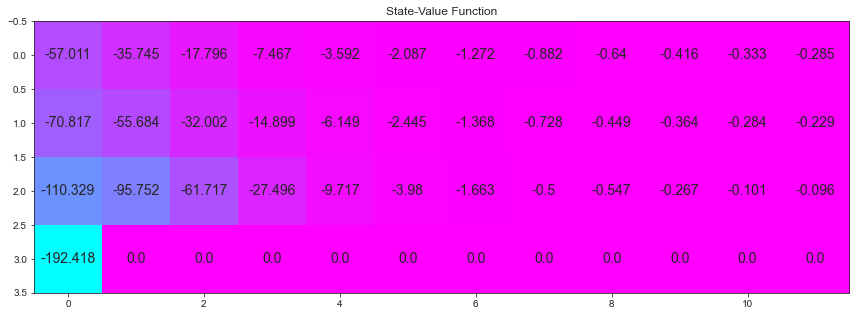

In [24]:
# obtain the estimated optimal policy and corresponding action-value function
Q_sarsa = sarsa(env, 10, .01)

# print the estimated optimal policy
policy_sarsa = np.array([np.argmax(Q_sarsa[key]) if key in Q_sarsa else -1 for key in np.arange(48)]).reshape(4,12)
check_test.run_check('td_control_check', policy_sarsa)
print("\nEstimated Optimal Policy (UP = 0, RIGHT = 1, DOWN = 2, LEFT = 3, N/A = -1):")
print(policy_sarsa)

# plot the estimated optimal state-value function
V_sarsa = ([np.max(Q_sarsa[key]) if key in Q_sarsa else 0 for key in np.arange(48)])
plot_values(V_sarsa)

### Part 2: TD Control: Q-learning

In this section, you will write your own implementation of the Q-learning control algorithm.

Your algorithm has four arguments:
- `env`: This is an instance of an OpenAI Gym environment.
- `num_episodes`: This is the number of episodes that are generated through agent-environment interaction.
- `alpha`: This is the step-size parameter for the update step.
- `gamma`: This is the discount rate.  It must be a value between 0 and 1, inclusive (default value: `1`).

The algorithm returns as output:
- `Q`: This is a dictionary (of one-dimensional arrays) where `Q[s][a]` is the estimated action value corresponding to state `s` and action `a`.

Please complete the function in the code cell below.

(_Feel free to define additional functions to help you to organize your code._)

In [ ]:
def q_learning(env, num_episodes, alpha, gamma=1.0):
    # initialize empty dictionary of arrays
    Q = defaultdict(lambda: np.zeros(env.nA))
    # loop over episodes
    for i_episode in range(1, num_episodes+1):
        # monitor progress
        if i_episode % 100 == 0:
            print("\rEpisode {}/{}".format(i_episode, num_episodes), end="")
            sys.stdout.flush()
        
        ## TODO: complete the function
        
    return Q

Use the next code cell to visualize the **_estimated_** optimal policy and the corresponding state-value function. 

If the code cell returns **PASSED**, then you have implemented the function correctly!  Feel free to change the `num_episodes` and `alpha` parameters that are supplied to the function.  However, if you'd like to ensure the accuracy of the unit test, please do not change the value of `gamma` from the default.

In [ ]:
# obtain the estimated optimal policy and corresponding action-value function
Q_sarsamax = q_learning(env, 5000, .01)

# print the estimated optimal policy
policy_sarsamax = np.array([np.argmax(Q_sarsamax[key]) if key in Q_sarsamax else -1 for key in np.arange(48)]).reshape((4,12))
check_test.run_check('td_control_check', policy_sarsamax)
print("\nEstimated Optimal Policy (UP = 0, RIGHT = 1, DOWN = 2, LEFT = 3, N/A = -1):")
print(policy_sarsamax)

# plot the estimated optimal state-value function
plot_values([np.max(Q_sarsamax[key]) if key in Q_sarsamax else 0 for key in np.arange(48)])

### Part 3: TD Control: Expected Sarsa

In this section, you will write your own implementation of the Expected Sarsa control algorithm.

Your algorithm has four arguments:
- `env`: This is an instance of an OpenAI Gym environment.
- `num_episodes`: This is the number of episodes that are generated through agent-environment interaction.
- `alpha`: This is the step-size parameter for the update step.
- `gamma`: This is the discount rate.  It must be a value between 0 and 1, inclusive (default value: `1`).

The algorithm returns as output:
- `Q`: This is a dictionary (of one-dimensional arrays) where `Q[s][a]` is the estimated action value corresponding to state `s` and action `a`.

Please complete the function in the code cell below.

(_Feel free to define additional functions to help you to organize your code._)

In [ ]:
def expected_sarsa(env, num_episodes, alpha, gamma=1.0):
    # initialize empty dictionary of arrays
    Q = defaultdict(lambda: np.zeros(env.nA))
    # loop over episodes
    for i_episode in range(1, num_episodes+1):
        # monitor progress
        if i_episode % 100 == 0:
            print("\rEpisode {}/{}".format(i_episode, num_episodes), end="")
            sys.stdout.flush()
        
        ## TODO: complete the function
        
    return Q

Use the next code cell to visualize the **_estimated_** optimal policy and the corresponding state-value function.  

If the code cell returns **PASSED**, then you have implemented the function correctly!  Feel free to change the `num_episodes` and `alpha` parameters that are supplied to the function.  However, if you'd like to ensure the accuracy of the unit test, please do not change the value of `gamma` from the default.

In [ ]:
# obtain the estimated optimal policy and corresponding action-value function
Q_expsarsa = expected_sarsa(env, 10000, 1)

# print the estimated optimal policy
policy_expsarsa = np.array([np.argmax(Q_expsarsa[key]) if key in Q_expsarsa else -1 for key in np.arange(48)]).reshape(4,12)
check_test.run_check('td_control_check', policy_expsarsa)
print("\nEstimated Optimal Policy (UP = 0, RIGHT = 1, DOWN = 2, LEFT = 3, N/A = -1):")
print(policy_expsarsa)

# plot the estimated optimal state-value function
plot_values([np.max(Q_expsarsa[key]) if key in Q_expsarsa else 0 for key in np.arange(48)])